In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

cwd = os.getcwd()
code_dir = os.path.dirname(cwd)
sys.path.append(code_dir)

import seaborn as sns

from lib.directories import *
from lib.plotting import *

In [7]:
save_dir_comparison = os.path.join(FIGURES_DIR, "paper-final", "comparison")
os.makedirs(save_dir_comparison, exist_ok=True)
save_dir_single = os.path.join(FIGURES_DIR, "paper-final", "single_models")
save_dir_single_PCA = os.path.join(FIGURES_DIR, "paper-final", "single_models", "PCA")

os.makedirs(save_dir_single, exist_ok=True)

search = "nn"
suffix_agg = "Agg_mean-PCA_100-Norm_True"
suffix_no_agg = "Agg_none-PCA_100-Norm_True"

models = [
        ("fs-essentia-extractor_legacy",
         "PCA_100",
        search
        ),
        ("audioset-vggish-3", 
        suffix_agg,
        search
        ),
        ("audioset-yamnet-1", 
        suffix_agg, 
        search
        ),
        ("fsd-sinet-vgg42-tlpf-1", 
        suffix_agg,
        search
        ),
        ("BEATs_iter3_plus_AS2M",
        suffix_agg,
        search
        ),
        ("openl3-env-mel256-emb512-3", 
        suffix_agg,
        search
        ),
        ('CAVMAE-as_46.6',
        suffix_no_agg,
        search
        ),
        ("CLAP_2022",
        suffix_no_agg,
        search
        ),
        ("clap-630k-fusion-best",
        suffix_no_agg,
        search
        ),
        ("CLAP_2023",
        suffix_no_agg,
        search
        ),
        ("Pengi",
        suffix_no_agg,
        search
        ),
        ("AudioCLIP-Full-Training",
        suffix_no_agg,
        search
        ),
        ("Wav2CLIP",
        suffix_no_agg,
        search
        ),
        ("imagebind_huge",
        suffix_no_agg,
        search
        ),
]


## Compare Best Models

### MAP

#### Micro, Macro

##### 15, 150 Joint

IndexError: list index out of range

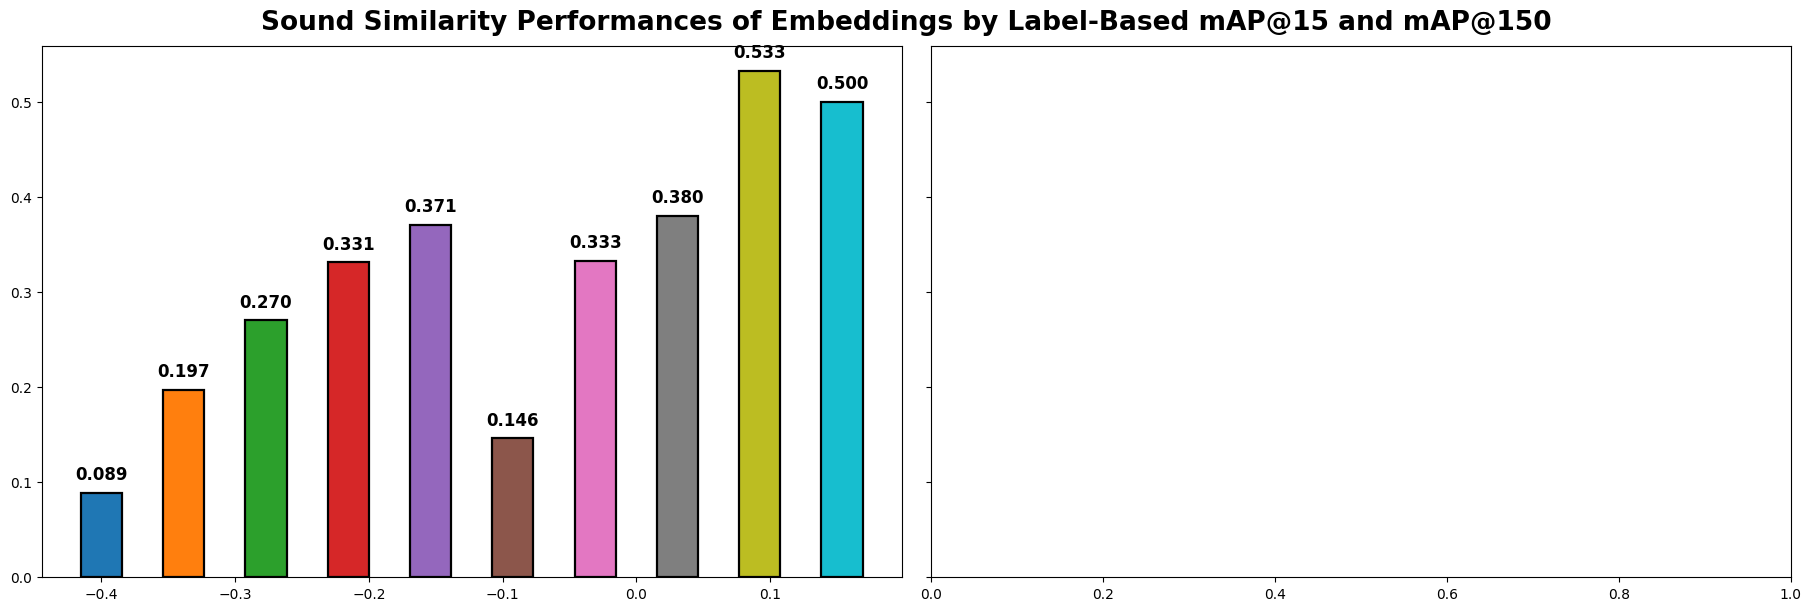

In [3]:
save_fig = True
plot_map_15_and_150_comparisons_multimodel(models, "macro", use_fig_name=True, legend=True, save_fig=save_fig, save_dir=save_dir_comparison)

##### 15, 150 Separate

IndexError: list index out of range

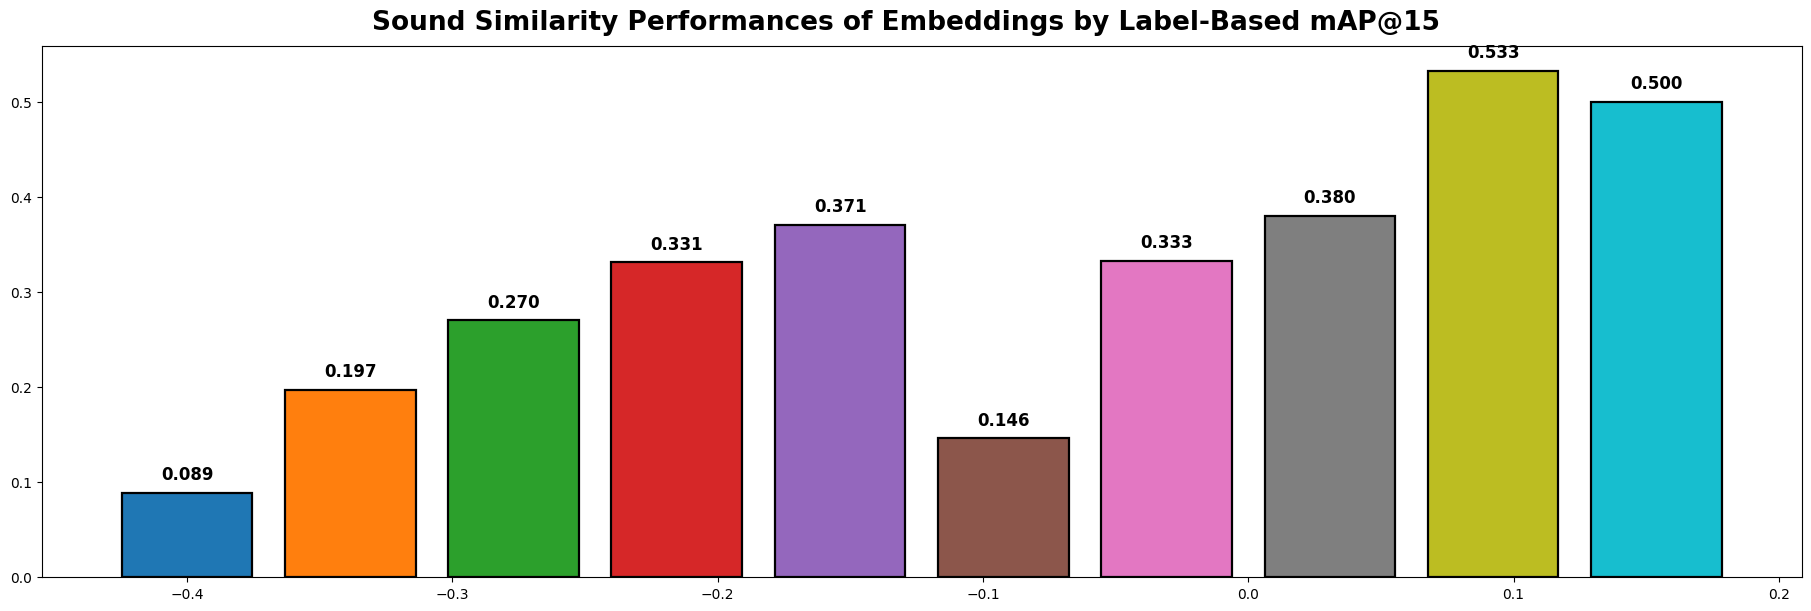

In [54]:
save_fig = False
for N in [15, 150]:
    plot_map_N_comparisons_multimodel(models, "macro", N=N, use_fig_name=True, legend=True, save_fig=save_fig, save_dir=save_dir_comparison)

#### Family-based mAP@15 Comparisons

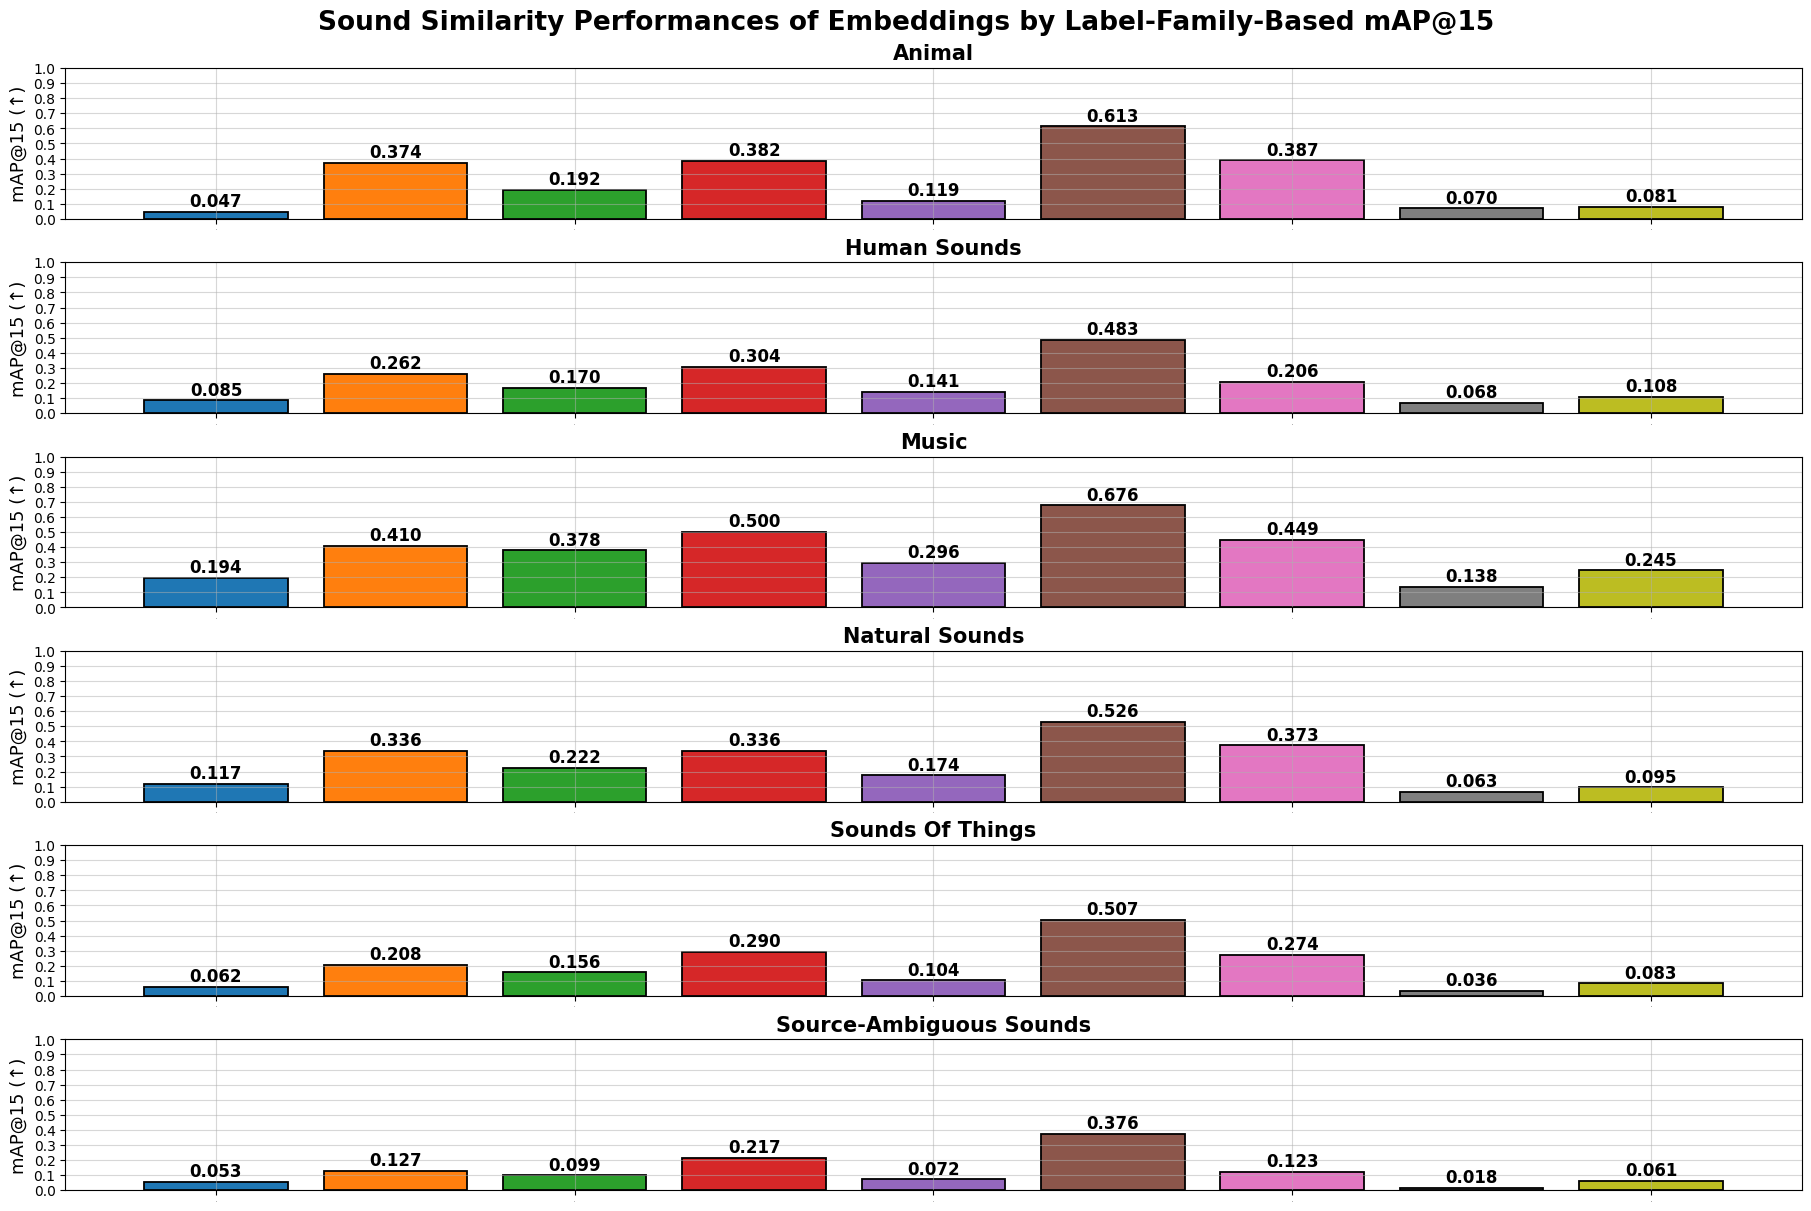

In [3]:
save_fig = False
plot_family_map_comparisons_multimodel(models, legend=False, use_fig_name=True, save_fig=save_fig, save_dir=save_dir_comparison)

#### Heatmap

In [3]:
model_maps = defaultdict(list)
for model, variation, search in models:
    embedding_eval_dir = os.path.join(EVAL_DIR, DATASET_NAME, model+"-"+variation)
    map_path = os.path.join(embedding_eval_dir, search, "families_mAP@15.csv")
    labels_map = pd.read_csv(map_path)
    families = labels_map["family"].to_list()
    maps = labels_map["map"].to_list()
    for family, family_map in zip(families, maps):
        family = family.replace("_", " ").title()
        model_maps[family].append((model, variation, search, family_map))
model_maps = dict(sorted(model_maps.items(), key=lambda x: x[0]))

In [4]:
data = []
xlabels = []
for family, vals in model_maps.items():
    family_data = []
    xlabels.append(family.replace(' ', '\n').replace('-', '\n'))
    for model, variation, search, family_map in vals:
        print(family, model, variation, search, family_map)
        family_data.append(family_map)
        # ylabels.append(model)
    data.append(family_data)
data = np.array(data)

Animal fs-essentia-extractor_legacy PCA_100 nn 0.0471845580386012
Animal audioset-vggish-3 Agg_mean-PCA_100-Norm_True nn 0.1923885092627625
Animal audioset-yamnet-1 Agg_mean-PCA_100-Norm_True nn 0.3735636939960864
Animal fsd-sinet-vgg42-tlpf-1 Agg_mean-PCA_100-Norm_True nn 0.3824986543757526
Animal BEATs_iter3_plus_AS2M Agg_mean-PCA_100-Norm_True nn 0.4212522146855145
Animal openl3-env-mel256-emb512-3 Agg_mean-PCA_100-Norm_True nn 0.118995211971489
Animal CAVMAE-as_46.6 Agg_none-PCA_100-Norm_True nn 0.4103454186409084
Animal CLAP_2022 Agg_none-PCA_100-Norm_True nn 0.4697202528747005
Animal clap-630k-fusion-best Agg_none-PCA_100-Norm_True nn 0.6132299395414055
Animal CLAP_2023 Agg_none-PCA_100-Norm_True nn 0.5716111391597274
Animal Pengi Agg_none-PCA_100-Norm_True nn 0.5924982822082246
Animal AudioCLIP-Full-Training Agg_none-PCA_100-Norm_True nn 0.0698487515664857
Animal Wav2CLIP Agg_none-PCA_100-Norm_True nn 0.0813622098291766
Animal imagebind_huge Agg_none-PCA_100-Norm_True nn 0.38708

In [5]:
ylabels = []
for m in models:
    if m[0] == "fs-essentia-extractor_legacy":
        ylabels.append("Freesound")
    elif m[0] == 'audioset-yamnet-1':
        ylabels.append("YAMNet")
    elif m[0] == 'audioset-vggish-3':
        ylabels.append("VGGish")
    elif m[0] == 'fsd-sinet-vgg42-tlpf-1':
        ylabels.append("FSD-SINet")
    elif m[0] == 'BEATs_iter3_plus_AS2M':
        ylabels.append("BEATs")
    elif m[0] == 'openl3-env-mel256-emb512-3':
        ylabels.append("OpenL3")
    elif m[0] == 'imagebind_huge':
        ylabels.append("ImageBind")
    elif m[0] == 'clap-630k-fusion-best':
        ylabels.append("LAION-CLAP")
    elif m[0] == 'CLAP_2023':
        ylabels.append("CLAP2023")
    elif m[0] == 'CLAP_2022':
        ylabels.append("CLAP2022")
    elif m[0] == 'Pengi':
        ylabels.append("Pengi")
    elif m[0] == 'AudioCLIP-Full-Training':
        ylabels.append("AudioCLIP")
    elif m[0] == 'Wav2CLIP':
        ylabels.append("Wav2CLIP")
    elif m[0] == 'CAVMAE-as_46.6':
        ylabels.append("CAV-MAE")
    else:
        ylabels.append(m[0])

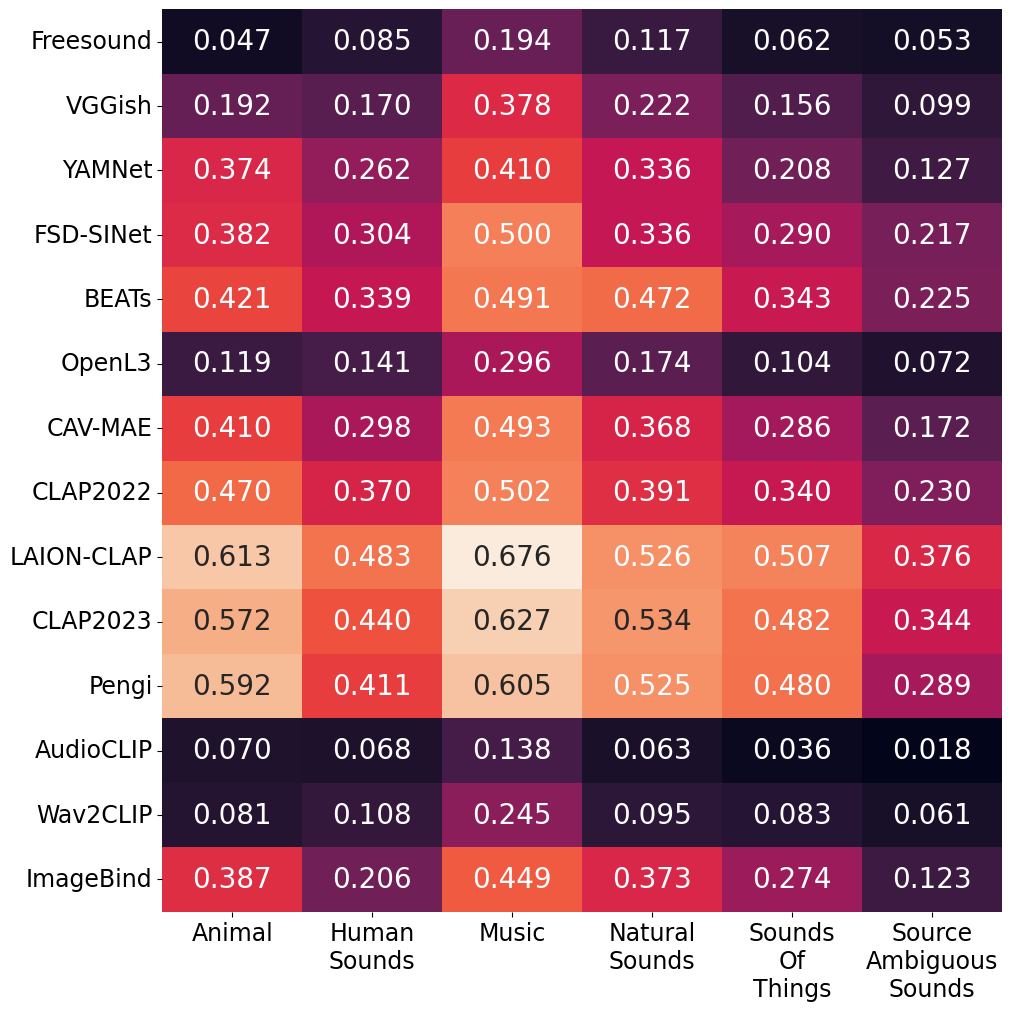

In [6]:
fig,ax = plt.subplots(figsize=(10, 10), constrained_layout=True)
sns.heatmap(data.T, xticklabels=xlabels, yticklabels=ylabels, annot=True, fmt=".3f", annot_kws={"fontsize":20}, ax=ax, cbar=False) # , cmap="viridis"
ax.tick_params(axis='y', which='major', labelsize=17)
ax.tick_params(axis='x', which='major', labelsize=17)
fig.savefig(os.path.join(save_dir_comparison, "family_map15_heatmap.pdf"), bbox_inches="tight")
fig.savefig(os.path.join(save_dir_comparison, "family_map15_heatmap.jpeg"), bbox_inches="tight")
plt.show()

### MR1

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/comparison/macro_MR1-comparison.png


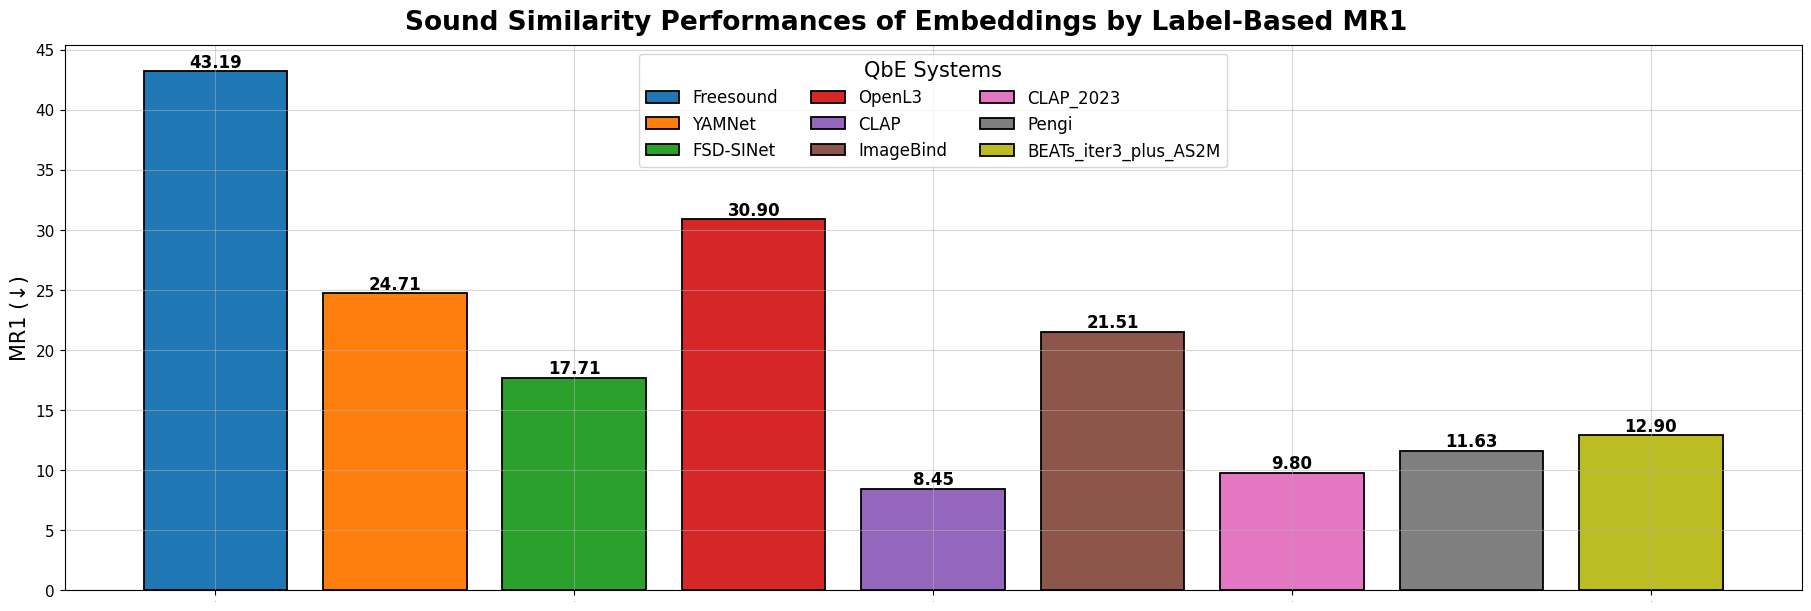

In [9]:
save_fig = True
plot_mr1_comparisons_multimodel(models, "macro", legend=True, use_fig_name=True, save_fig=save_fig, save_dir=save_dir_comparison)

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper/comparison/family_based_MR1-comparison.png


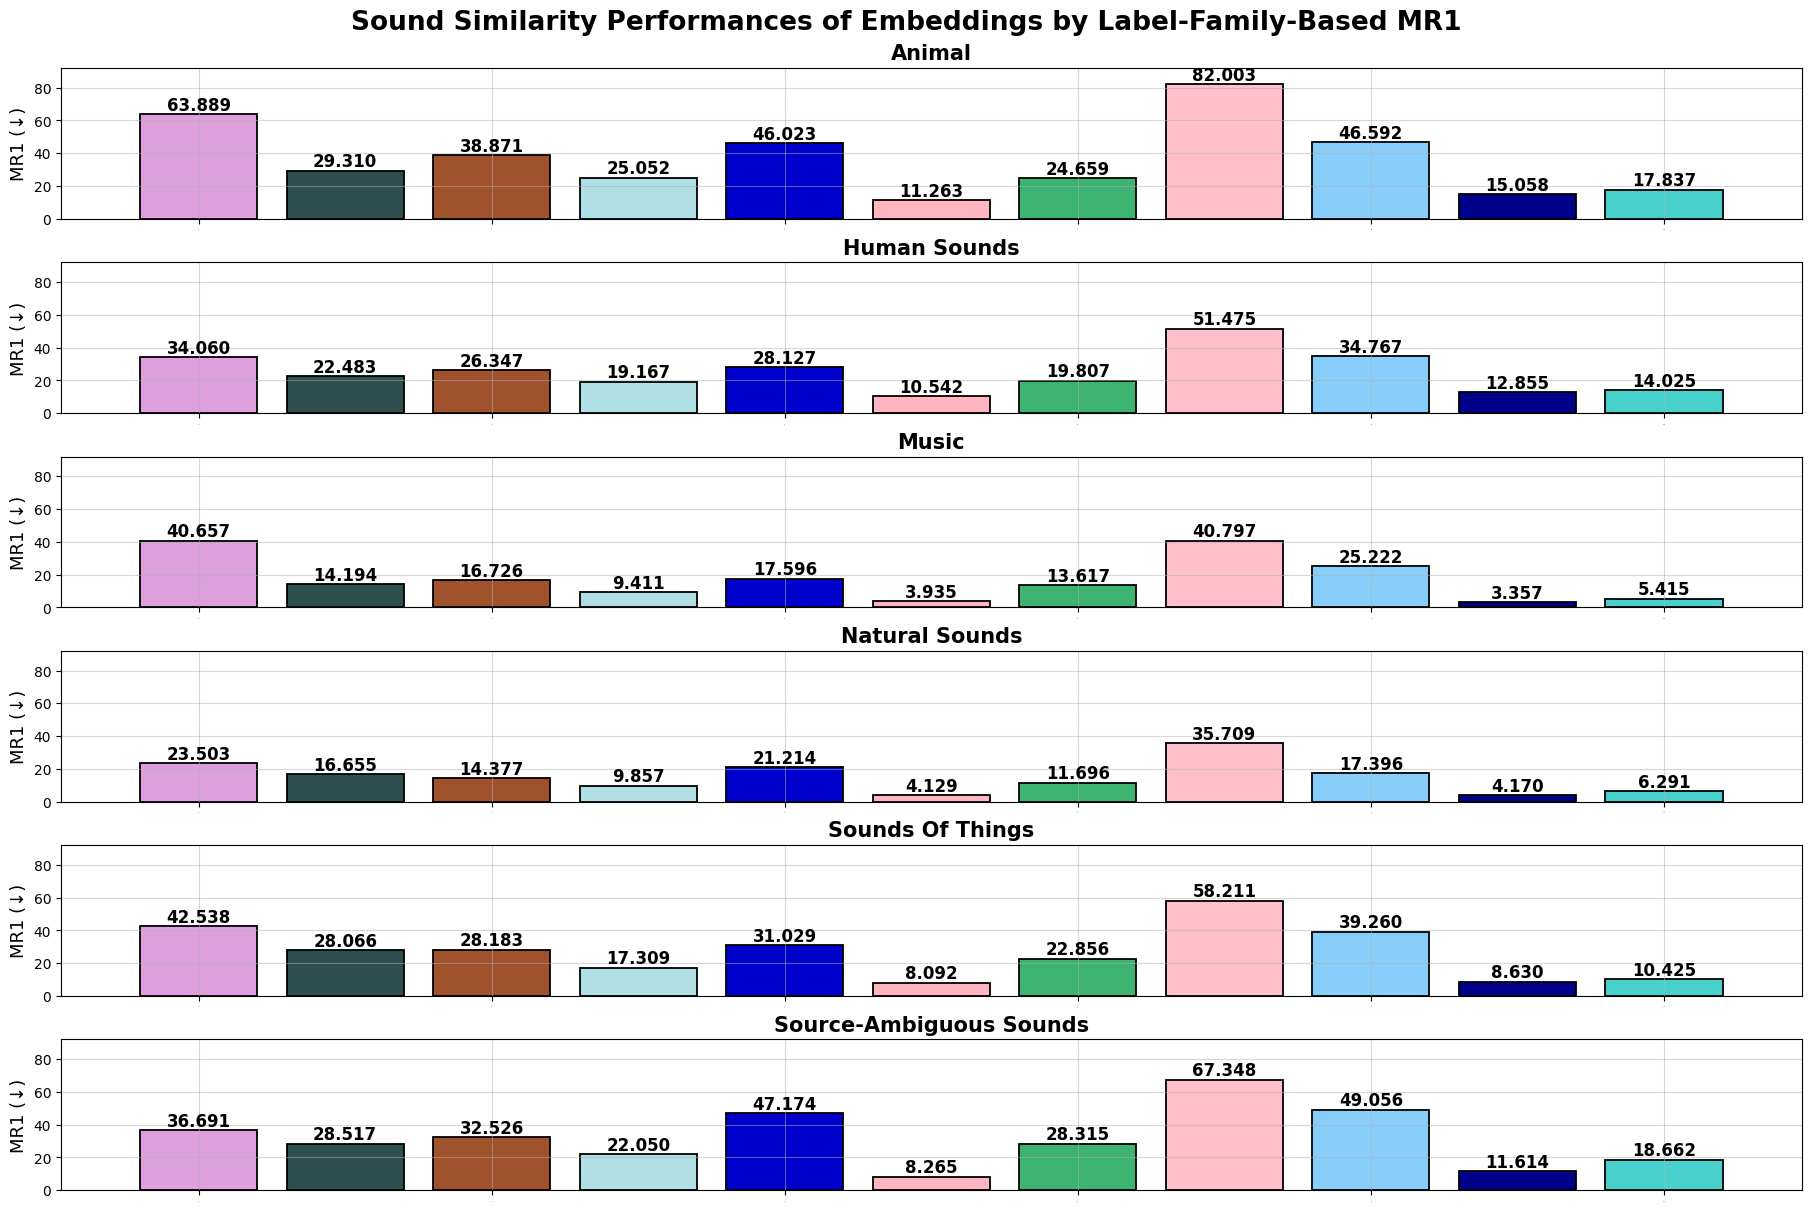

In [21]:
save_fig = True
plot_family_mr1_comparisons_multimodel(models, legend=False, use_fig_name=True, save_fig=save_fig, save_dir=save_dir_comparison)

### Some PCA Reduction

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/PCA_components/macro_map@15-PCA_comparisons-multi_models.png


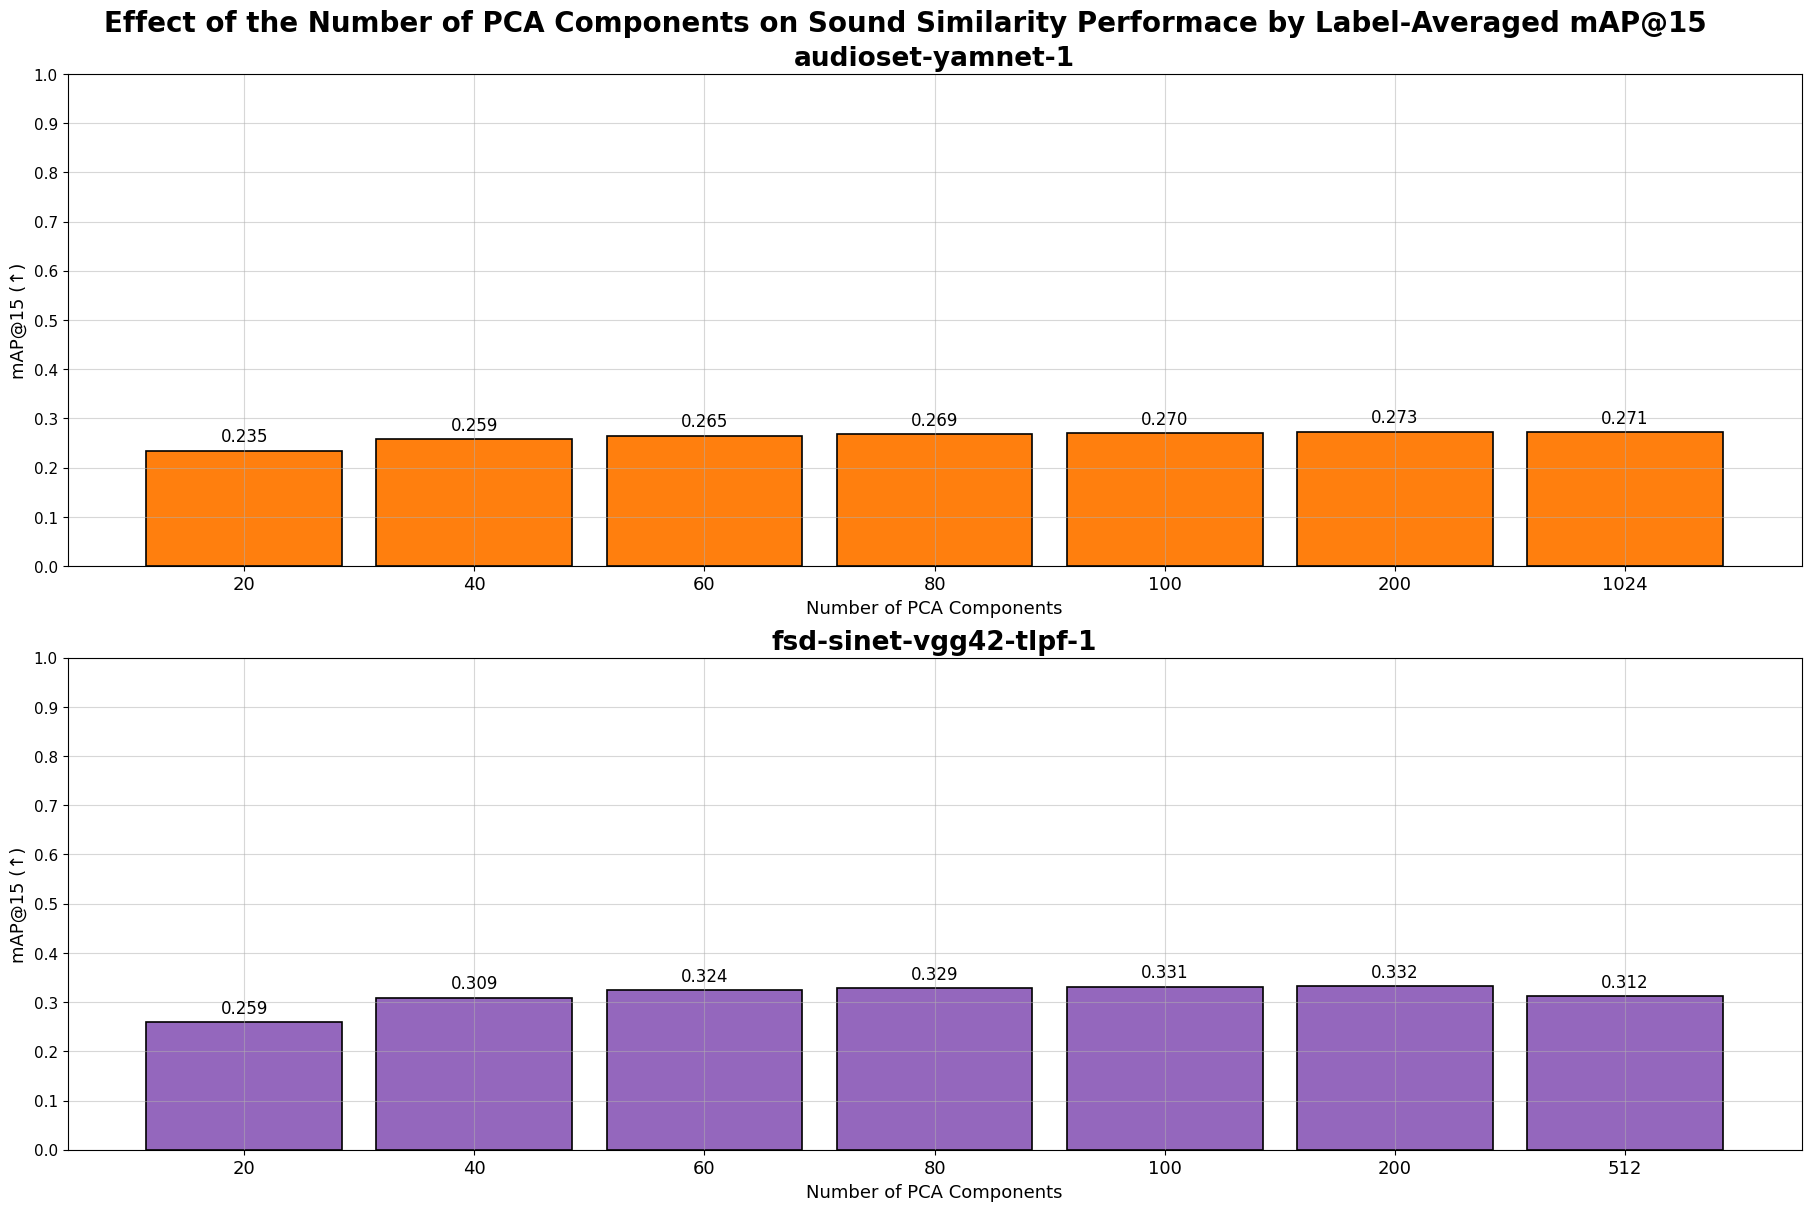

In [10]:
_models = [
        # ("fs-essentia-extractor_legacy",
        #  "",
        #  "",
        # "nn"
        # ),
        ("audioset-yamnet-1", 
        "mean",
        "True", 
        "nn"
        ),
        ("fsd-sinet-vgg42-tlpf-1", 
        "mean",
        "True",
        "nn"
        ),
]
save = True
save_dir = os.path.join(FIGURES_DIR, "paper-final", "PCA_components")
plot_macro_map_pca_comparisons_multimodel(_models, save_fig=save, save_dir=save_dir)

## Single Model Plots

### Sound Family

##### 15

('fs-essentia-extractor_legacy', 'PCA_100', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fs-essentia-extractor_legacy/family_based_mAP@15.png


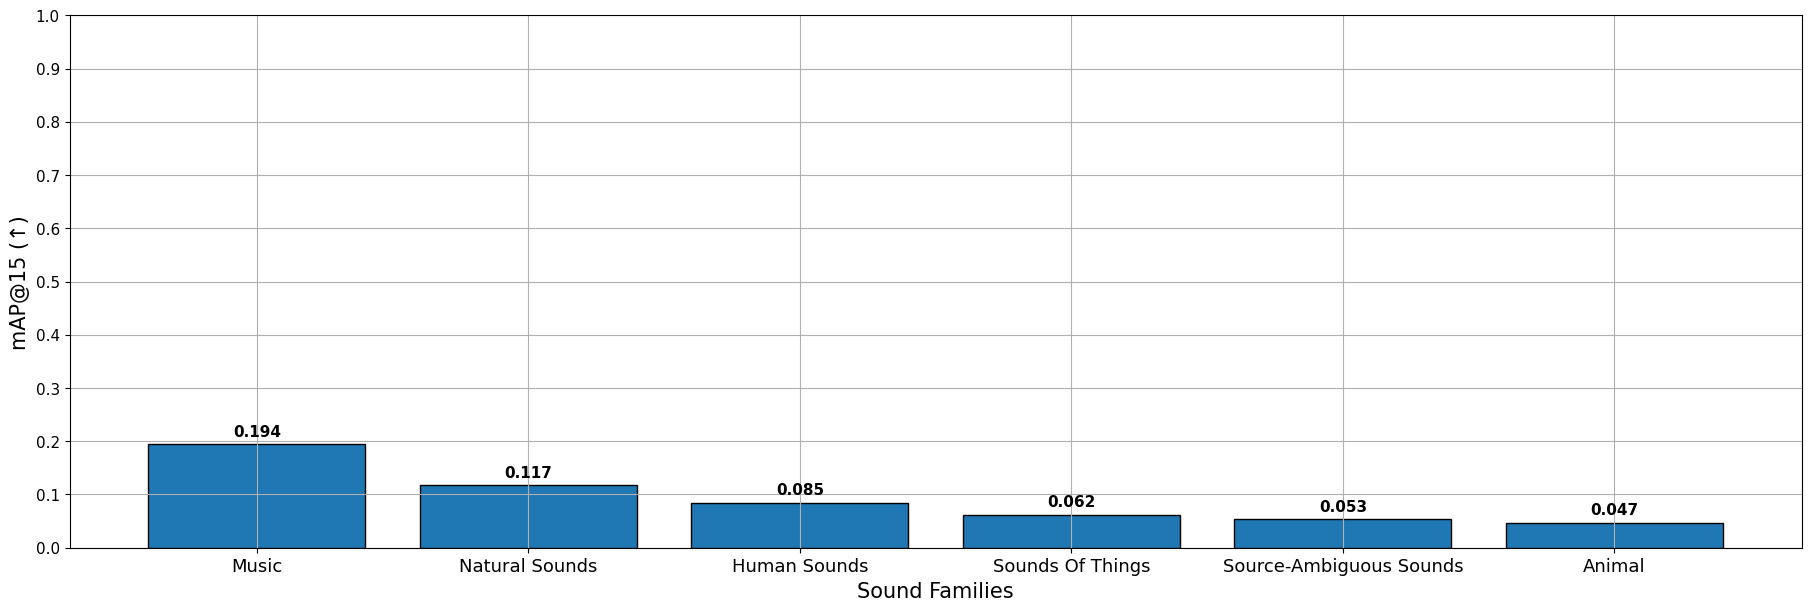

('audioset-vggish-3', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-vggish-3/family_based_mAP@15.png


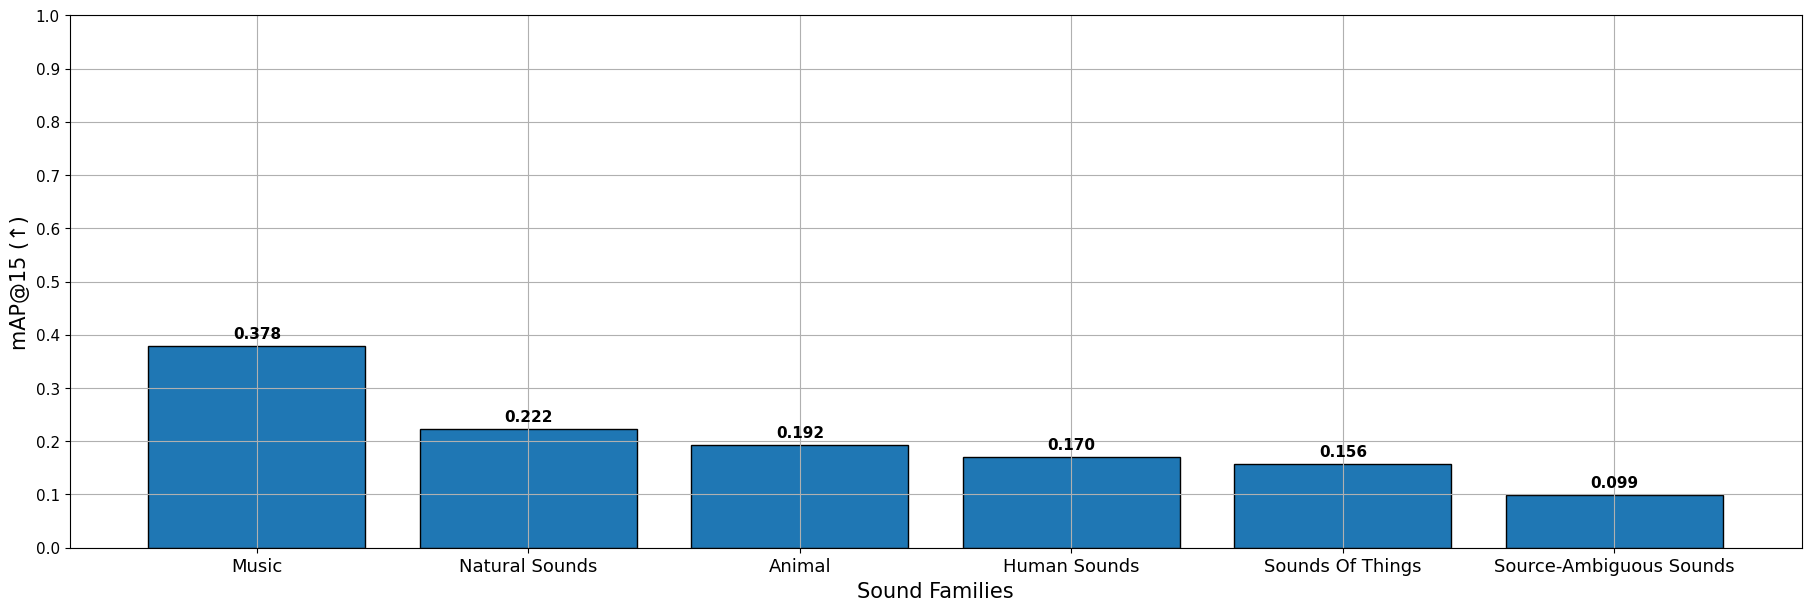

('audioset-yamnet-1', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-yamnet-1/family_based_mAP@15.png


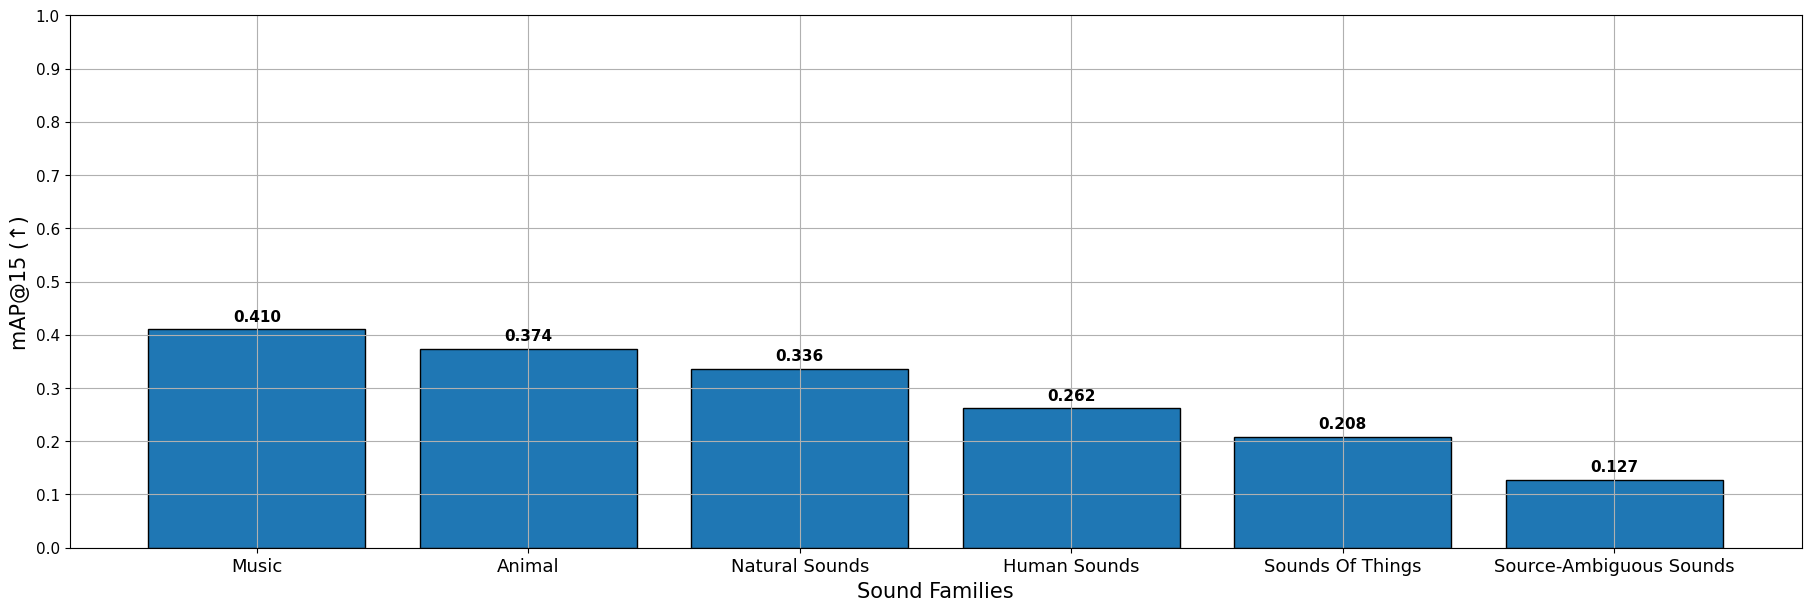

('fsd-sinet-vgg42-tlpf-1', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fsd-sinet-vgg42-tlpf-1/family_based_mAP@15.png


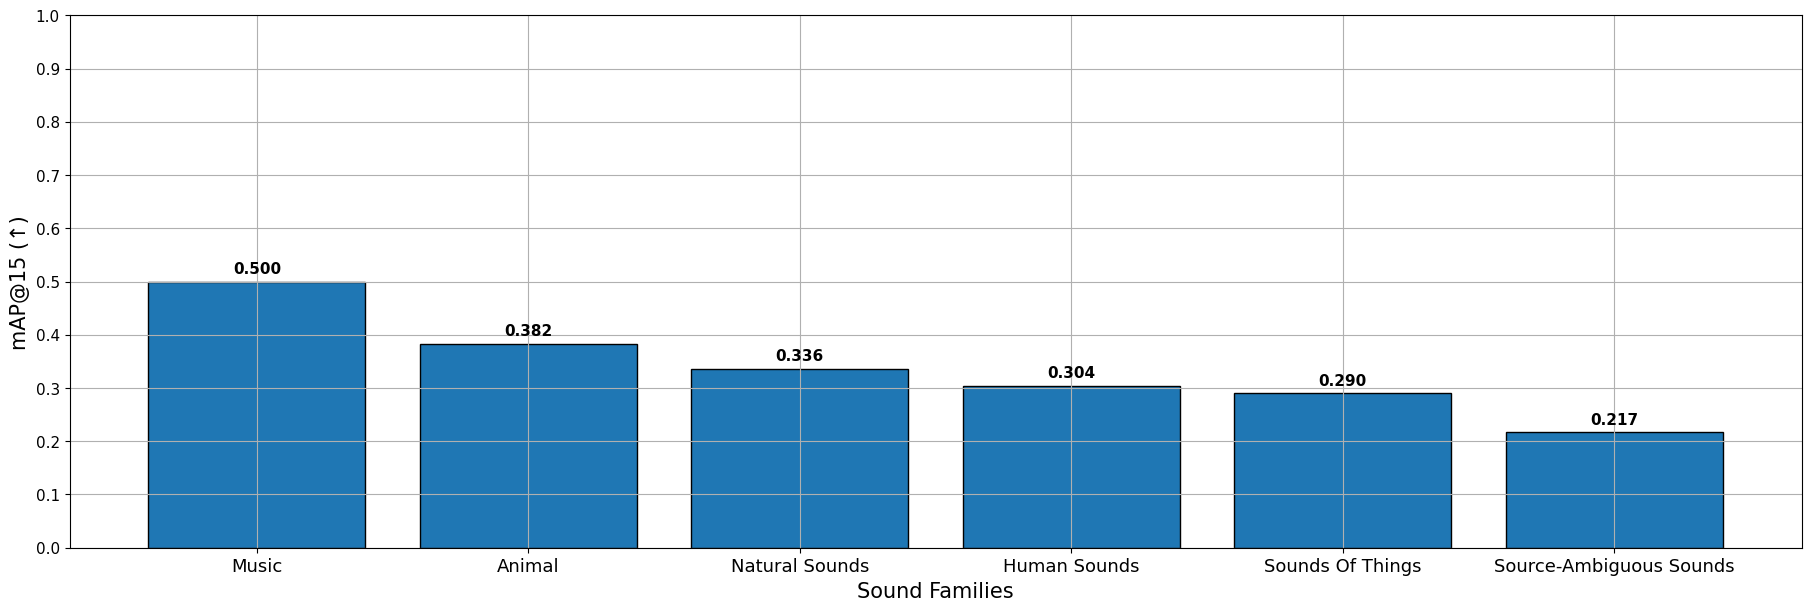

('BEATs_iter3_plus_AS2M', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/BEATs_iter3_plus_AS2M/family_based_mAP@15.png


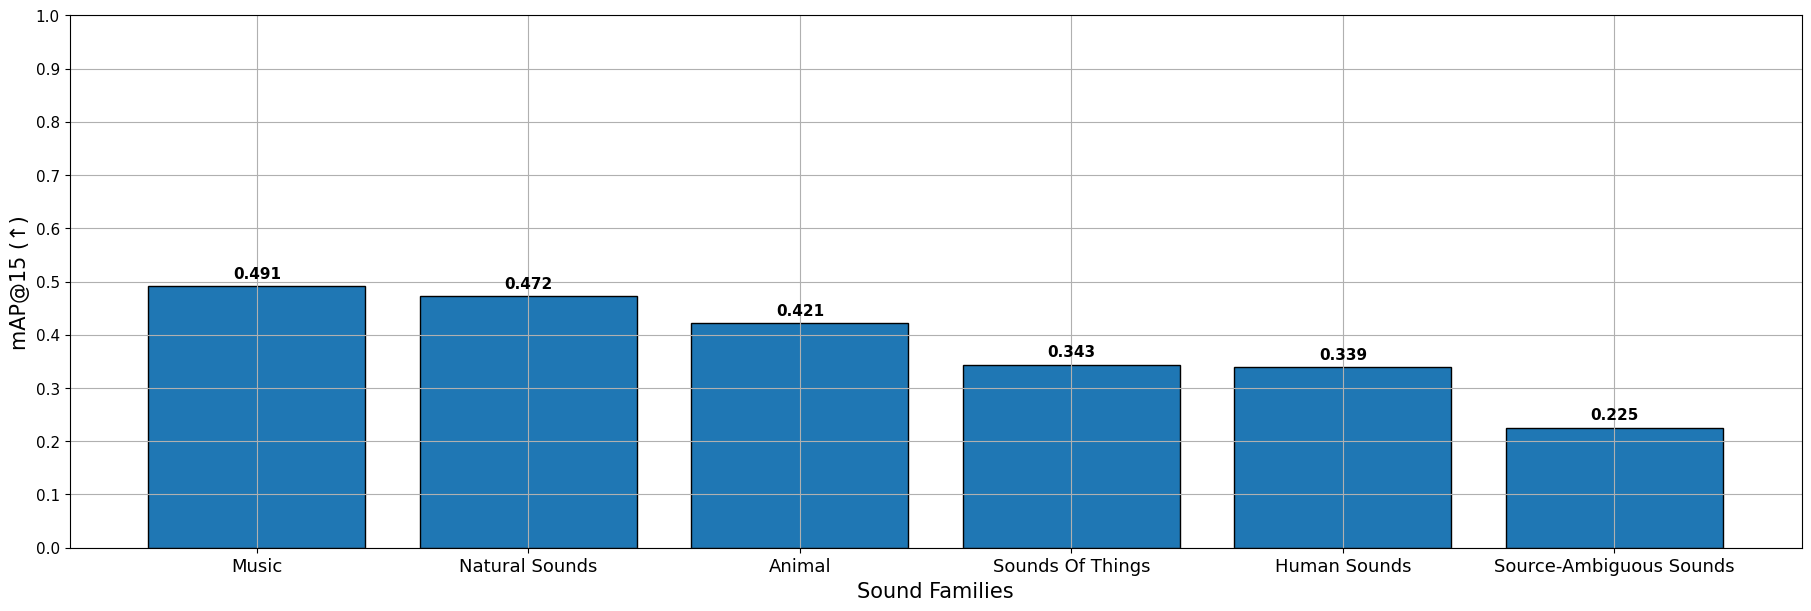

('openl3-env-mel256-emb512-3', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/openl3-env-mel256-emb512-3/family_based_mAP@15.png


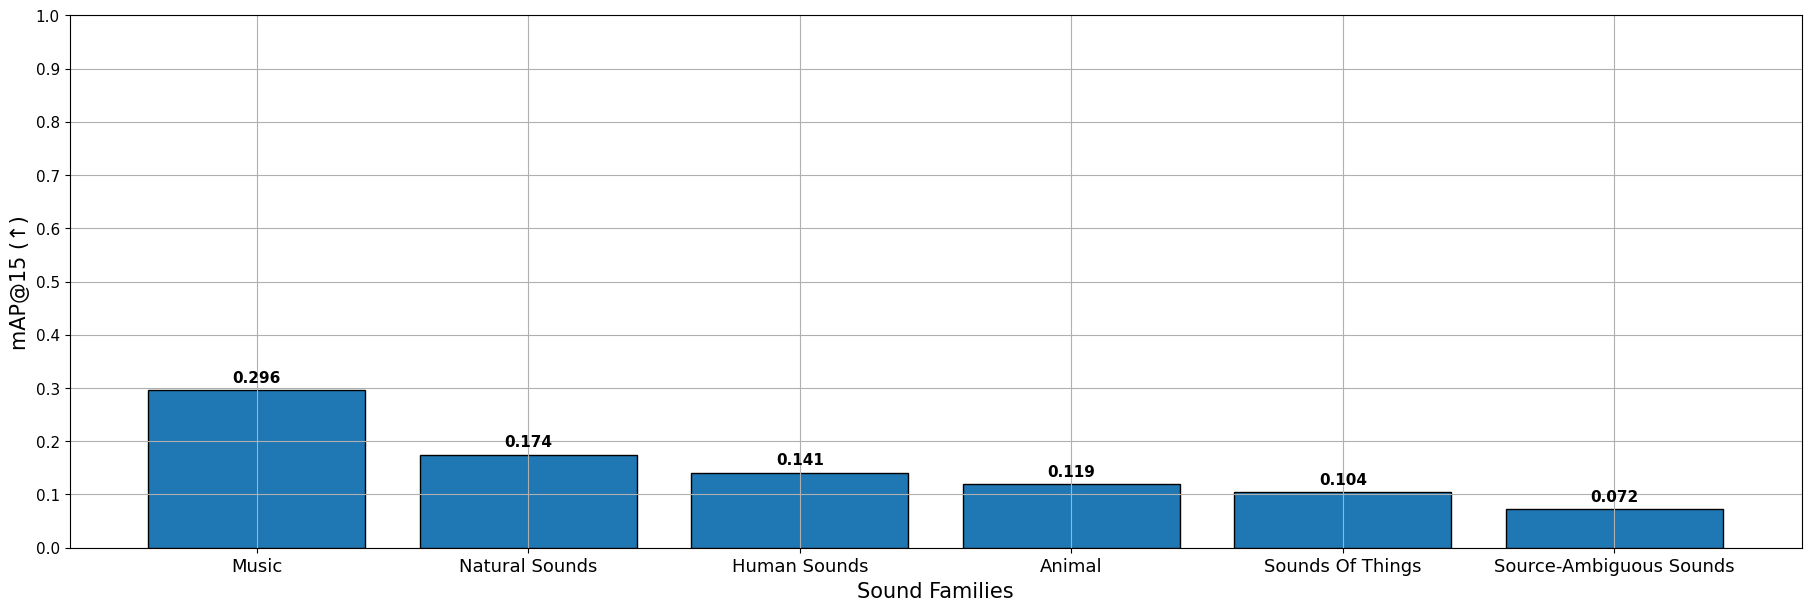

('CAVMAE-as_46.6', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CAVMAE-as_46.6/family_based_mAP@15.png


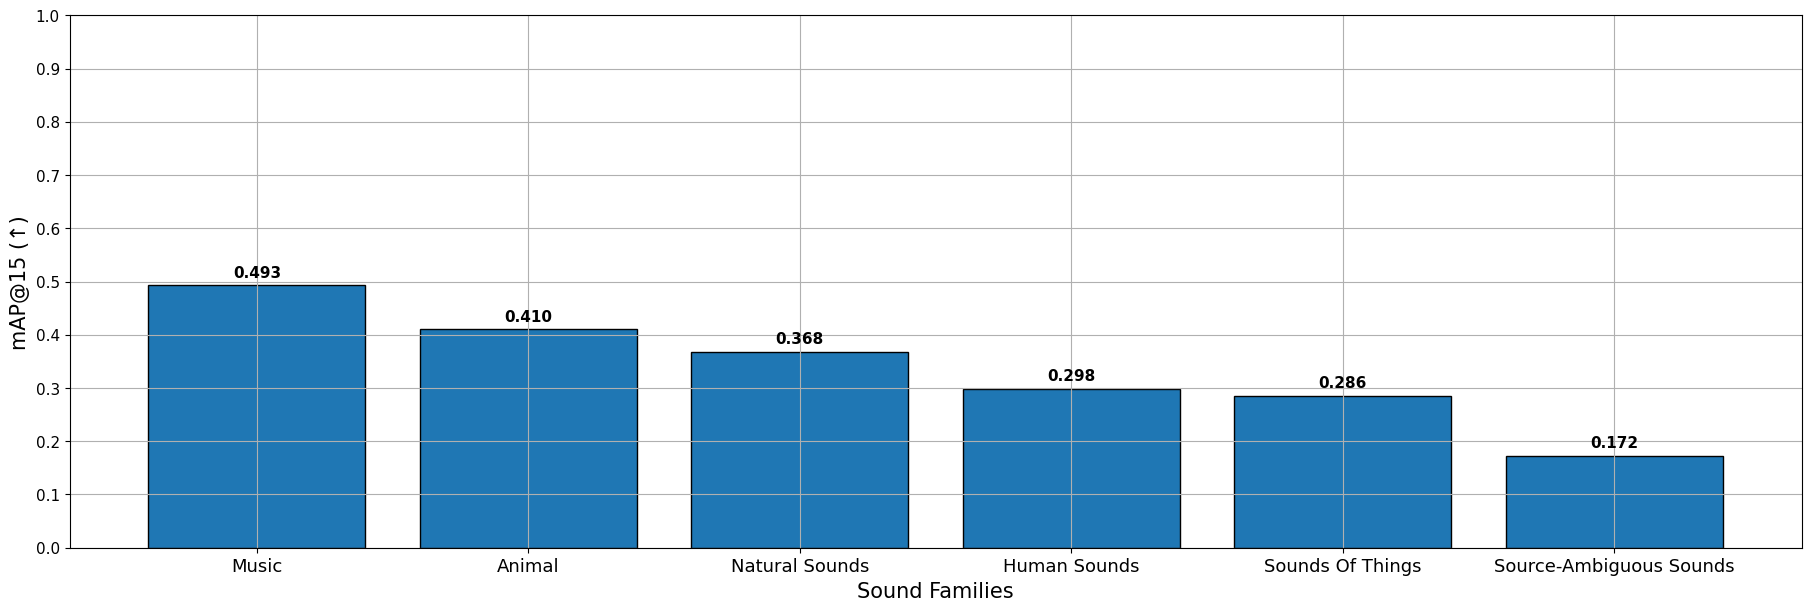

('CLAP_2022', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CLAP_2022/family_based_mAP@15.png


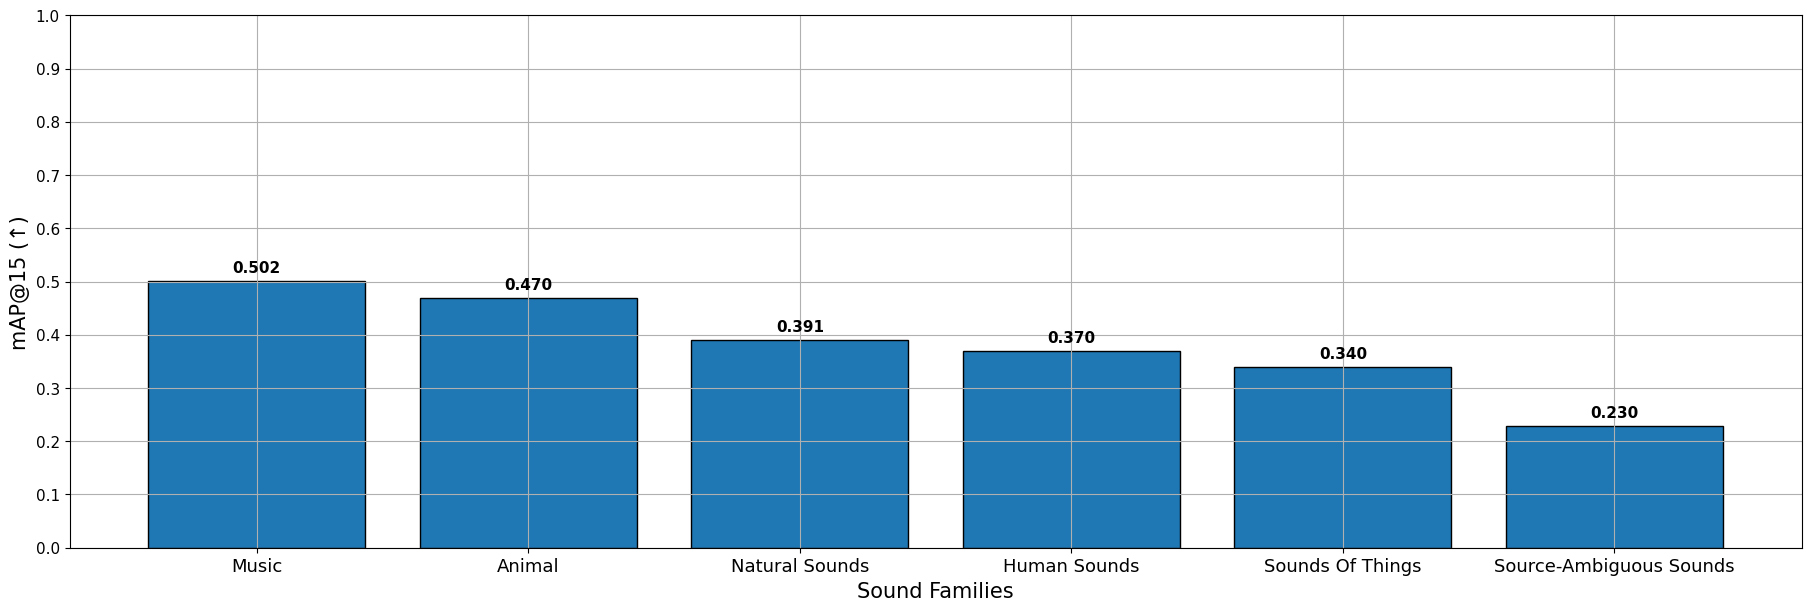

('clap-630k-fusion-best', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/clap-630k-fusion-best/family_based_mAP@15.png


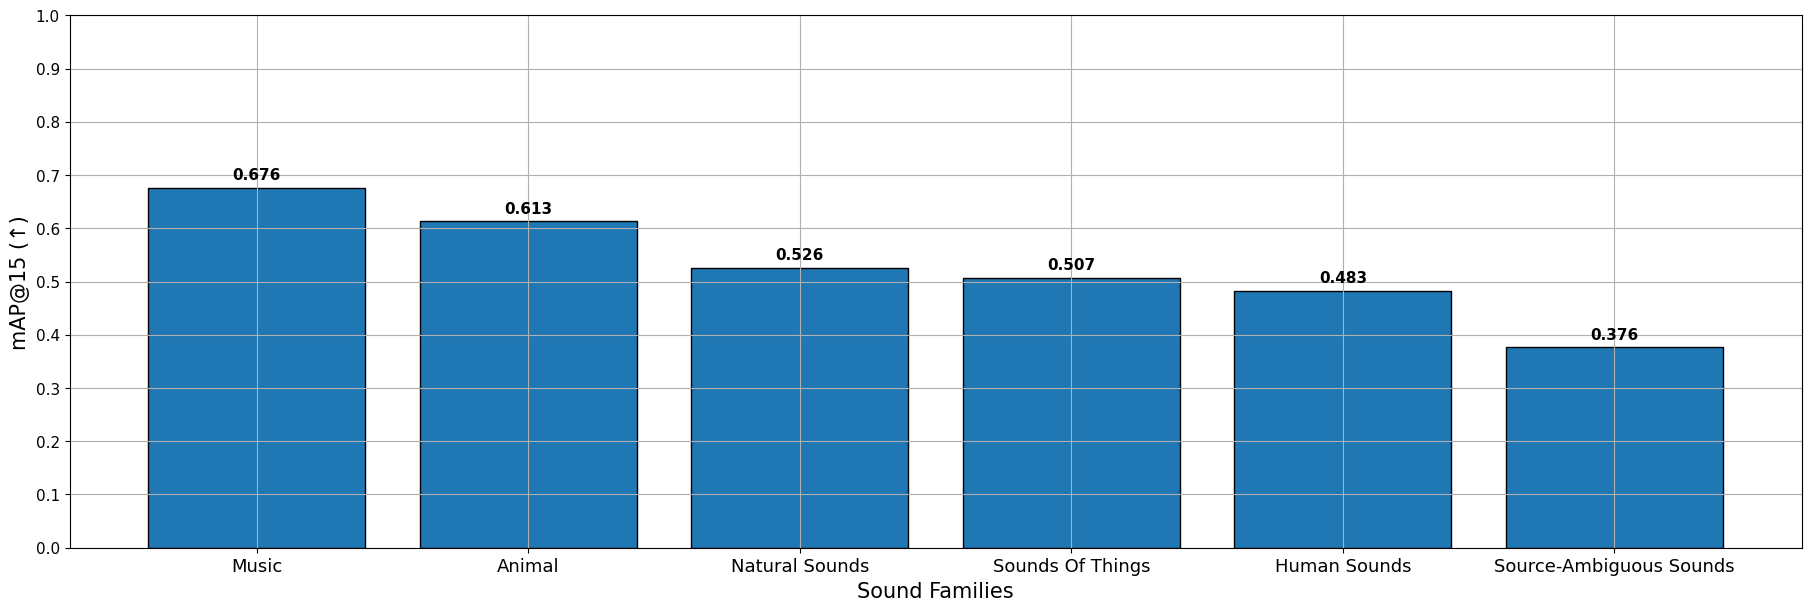

('CLAP_2023', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CLAP_2023/family_based_mAP@15.png


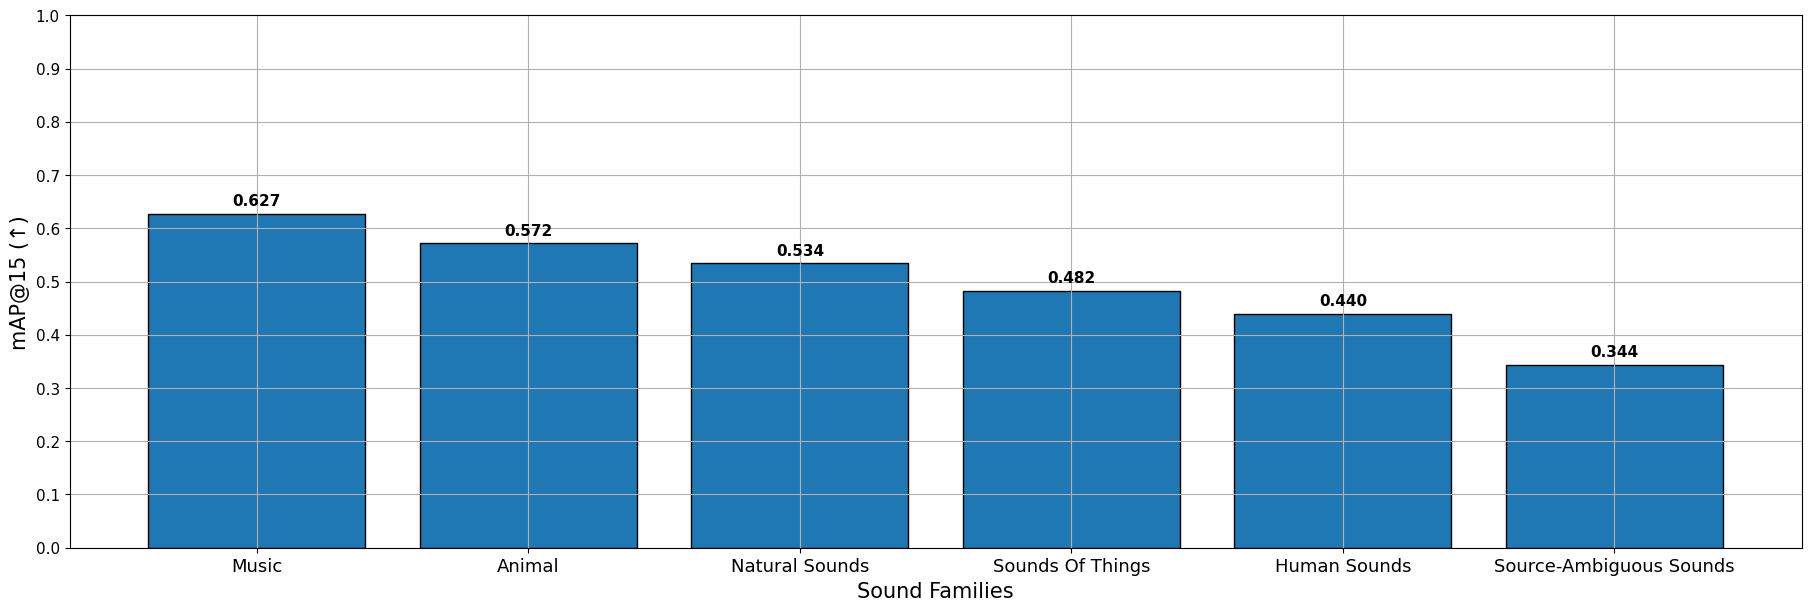

('Pengi', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/Pengi/family_based_mAP@15.png


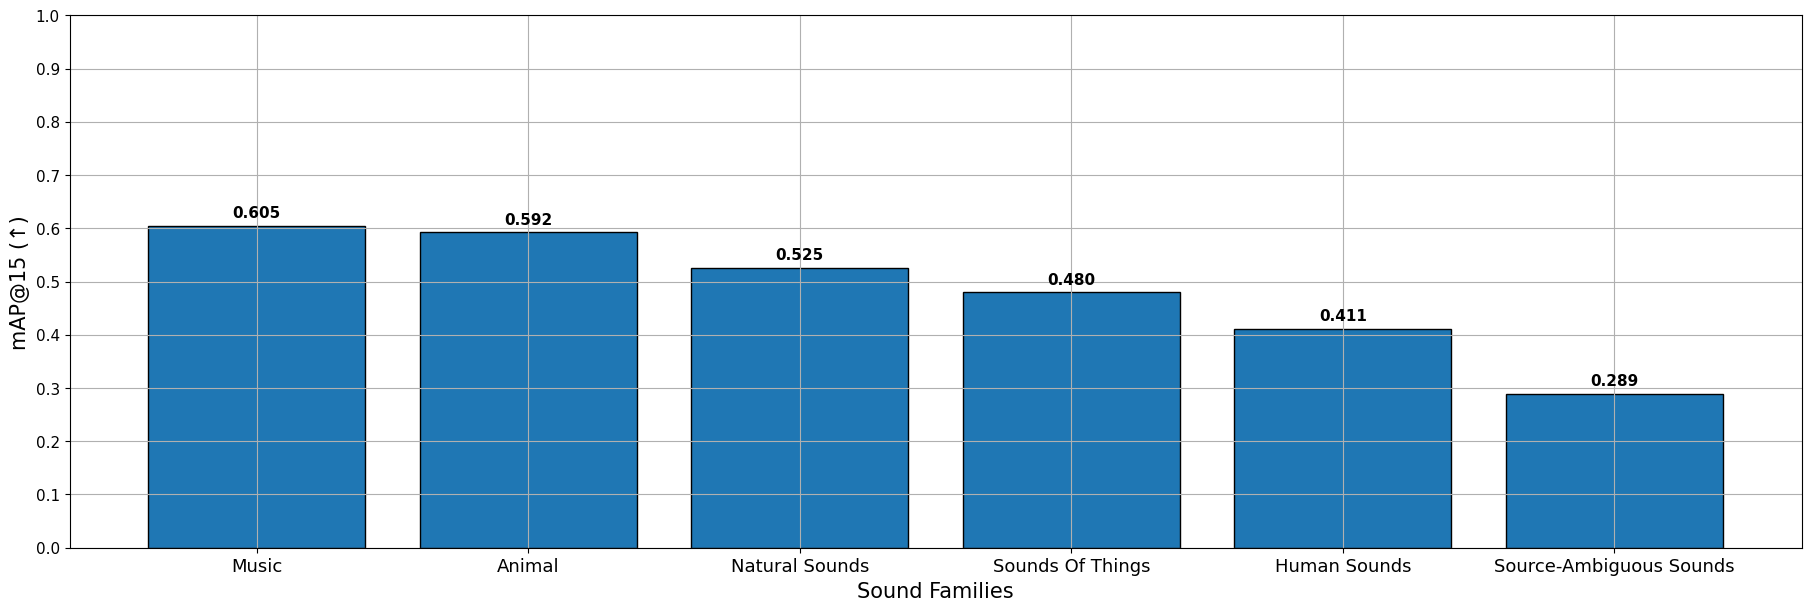

('AudioCLIP-Full-Training', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/AudioCLIP-Full-Training/family_based_mAP@15.png


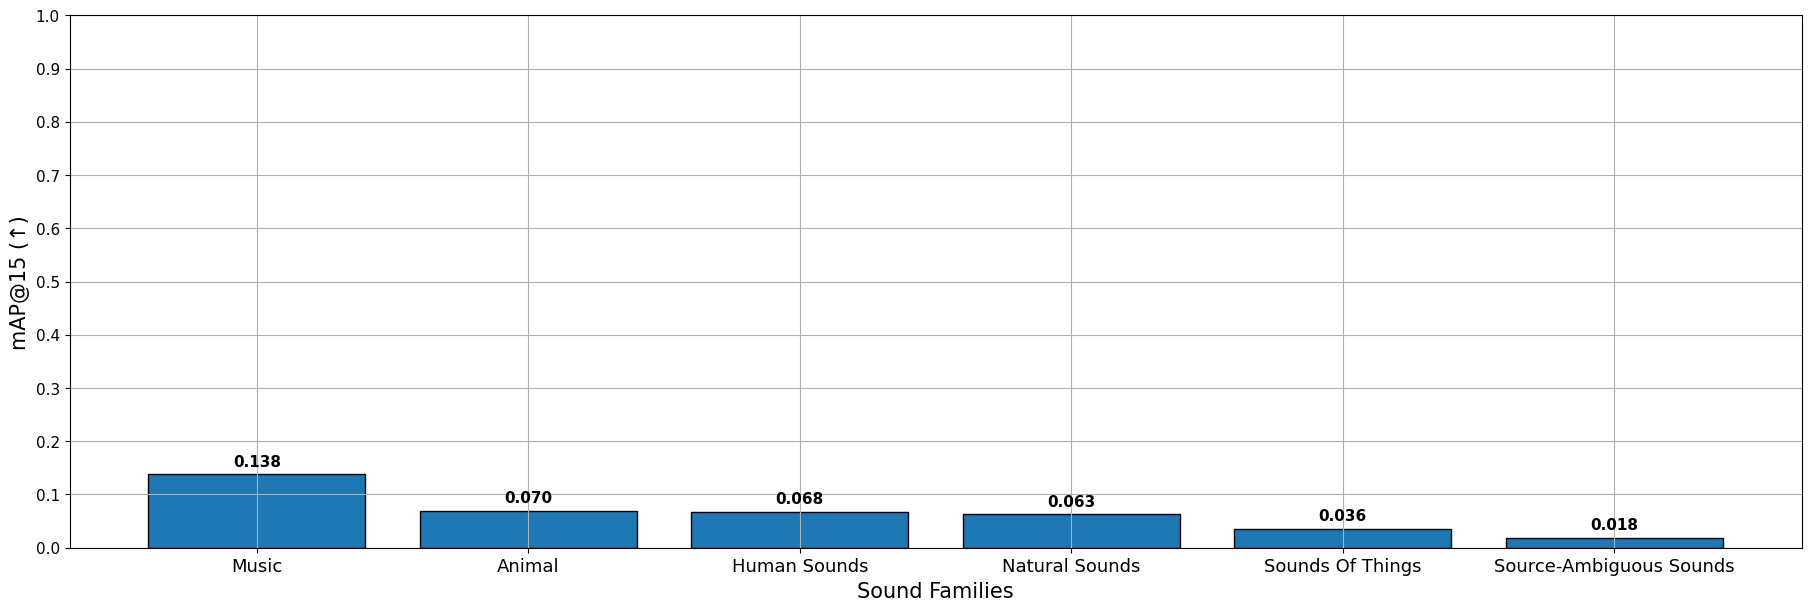

('Wav2CLIP', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/Wav2CLIP/family_based_mAP@15.png


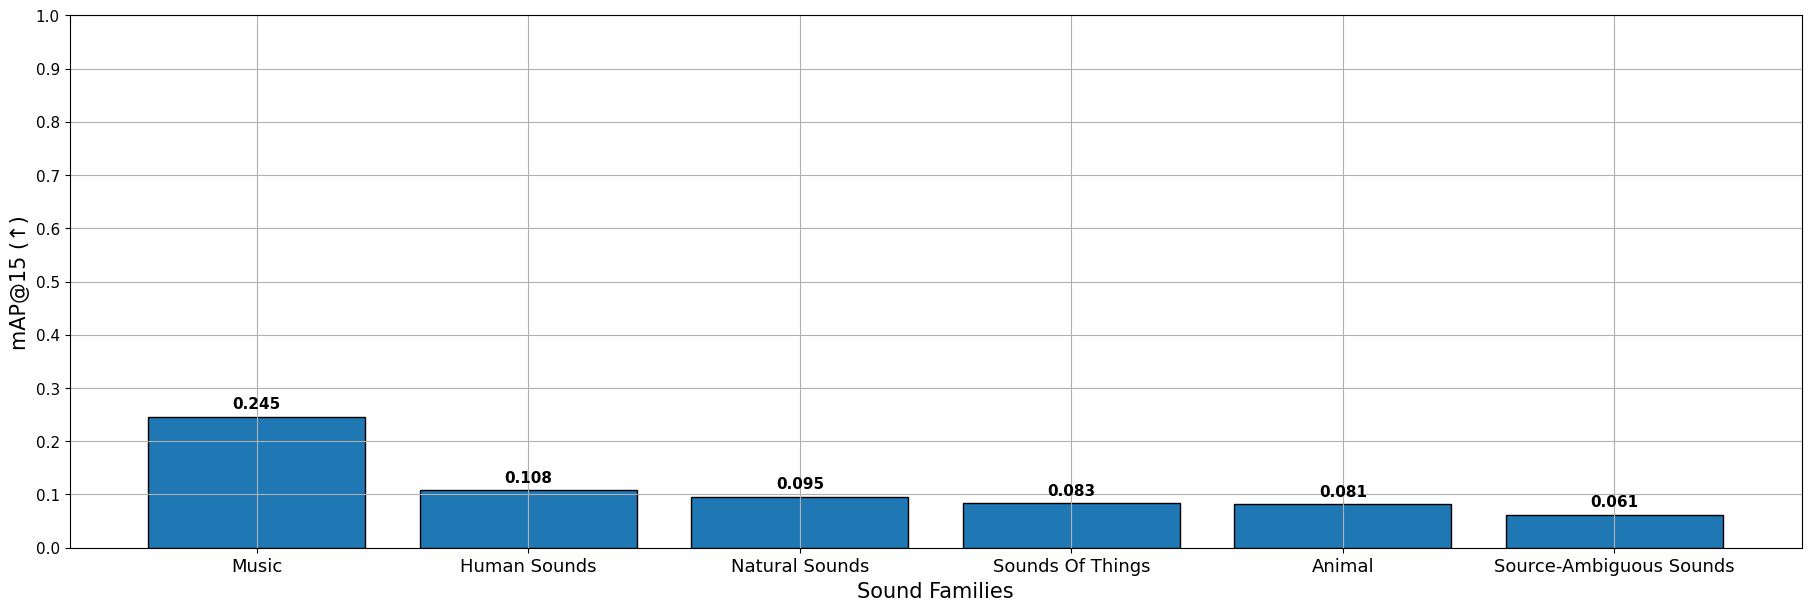

('imagebind_huge', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/imagebind_huge/family_based_mAP@15.png


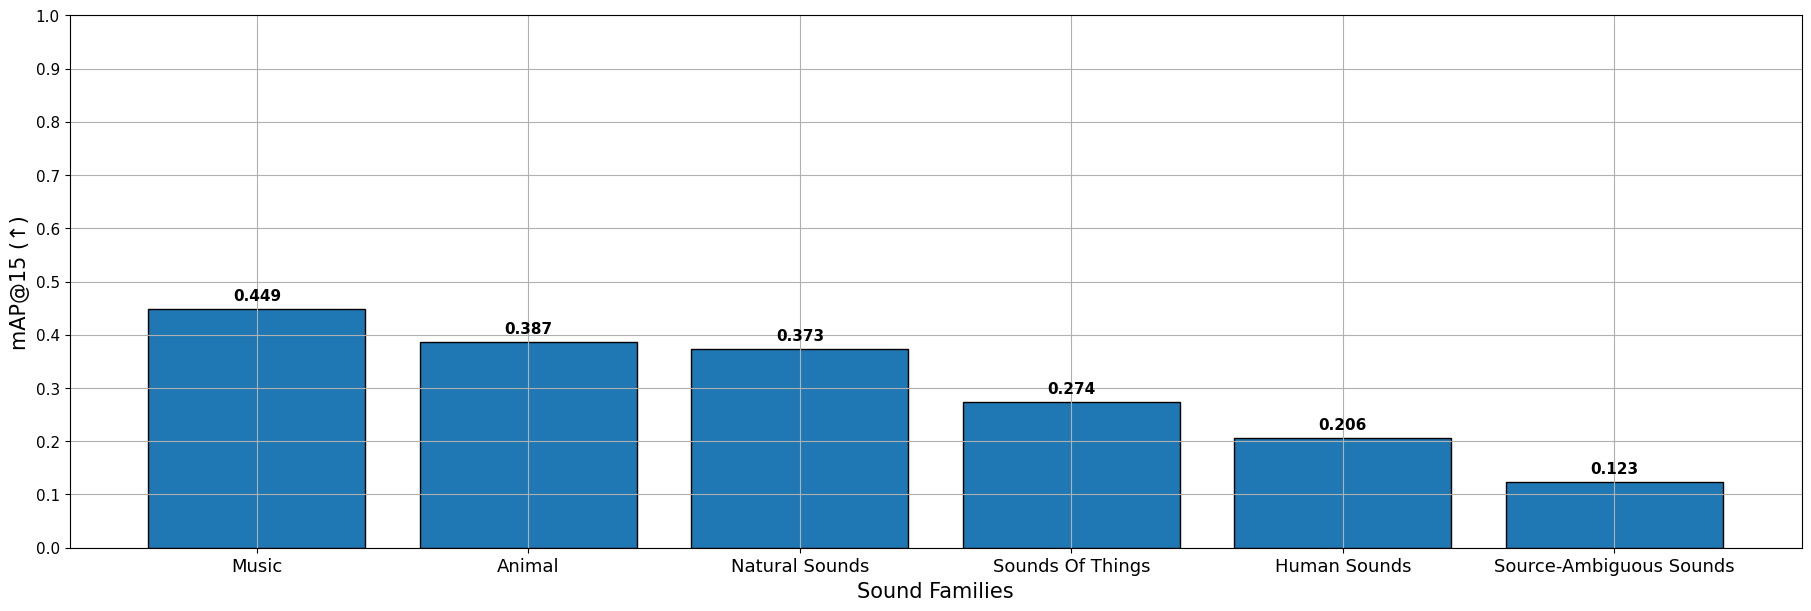

In [11]:
save_fig = True
for model in models:
    print(model)
    plot_map_at_N_for_families(model, N=15, use_fig_name=False, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

##### 15-150

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fs-essentia-extractor_legacy/family_based_mAP@15_mAP@150150.png


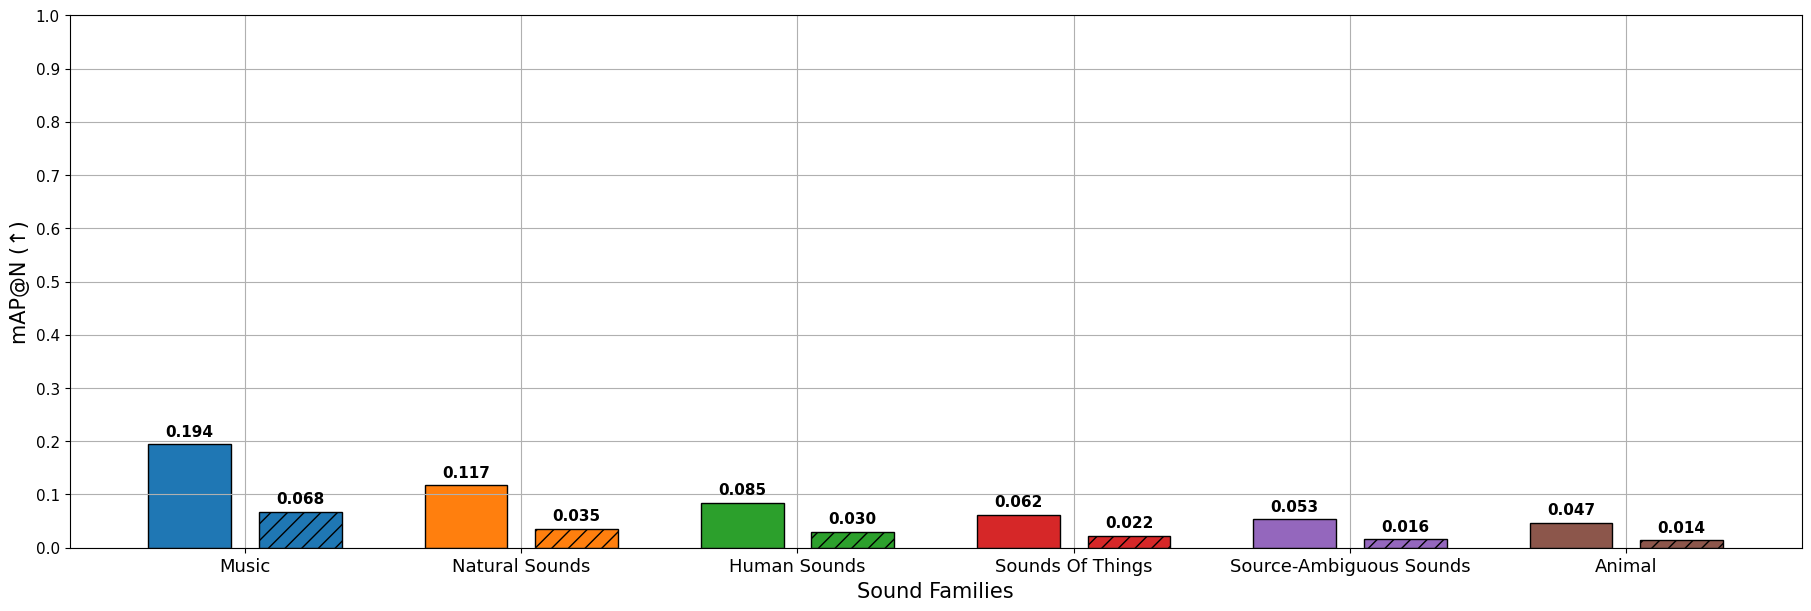

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-vggish-3/family_based_mAP@15_mAP@150150.png


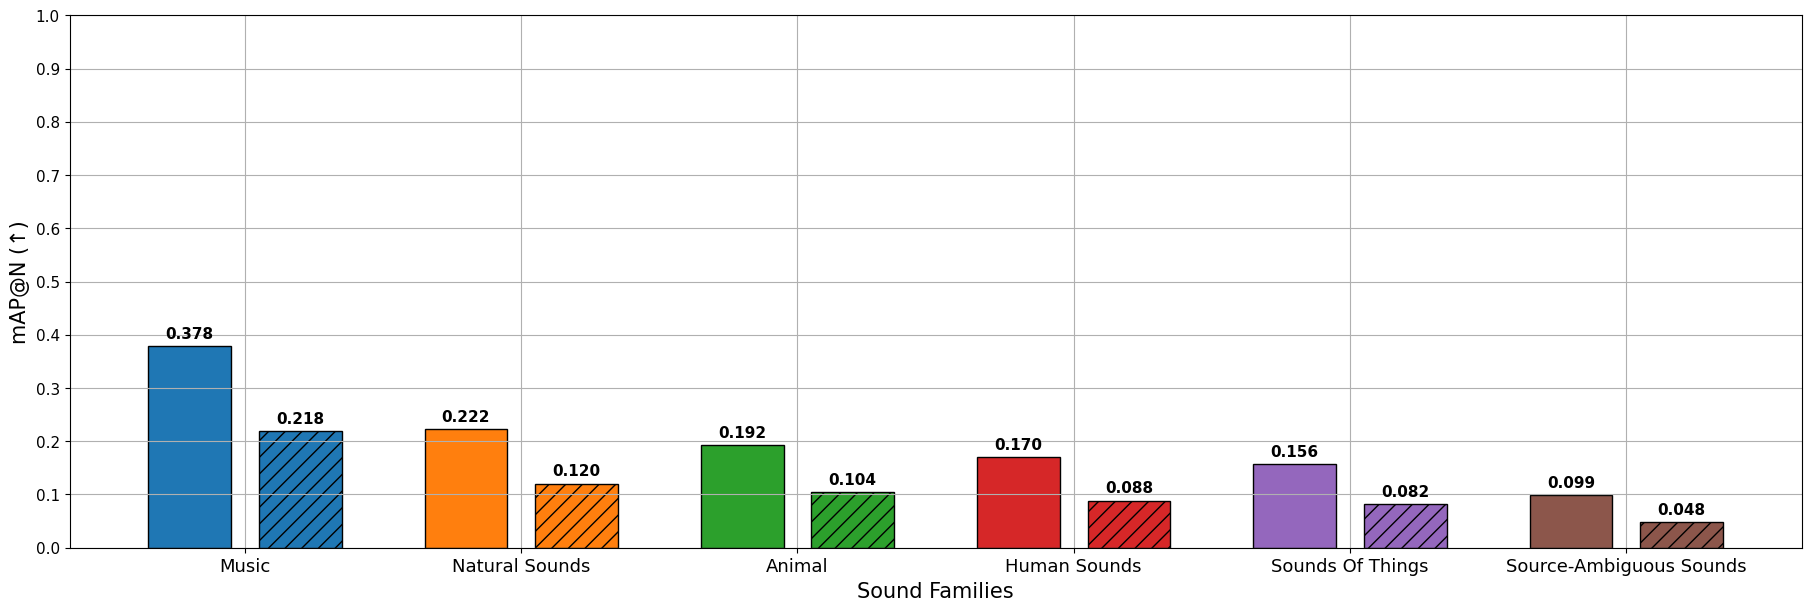

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-yamnet-1/family_based_mAP@15_mAP@150150.png


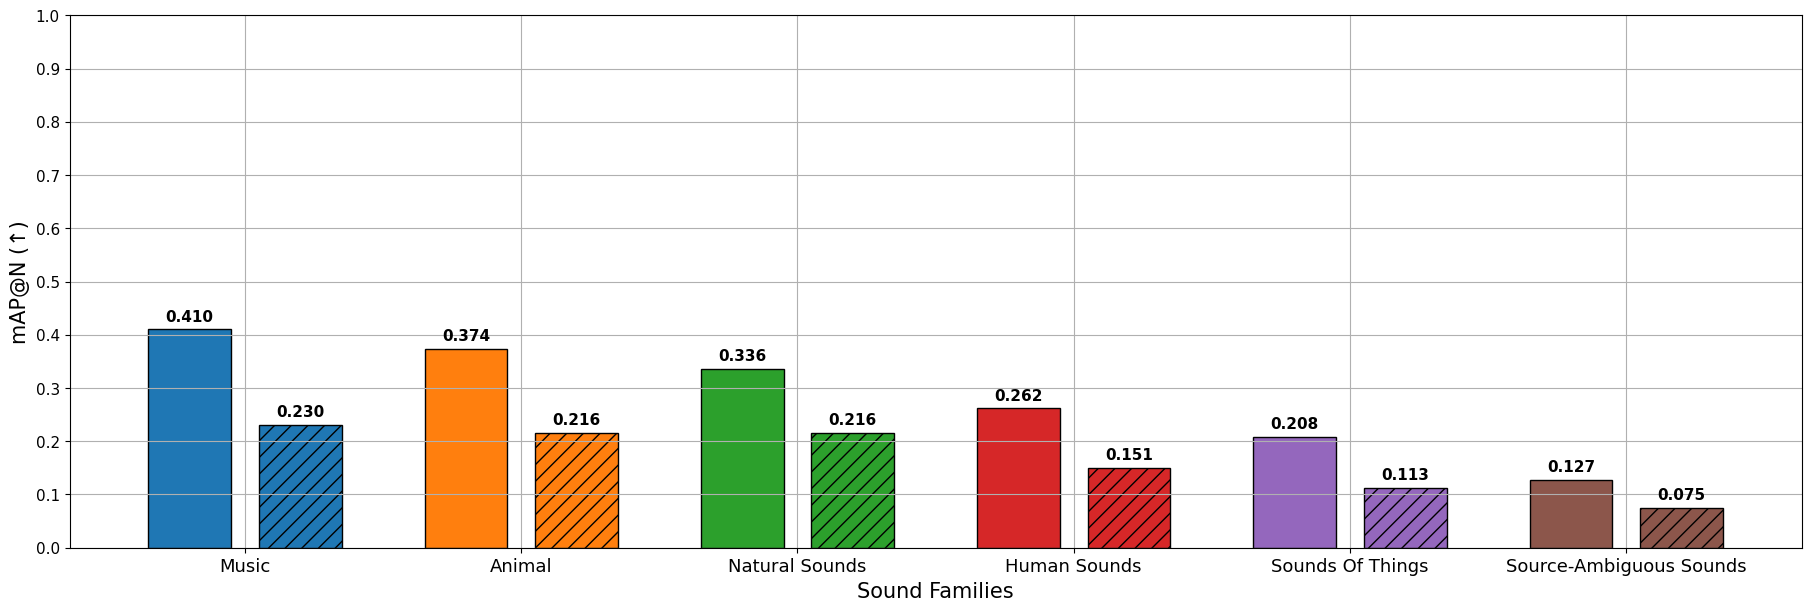

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fsd-sinet-vgg42-tlpf-1/family_based_mAP@15_mAP@150150.png


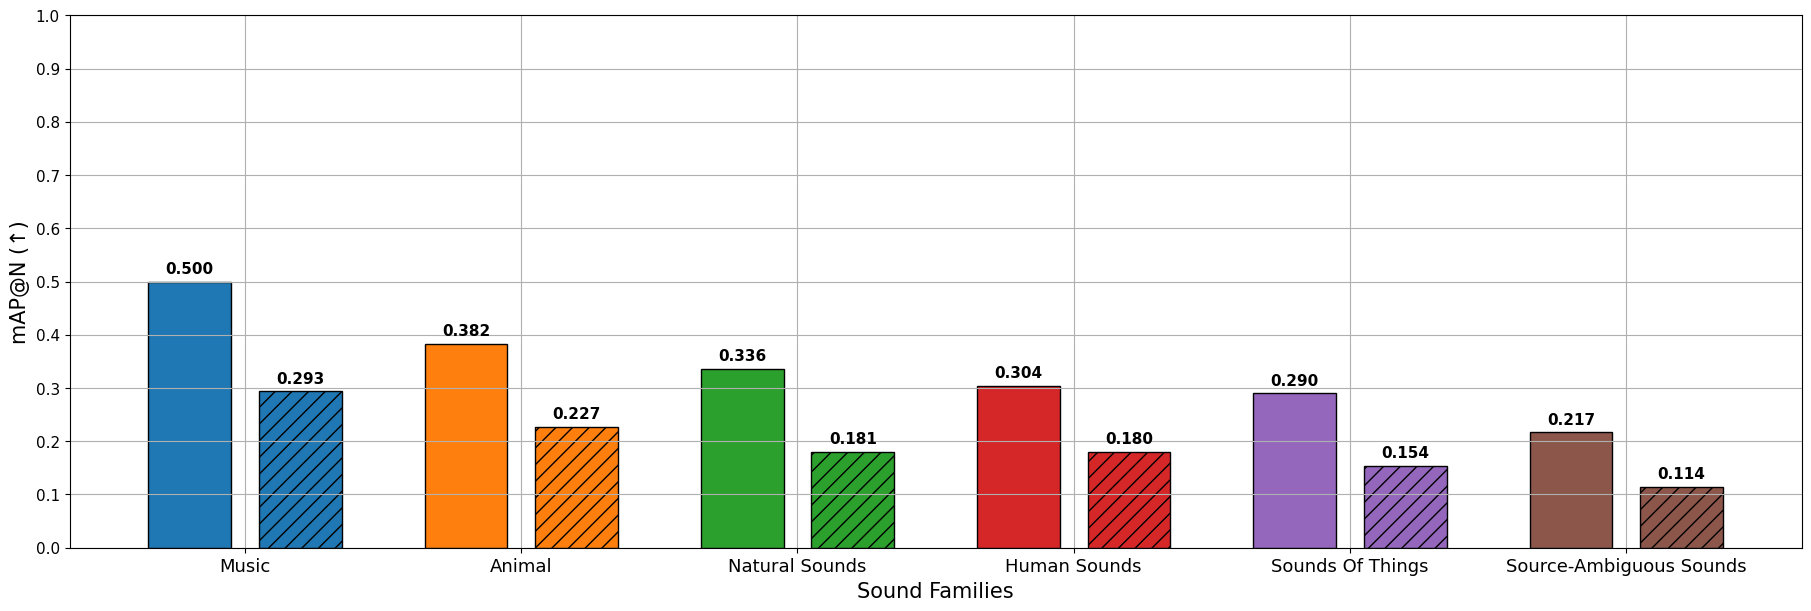

FileNotFoundError: [Errno 2] No such file or directory: '/home/roguz/freesound/freesound-perceptual_similarity/data/evaluation_results/FSD50K.eval_audio/BEATs_iter3_plus_AS2M-Agg_mean-PCA_100-Norm_True/nn/families_mAP@150.csv'

In [8]:
save_fig = True
for model in models:
    plot_map_at_15_150_for_families(model, use_fig_name=False, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

### Label

('fs-essentia-extractor_legacy', 'PCA_100', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fs-essentia-extractor_legacy/label_based_mAP@15.png


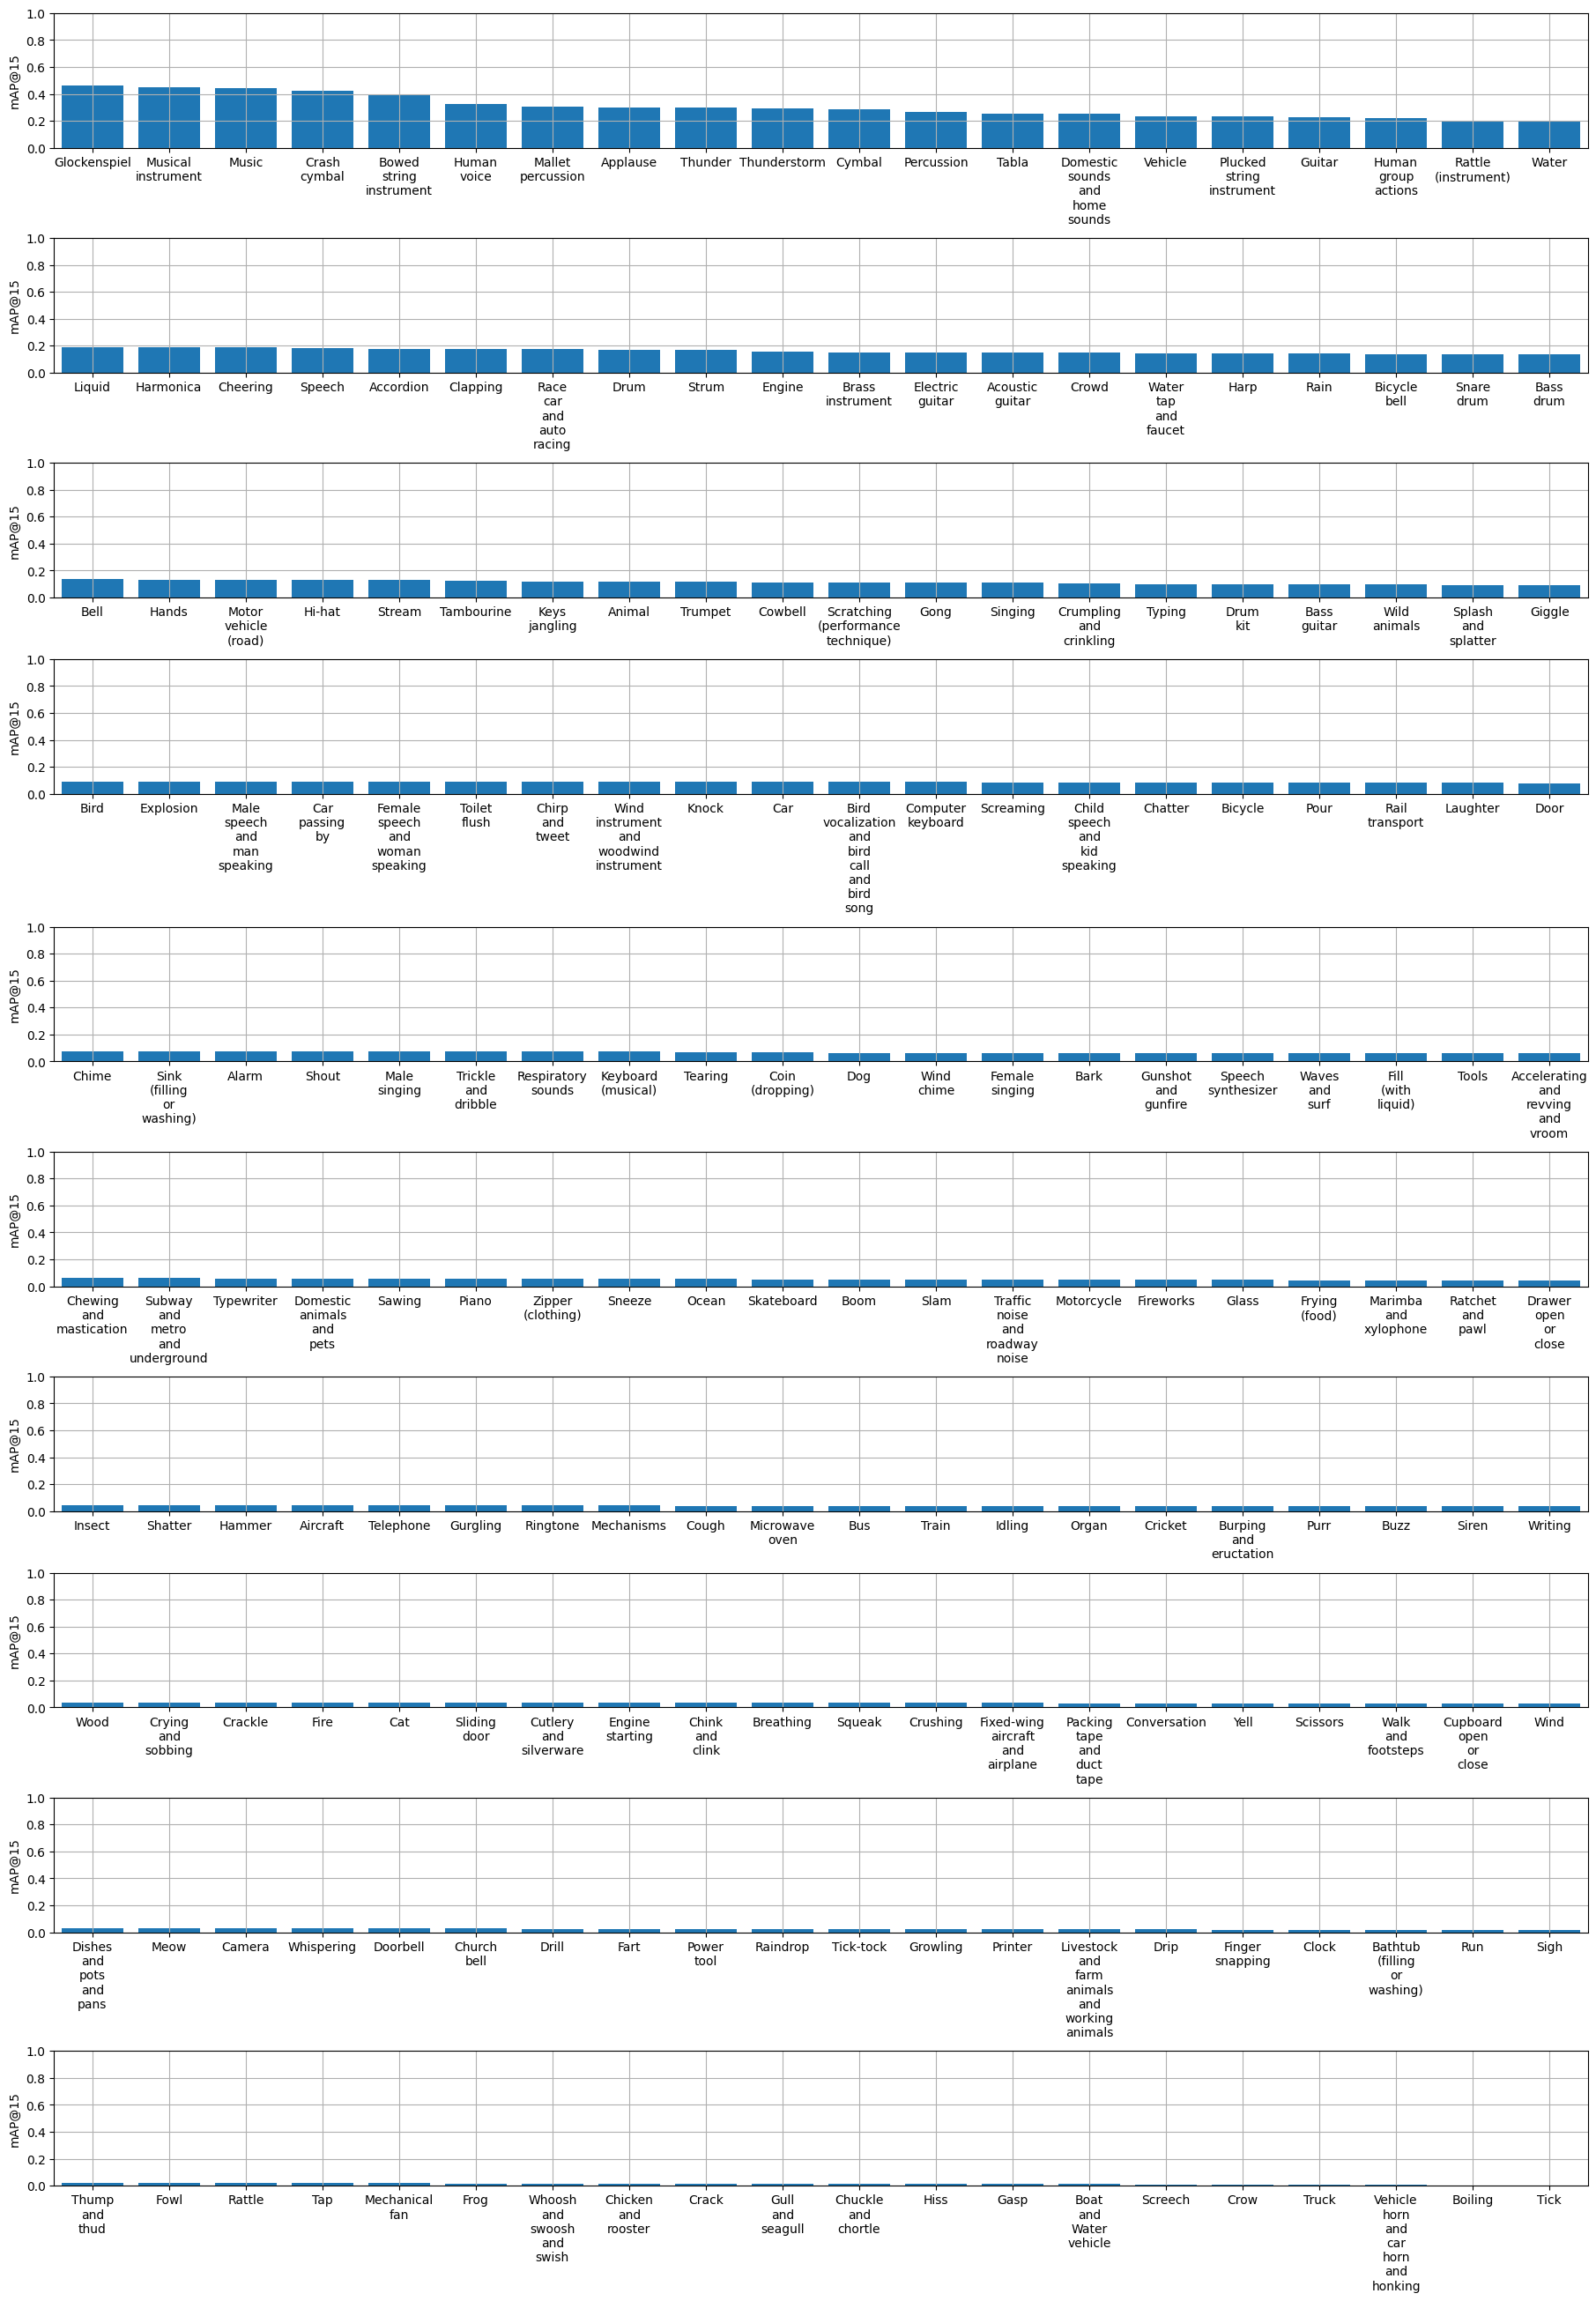

('audioset-vggish-3', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-vggish-3/label_based_mAP@15.png


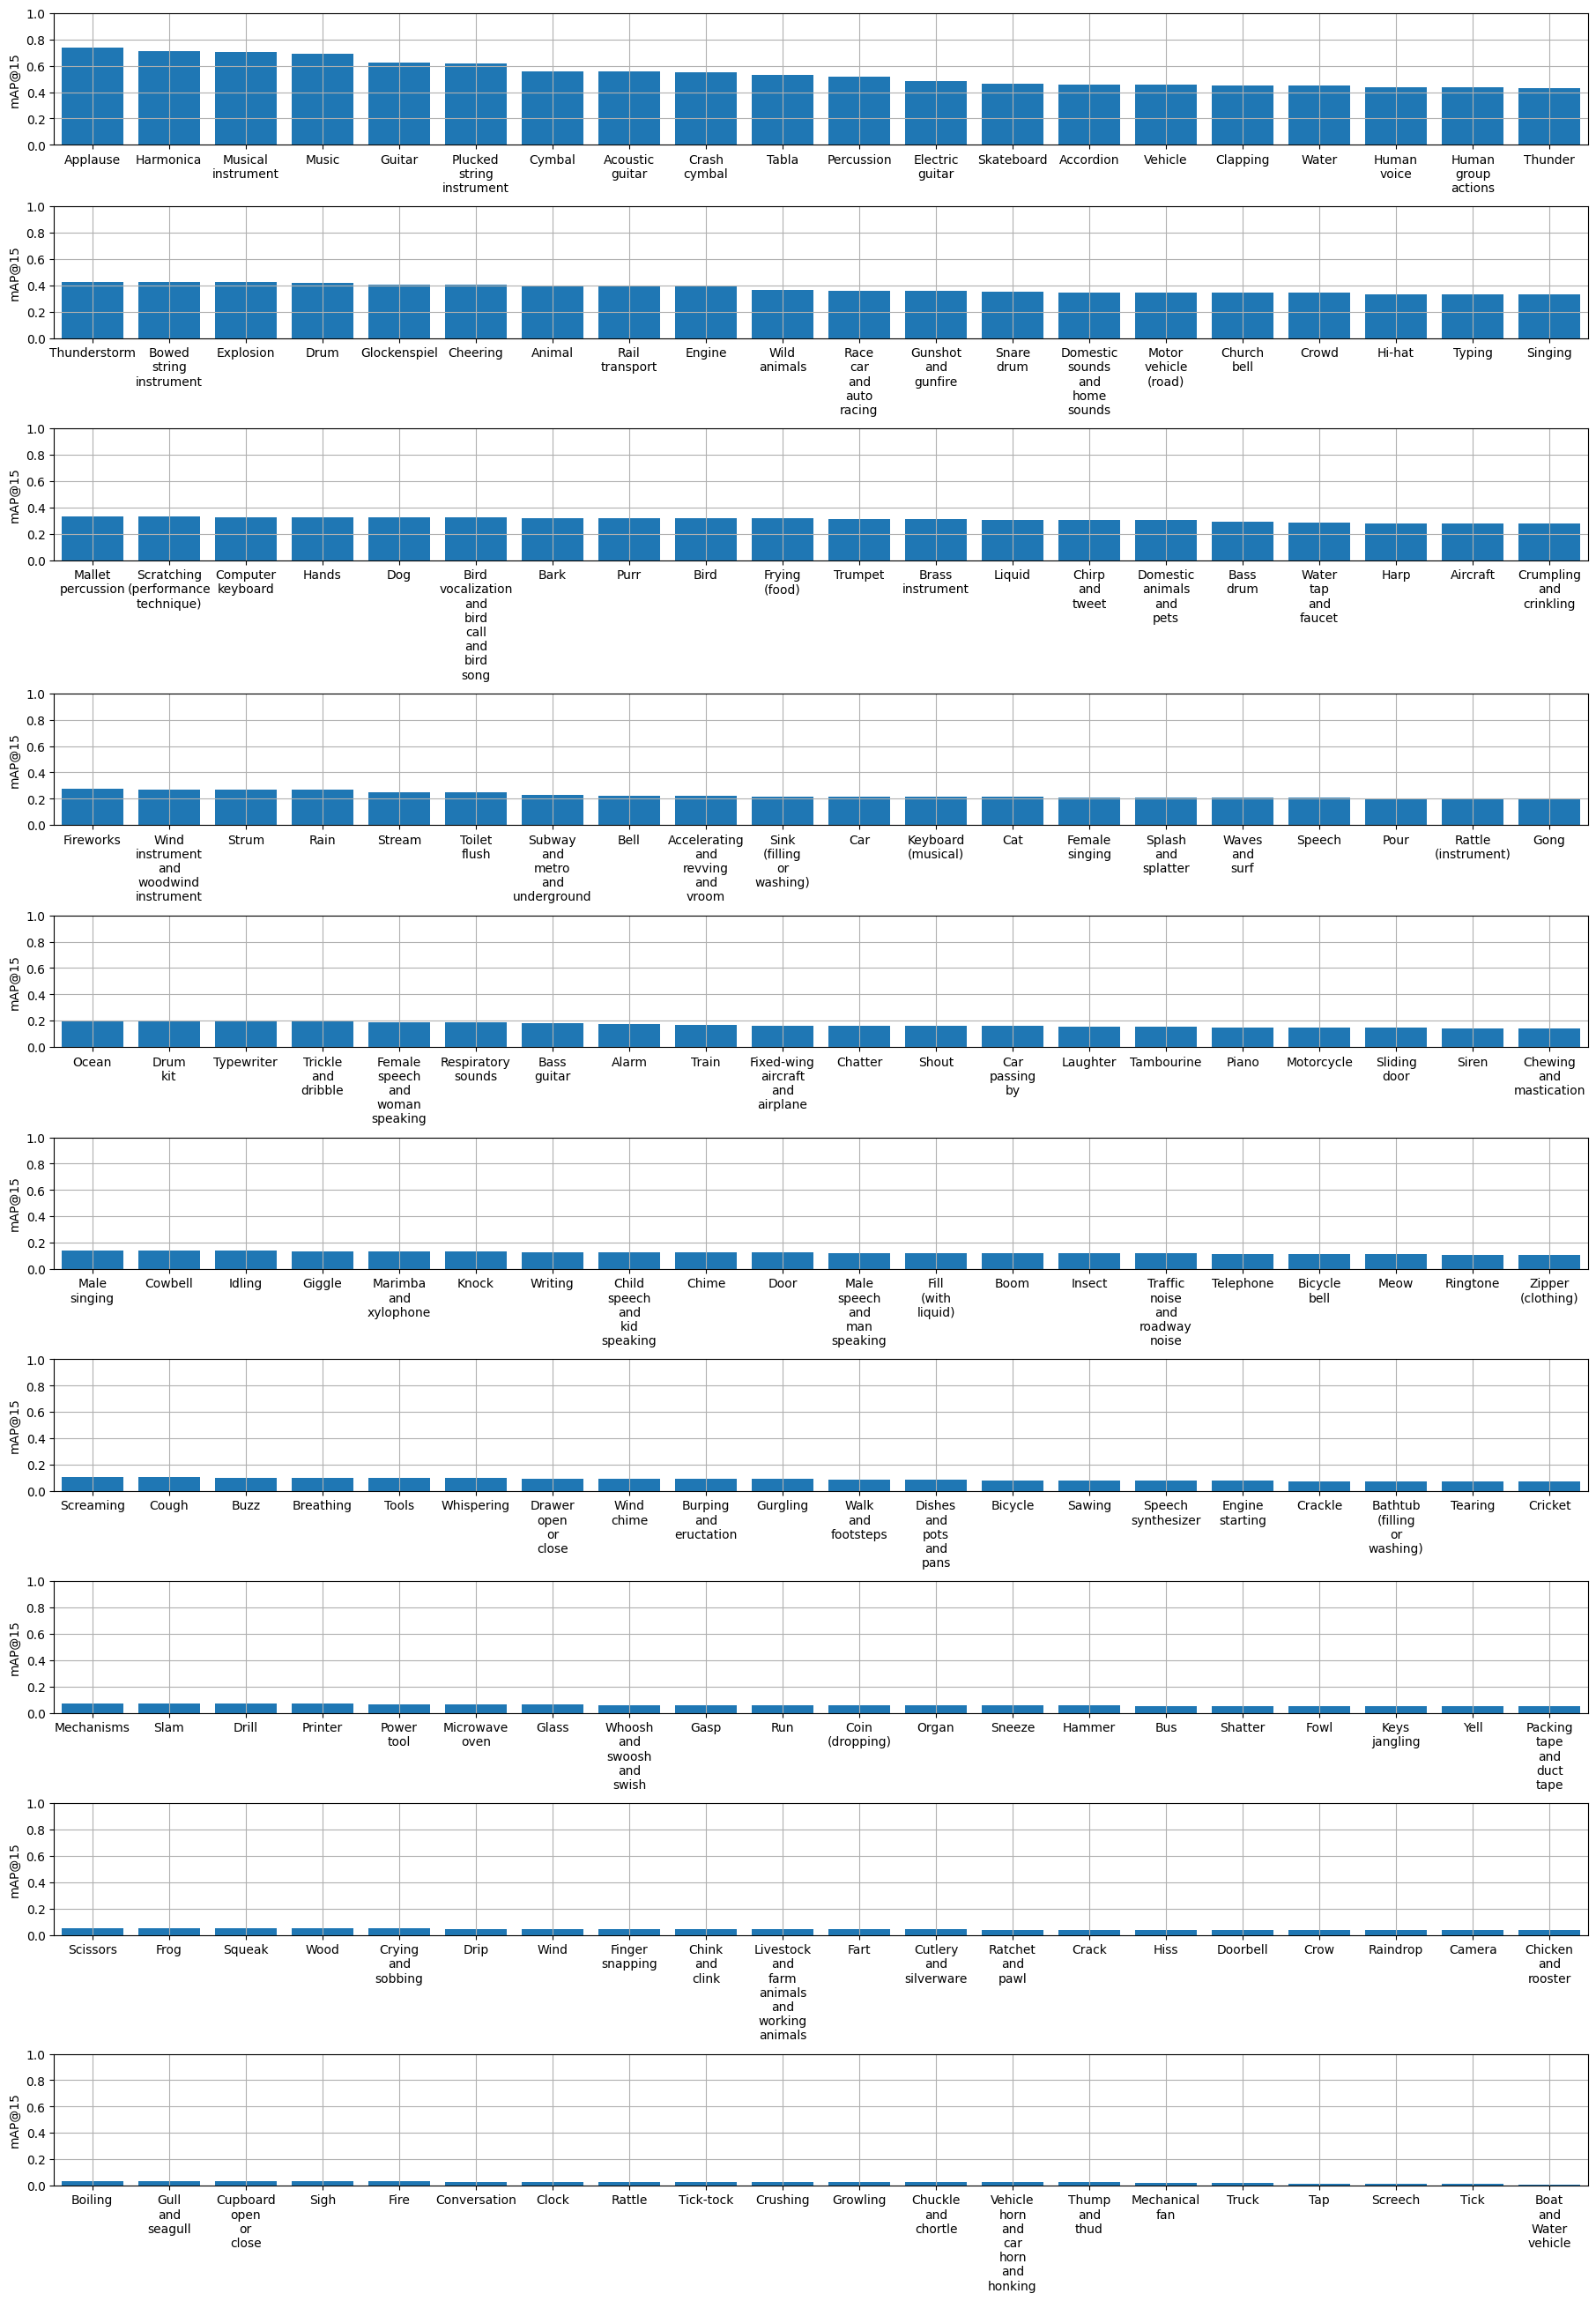

('audioset-yamnet-1', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-yamnet-1/label_based_mAP@15.png


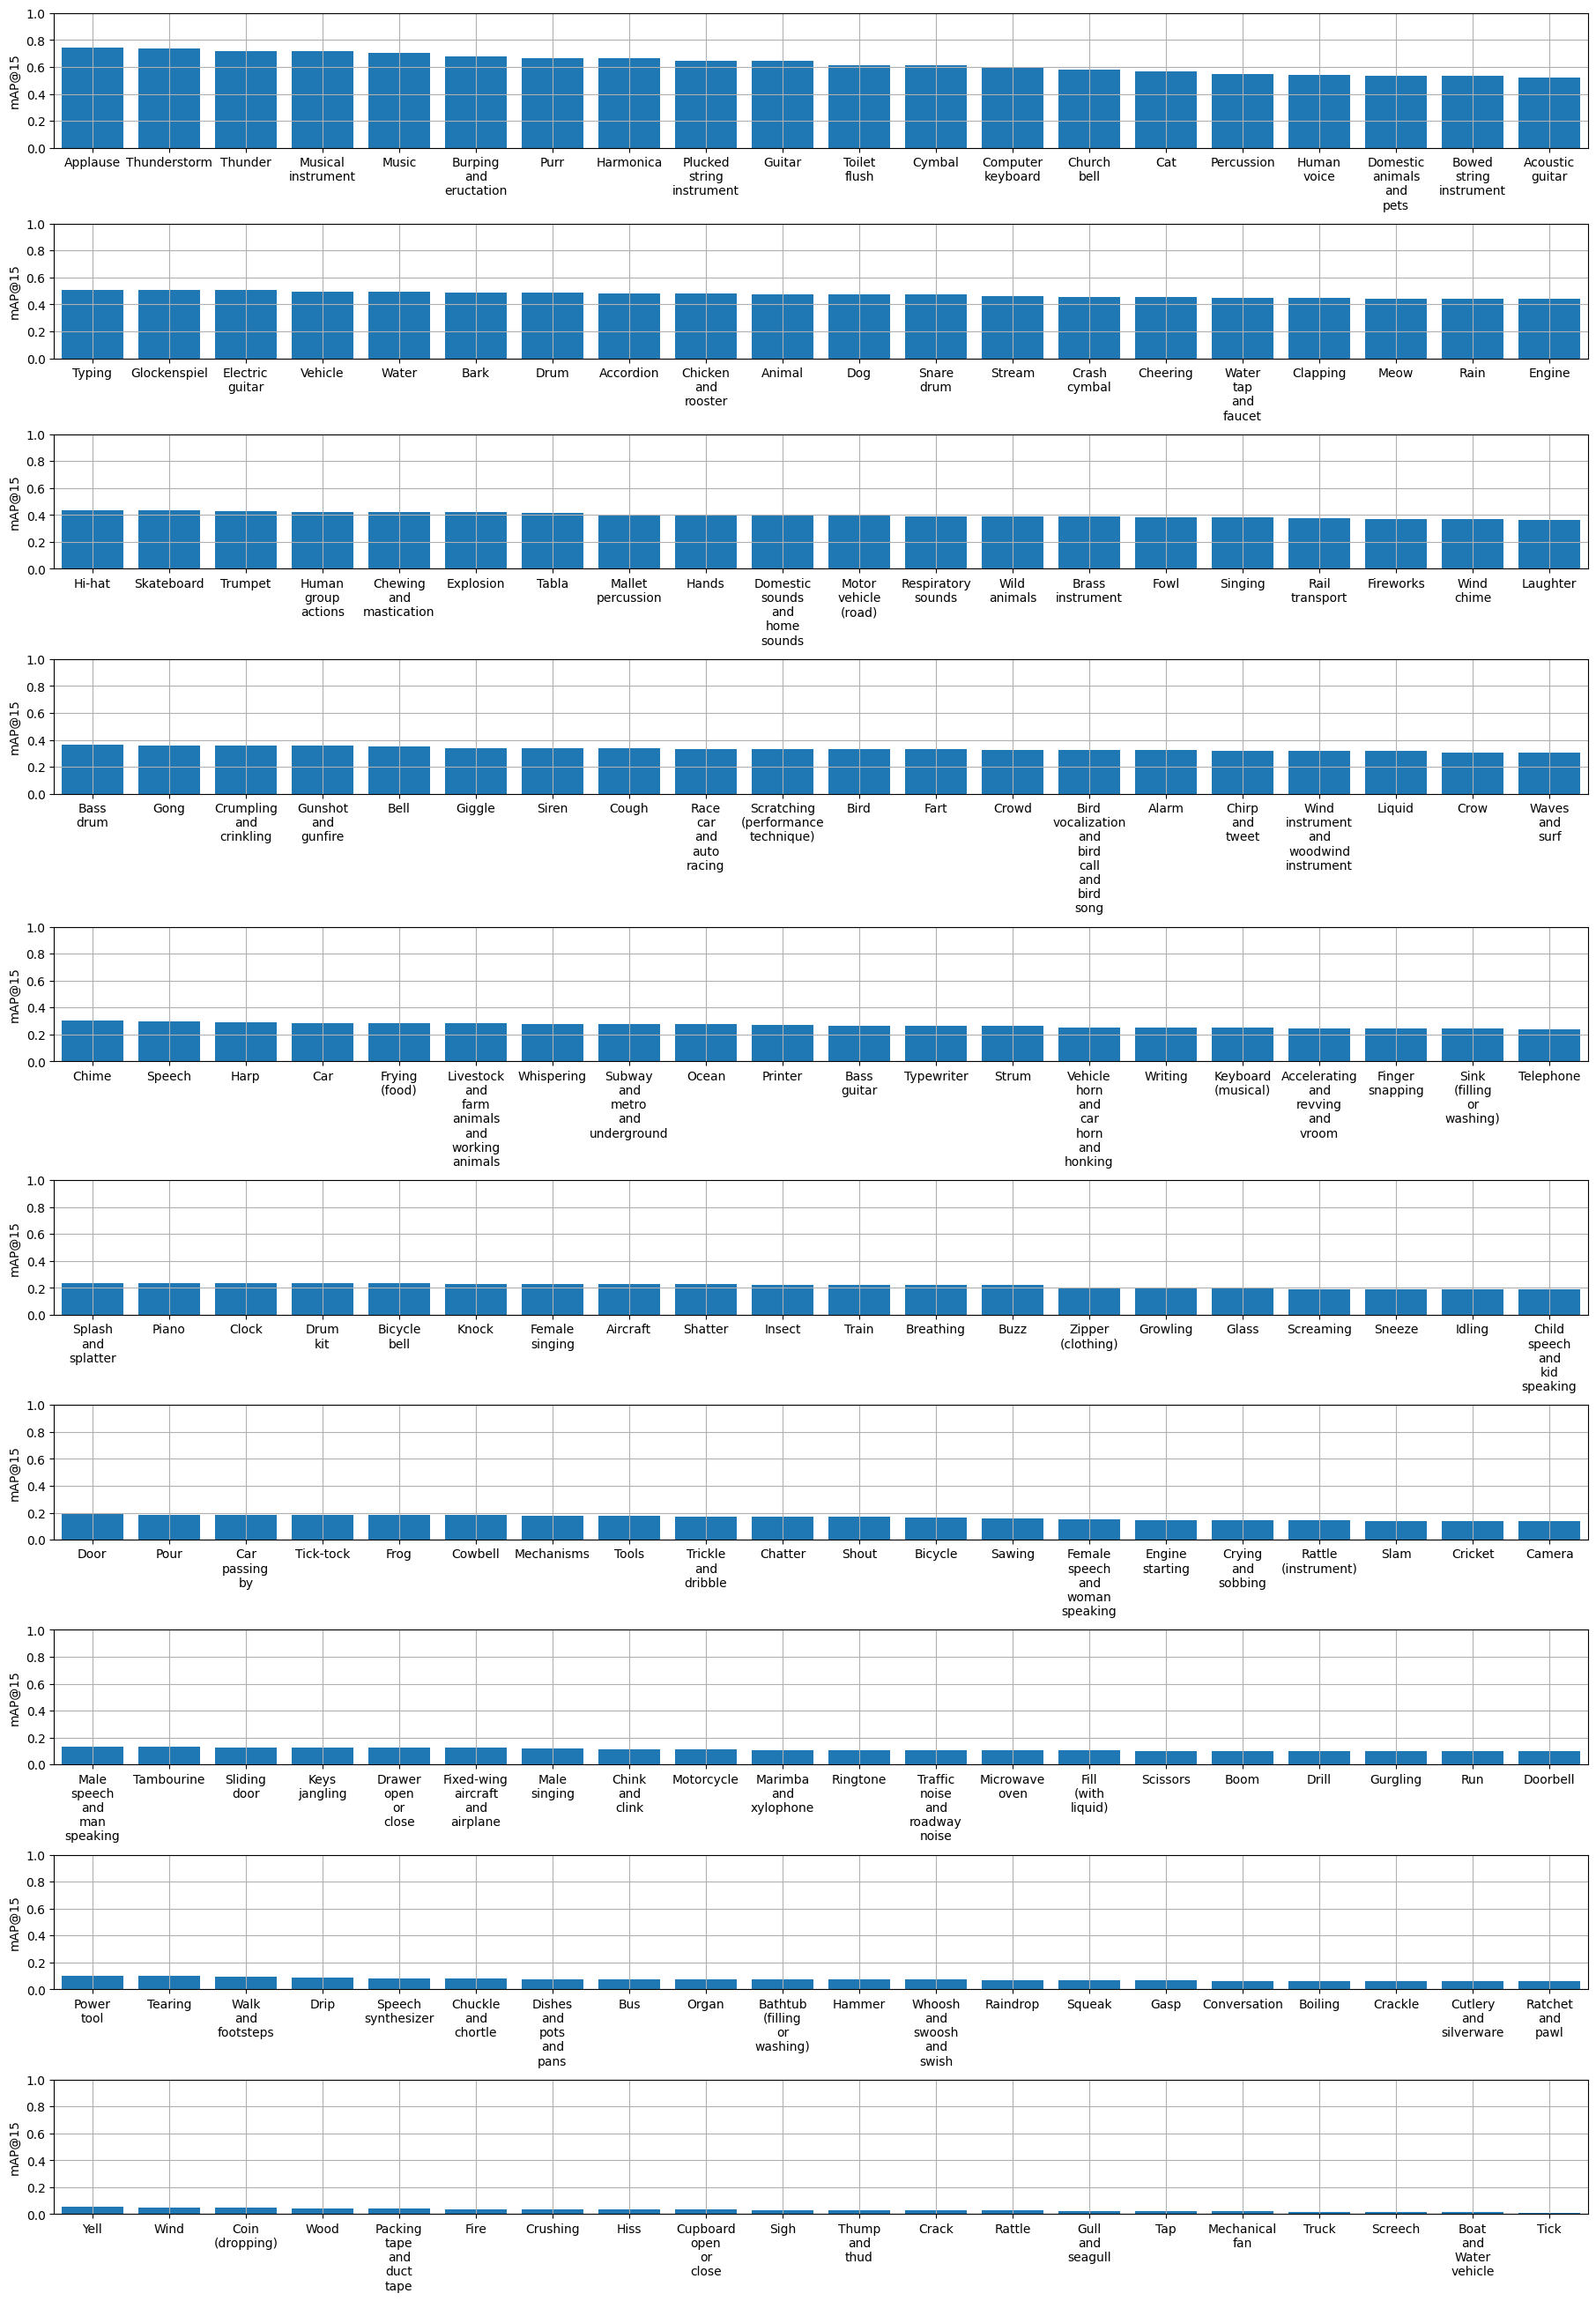

('fsd-sinet-vgg42-tlpf-1', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fsd-sinet-vgg42-tlpf-1/label_based_mAP@15.png


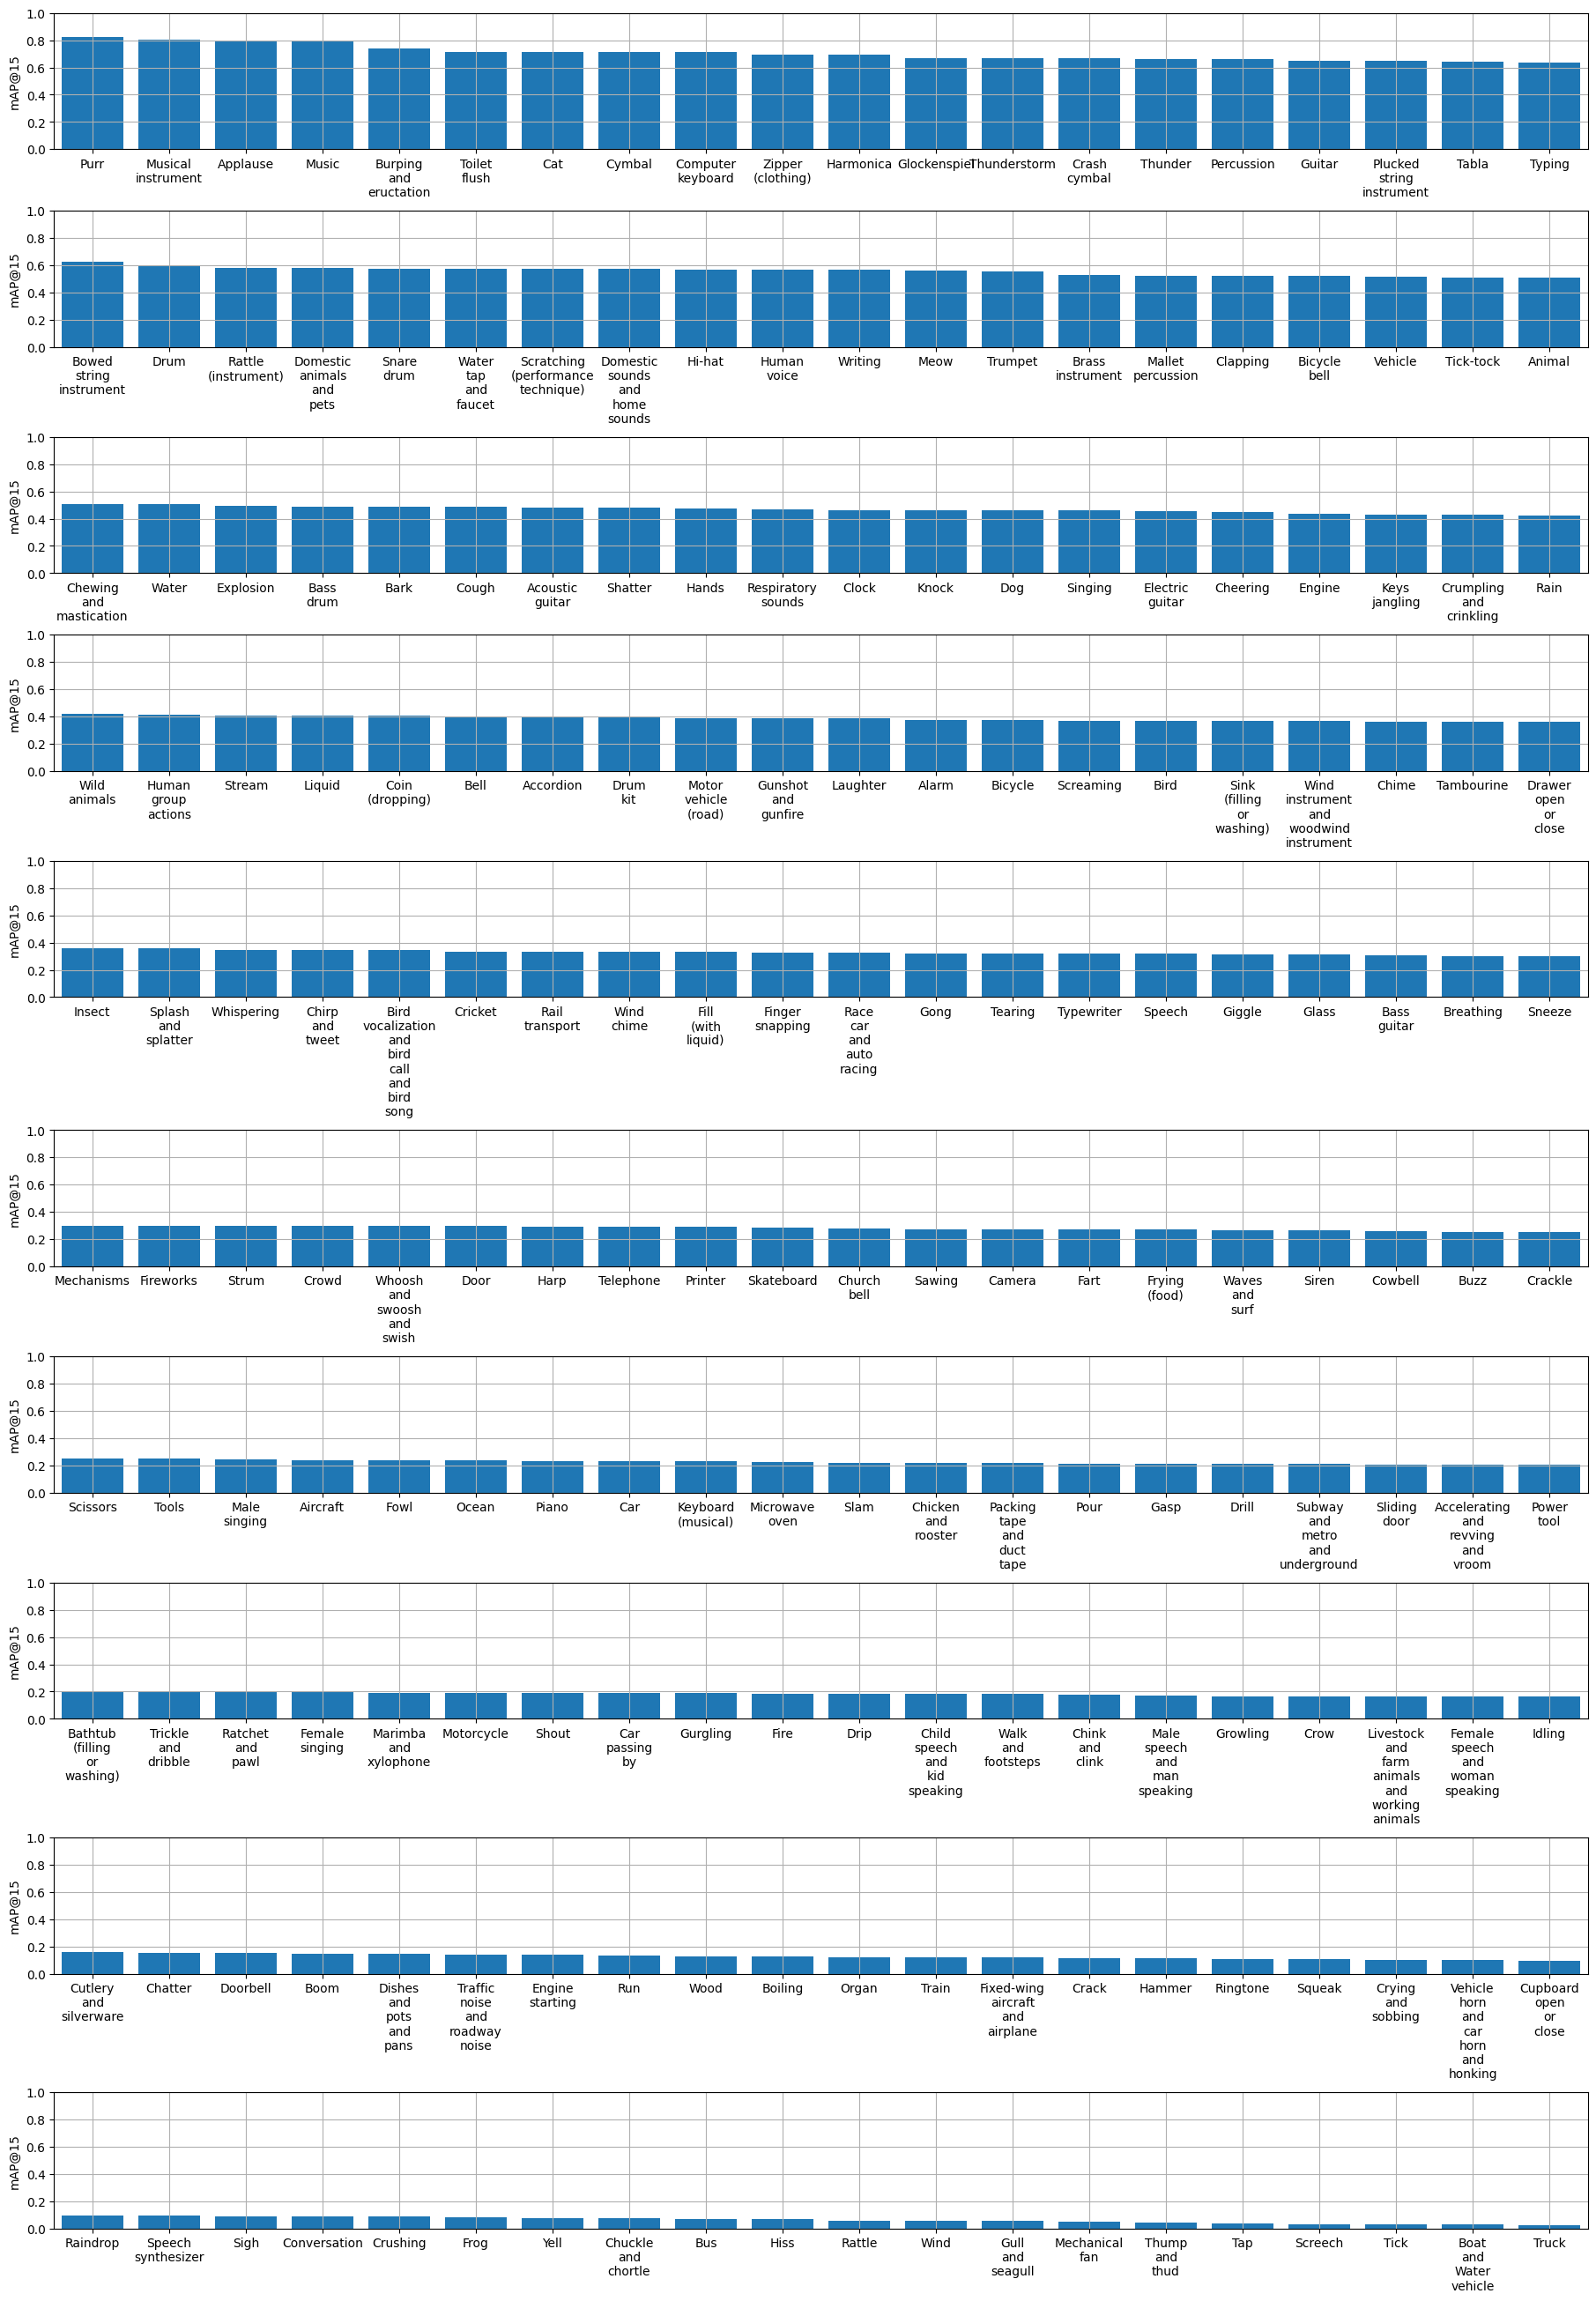

('BEATs_iter3_plus_AS2M', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/BEATs_iter3_plus_AS2M/label_based_mAP@15.png


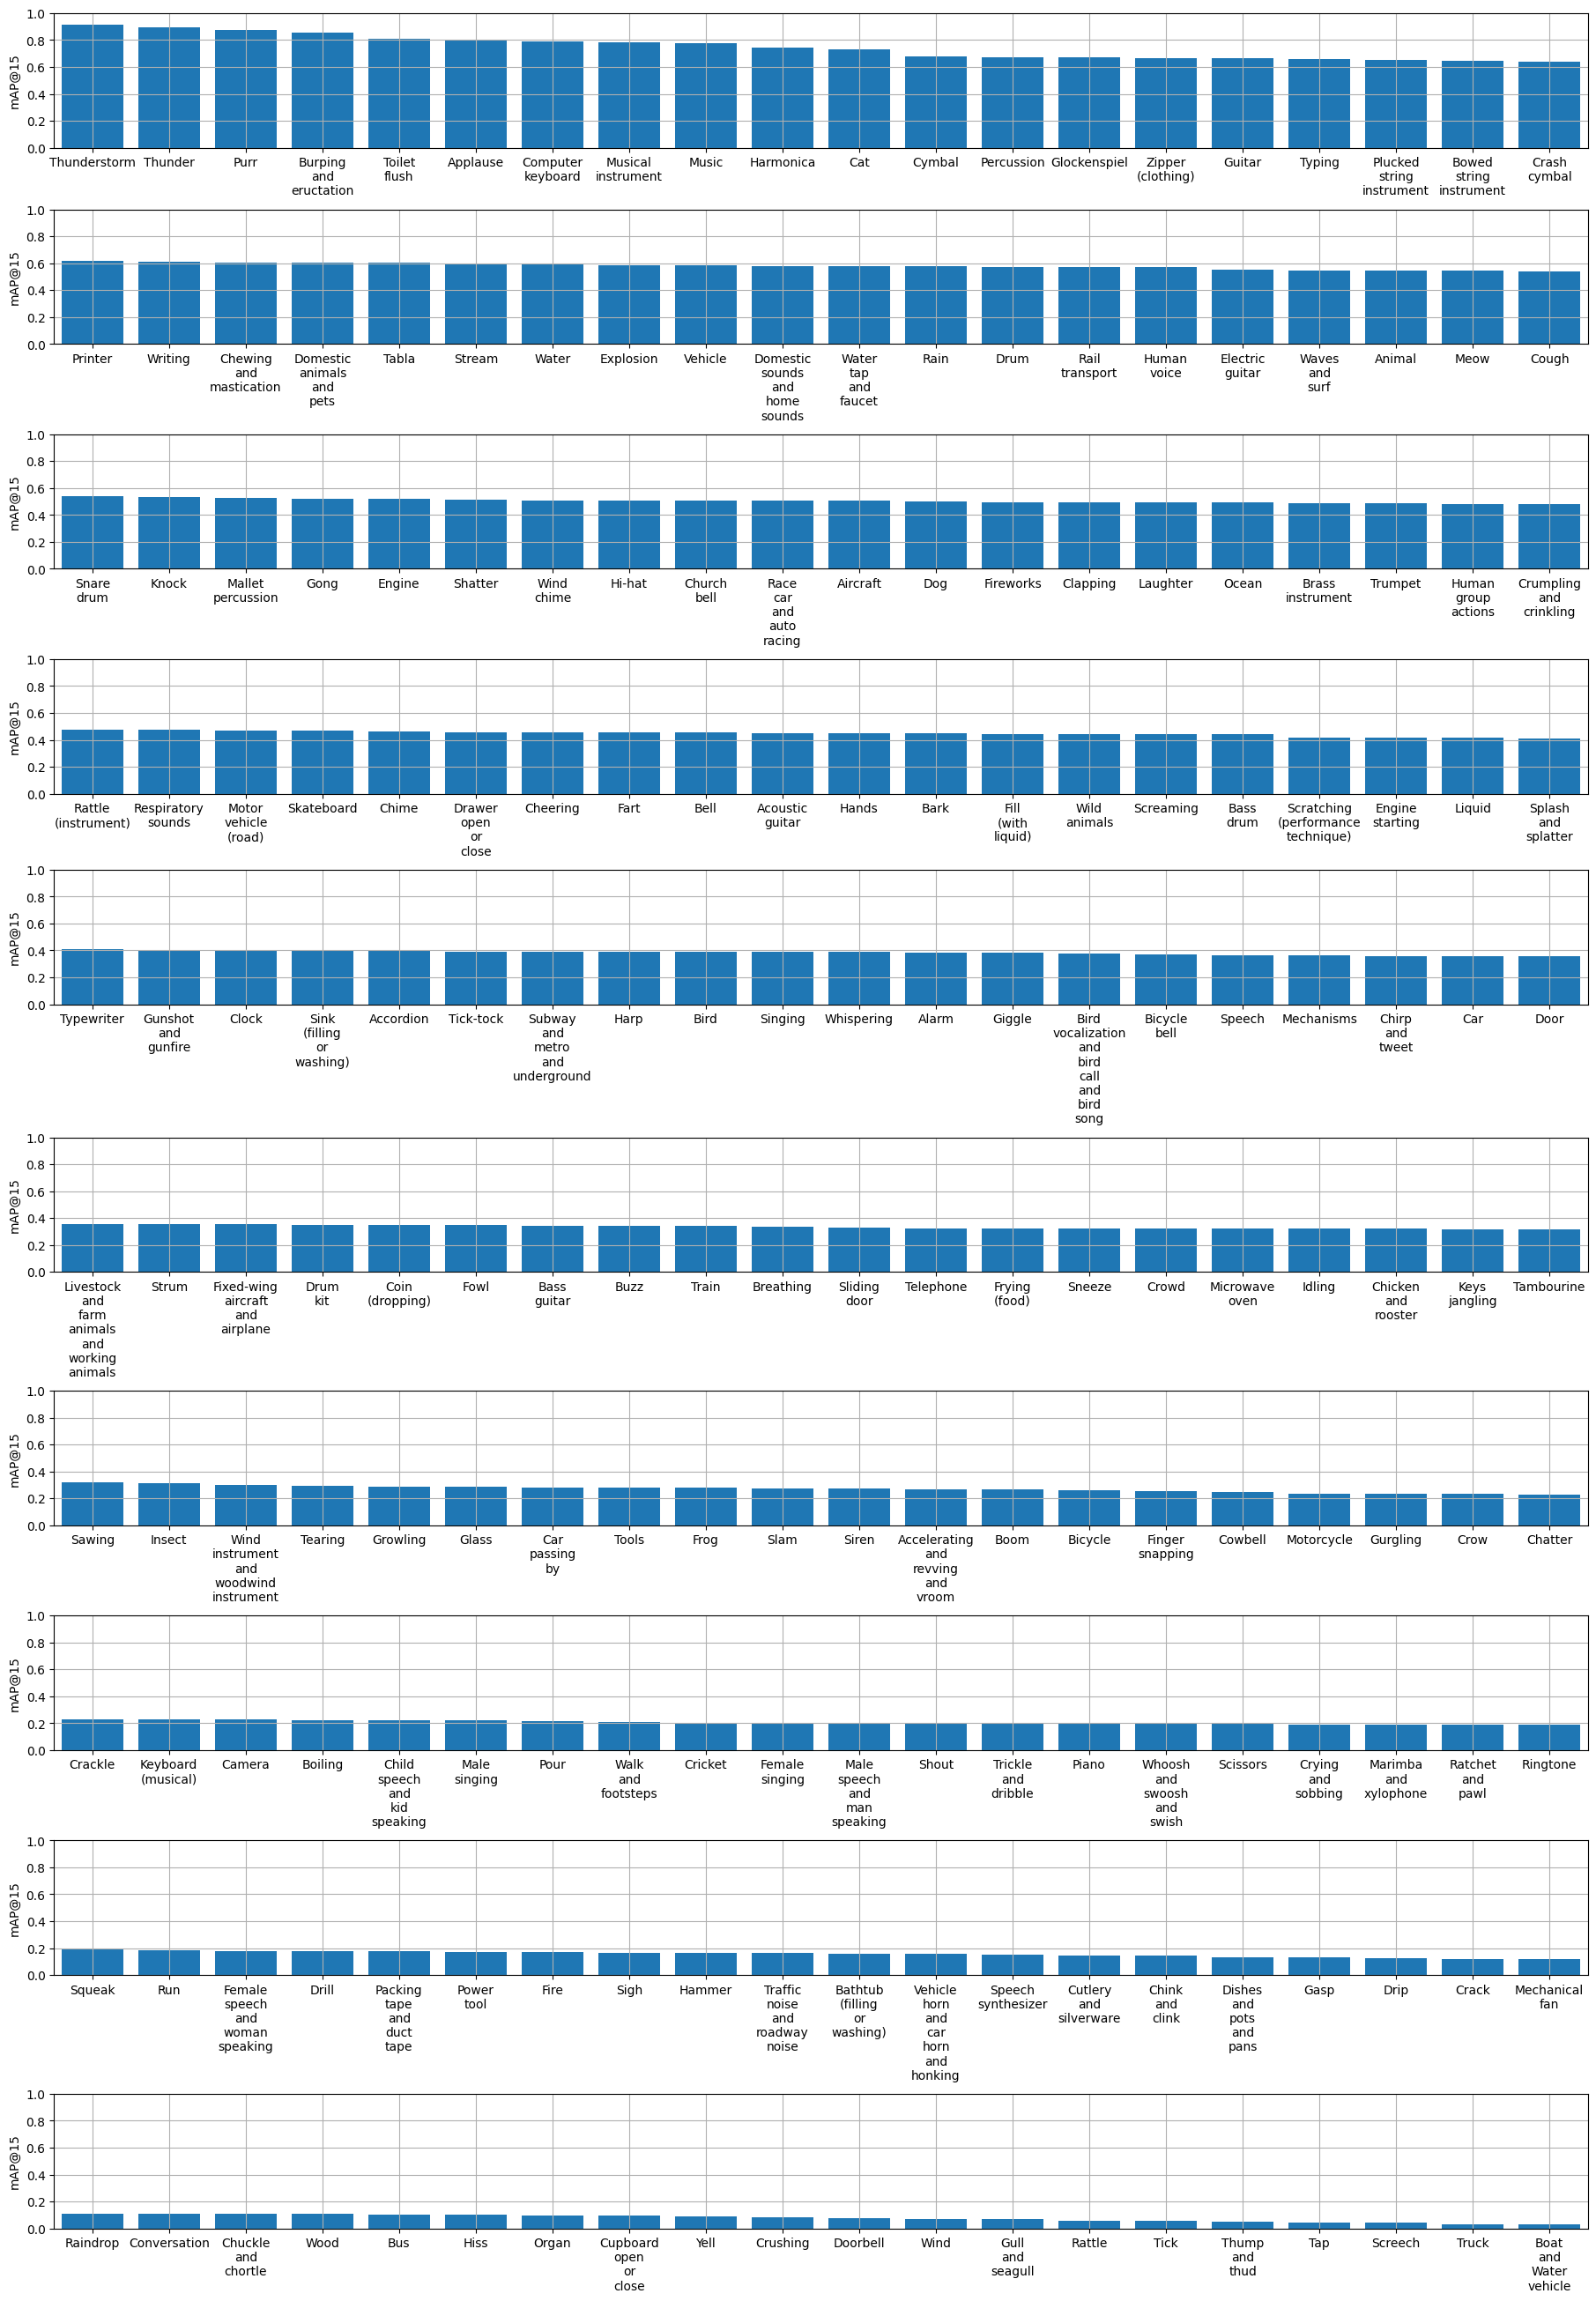

('openl3-env-mel256-emb512-3', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/openl3-env-mel256-emb512-3/label_based_mAP@15.png


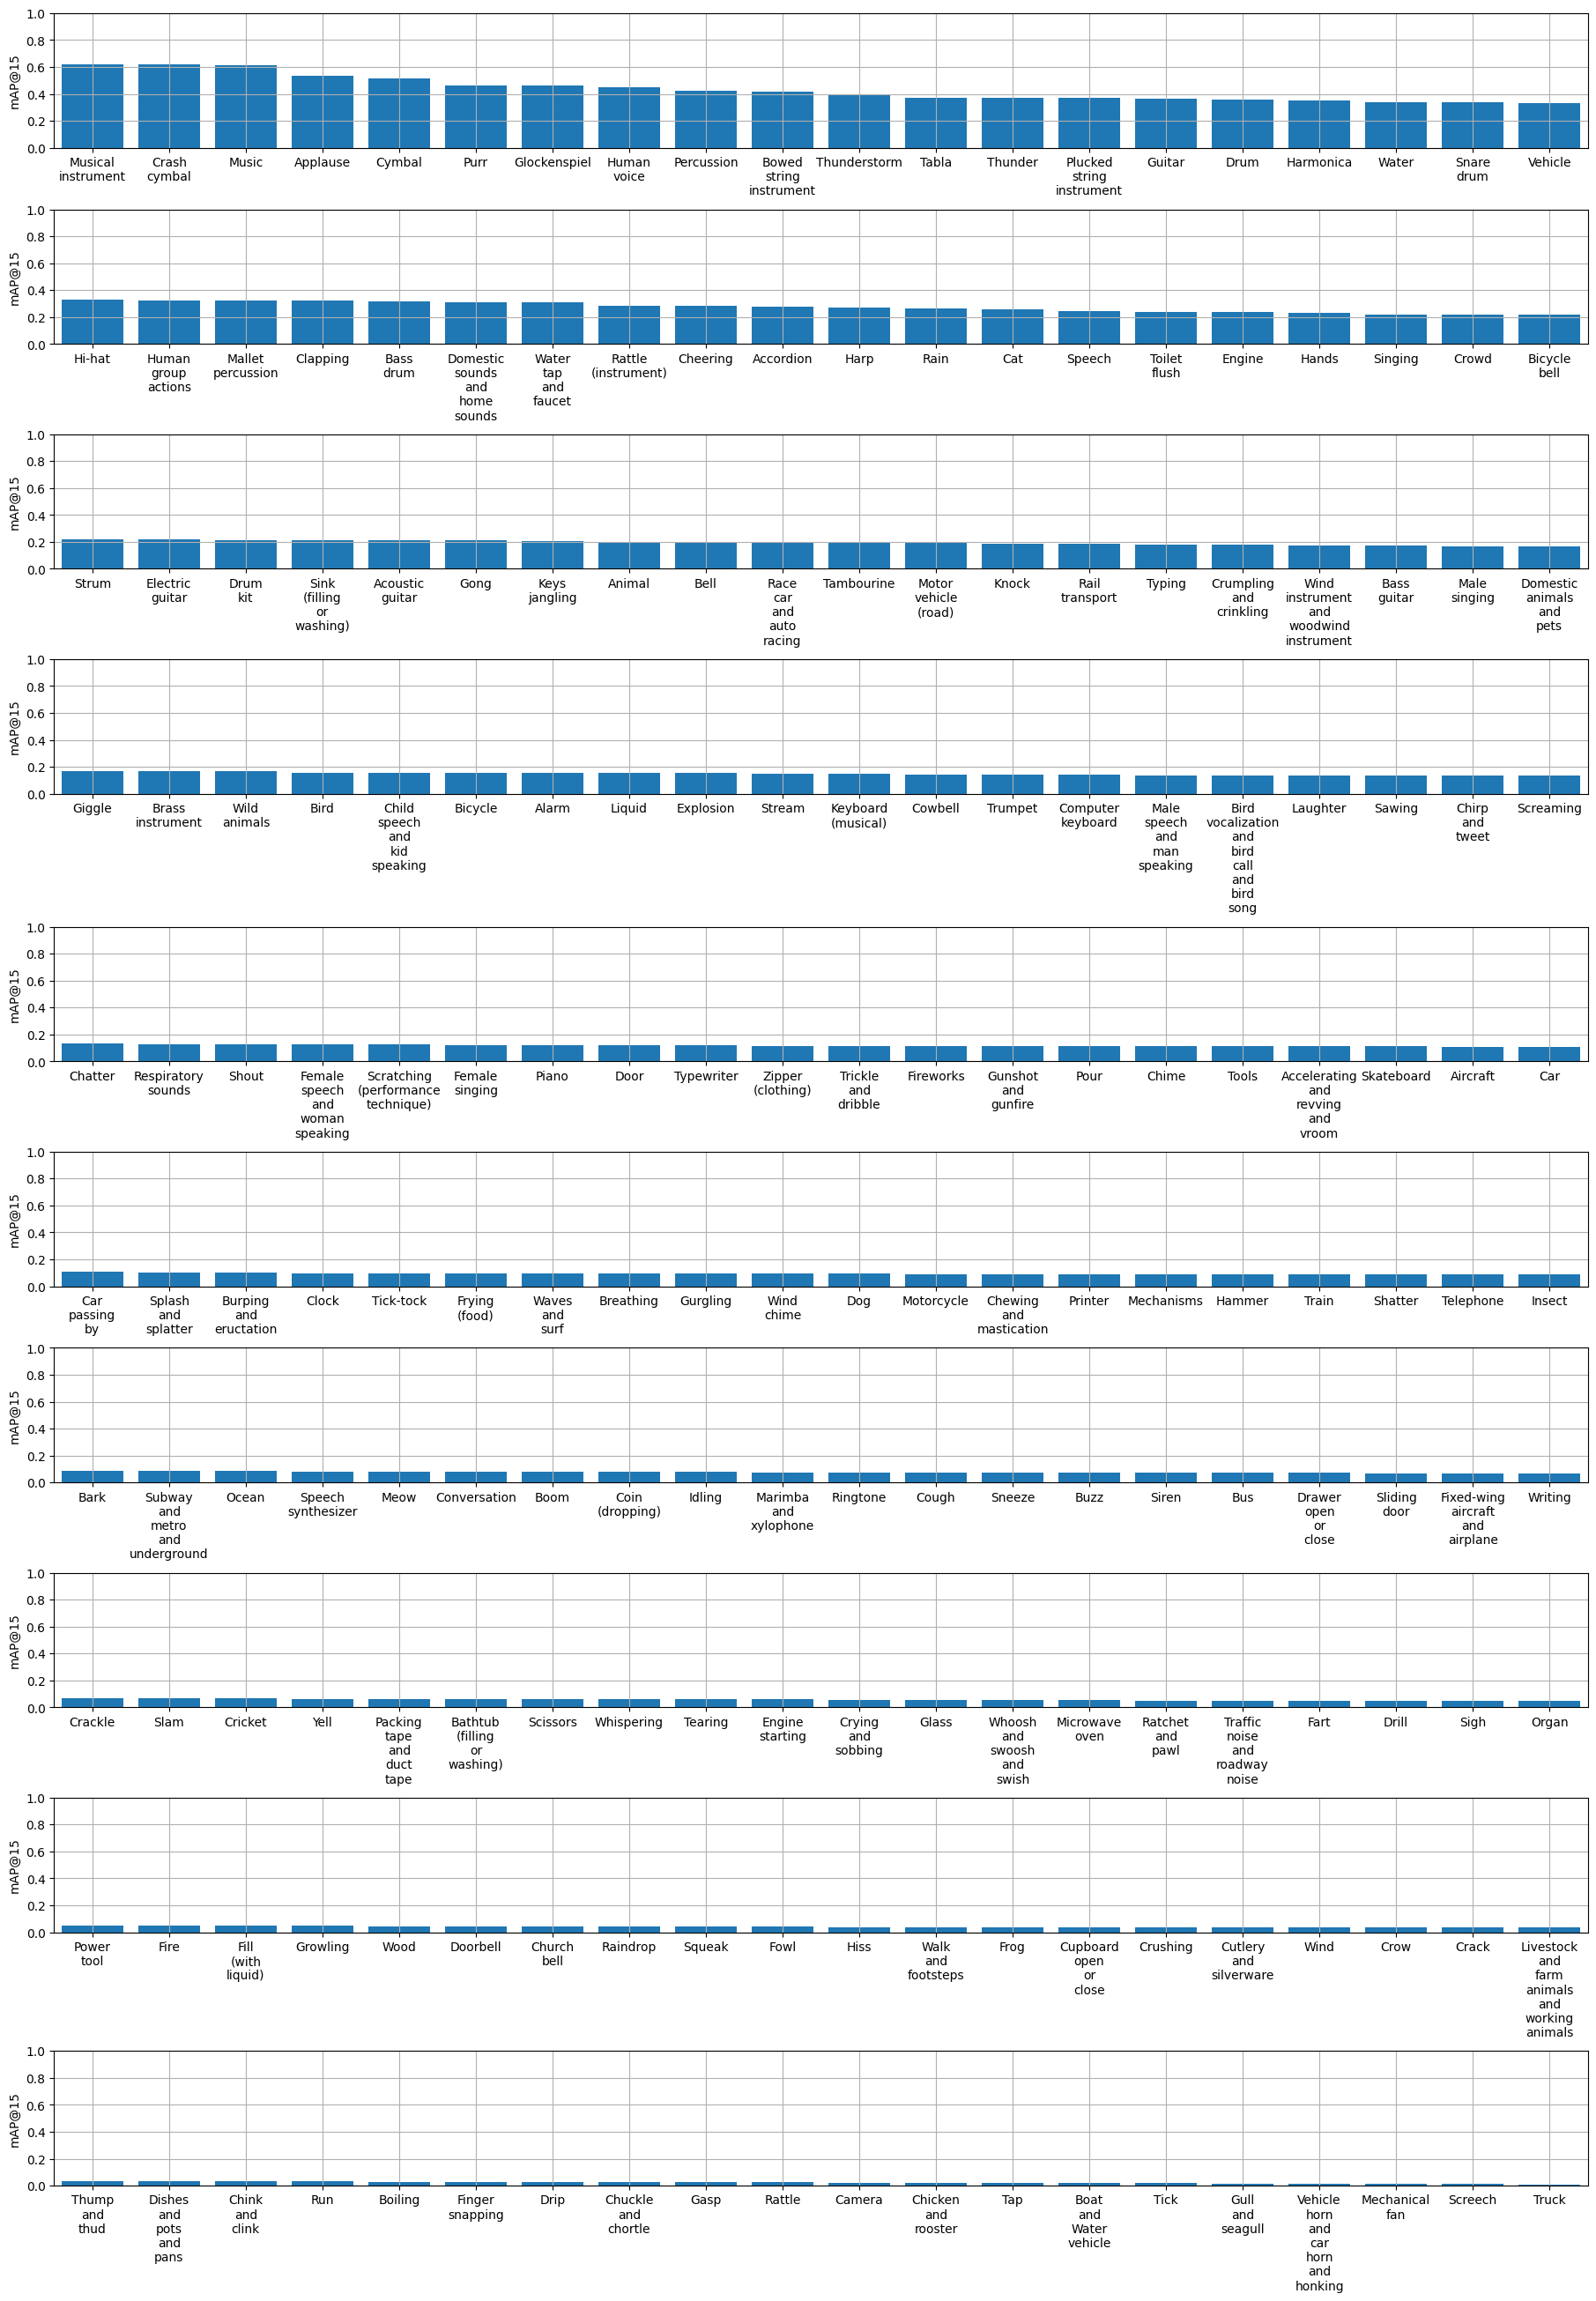

('CAVMAE-as_46.6', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CAVMAE-as_46.6/label_based_mAP@15.png


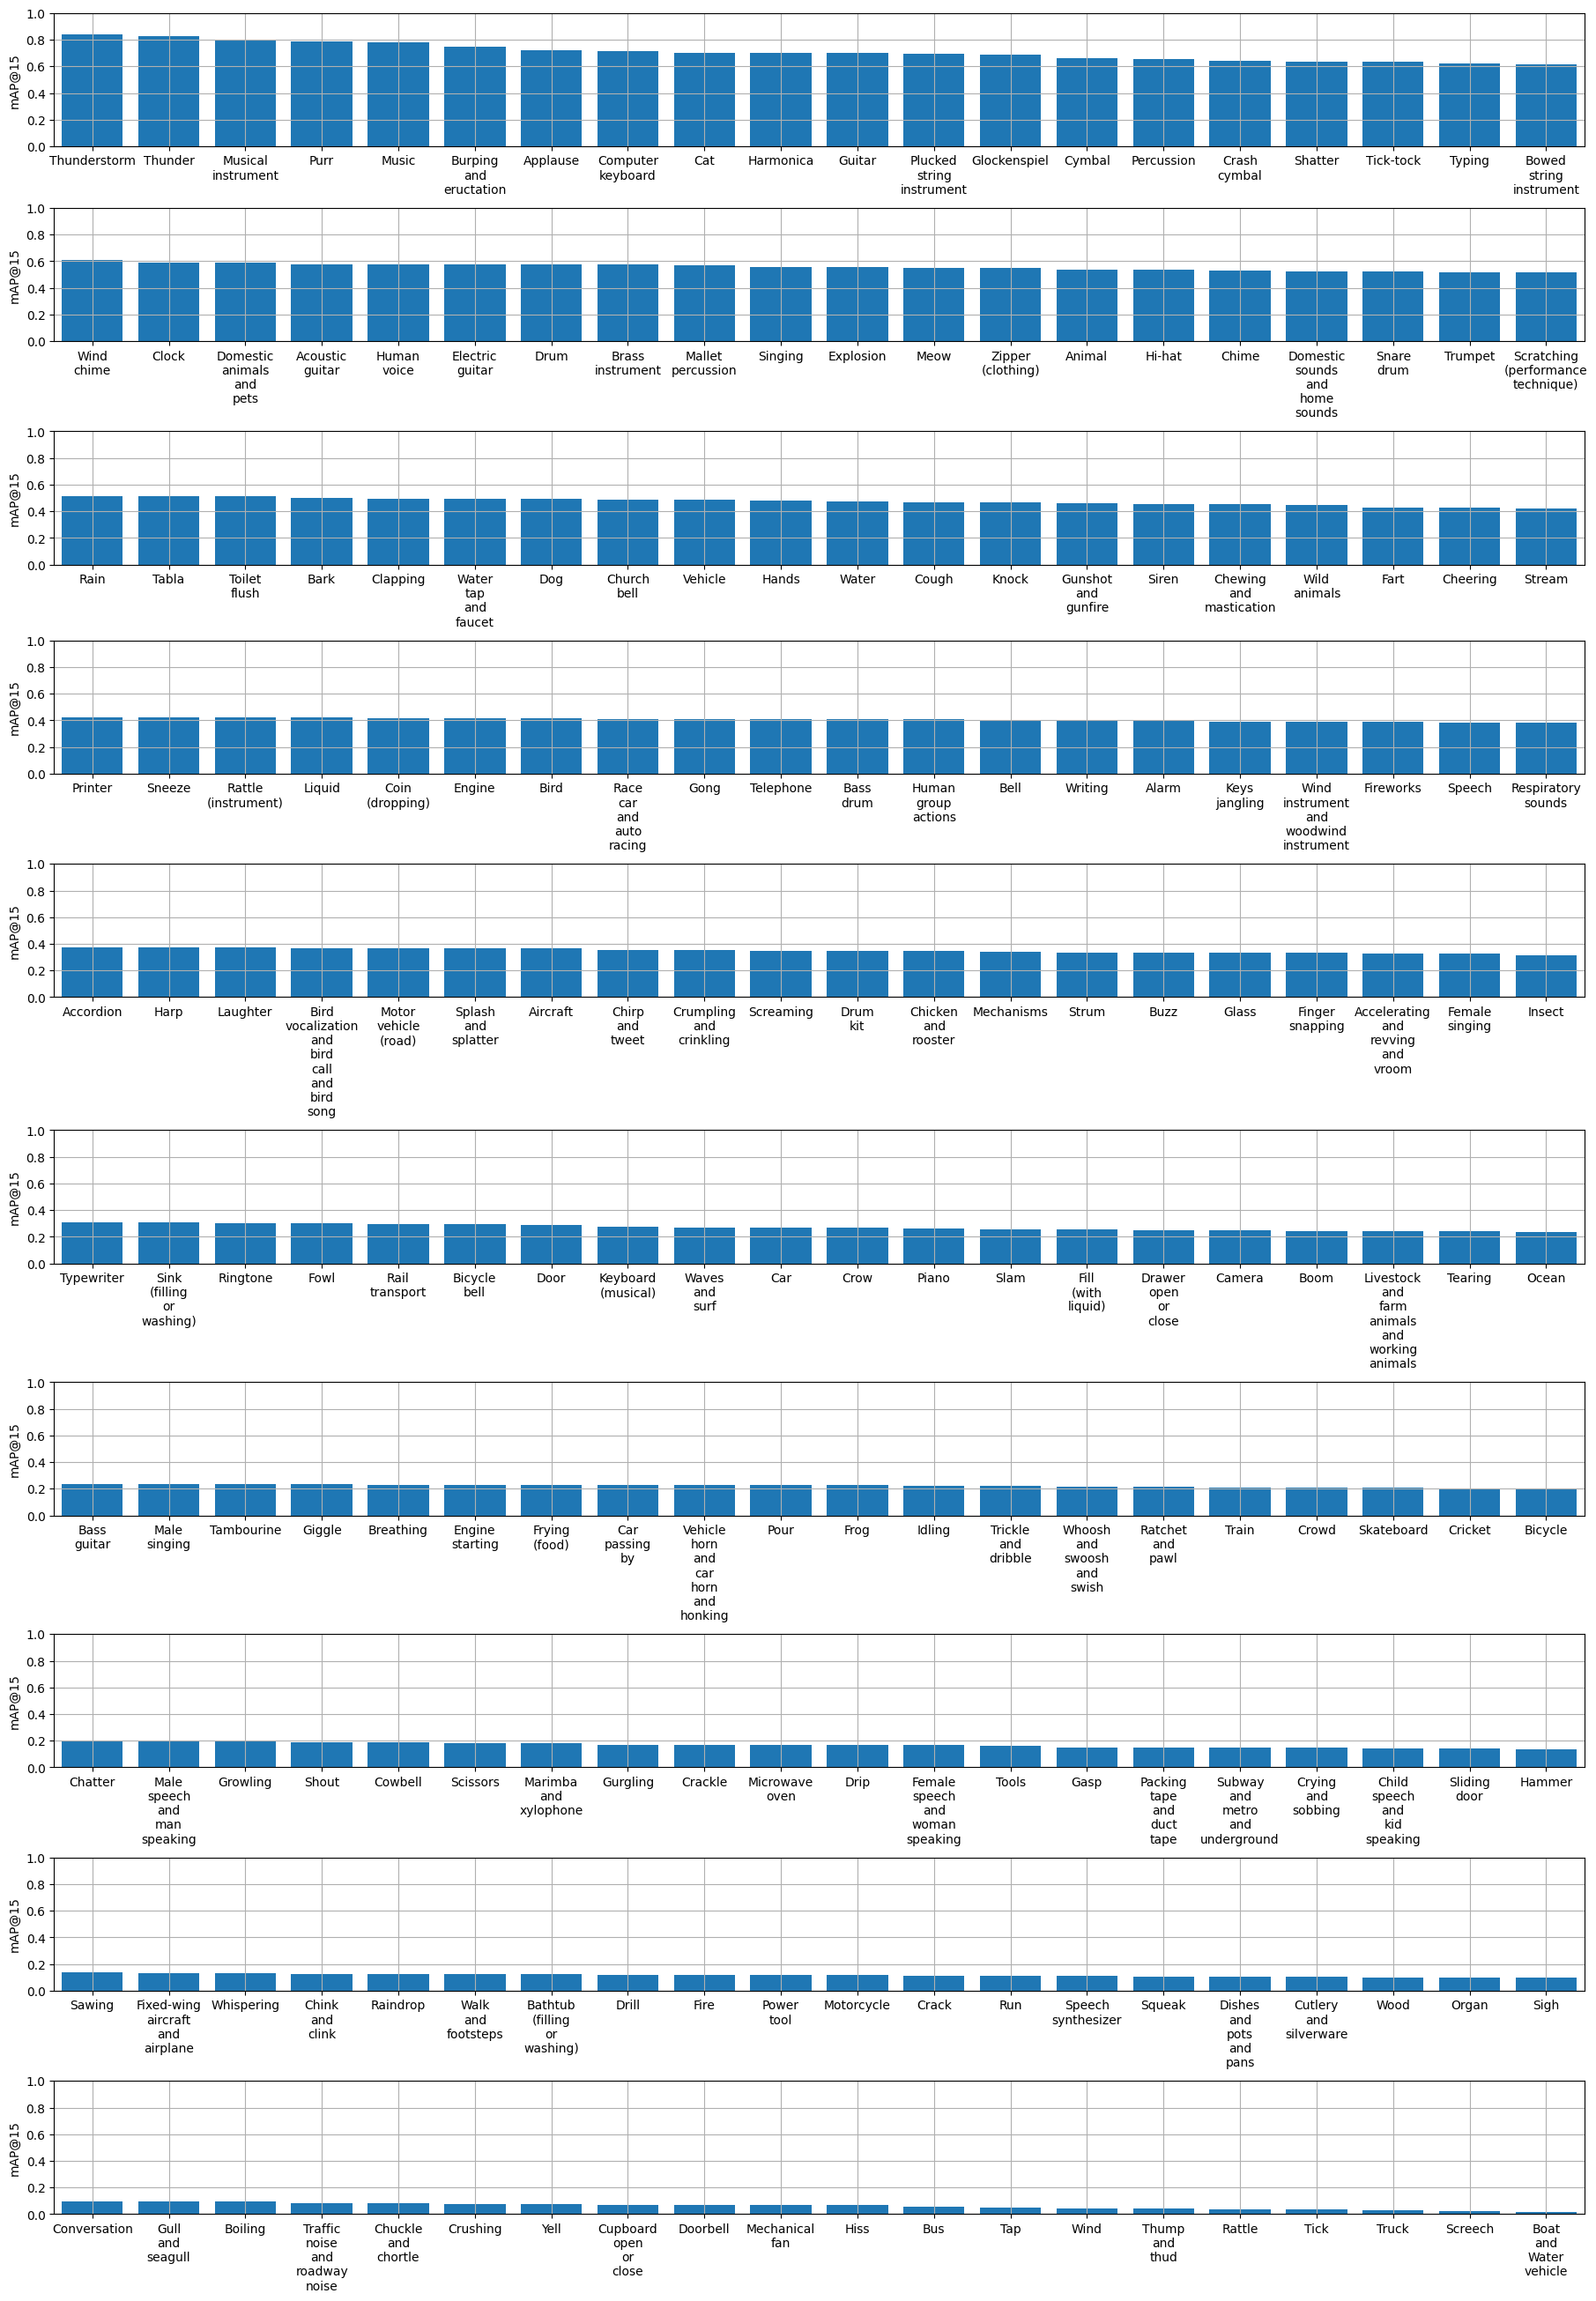

('CLAP_2022', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CLAP_2022/label_based_mAP@15.png


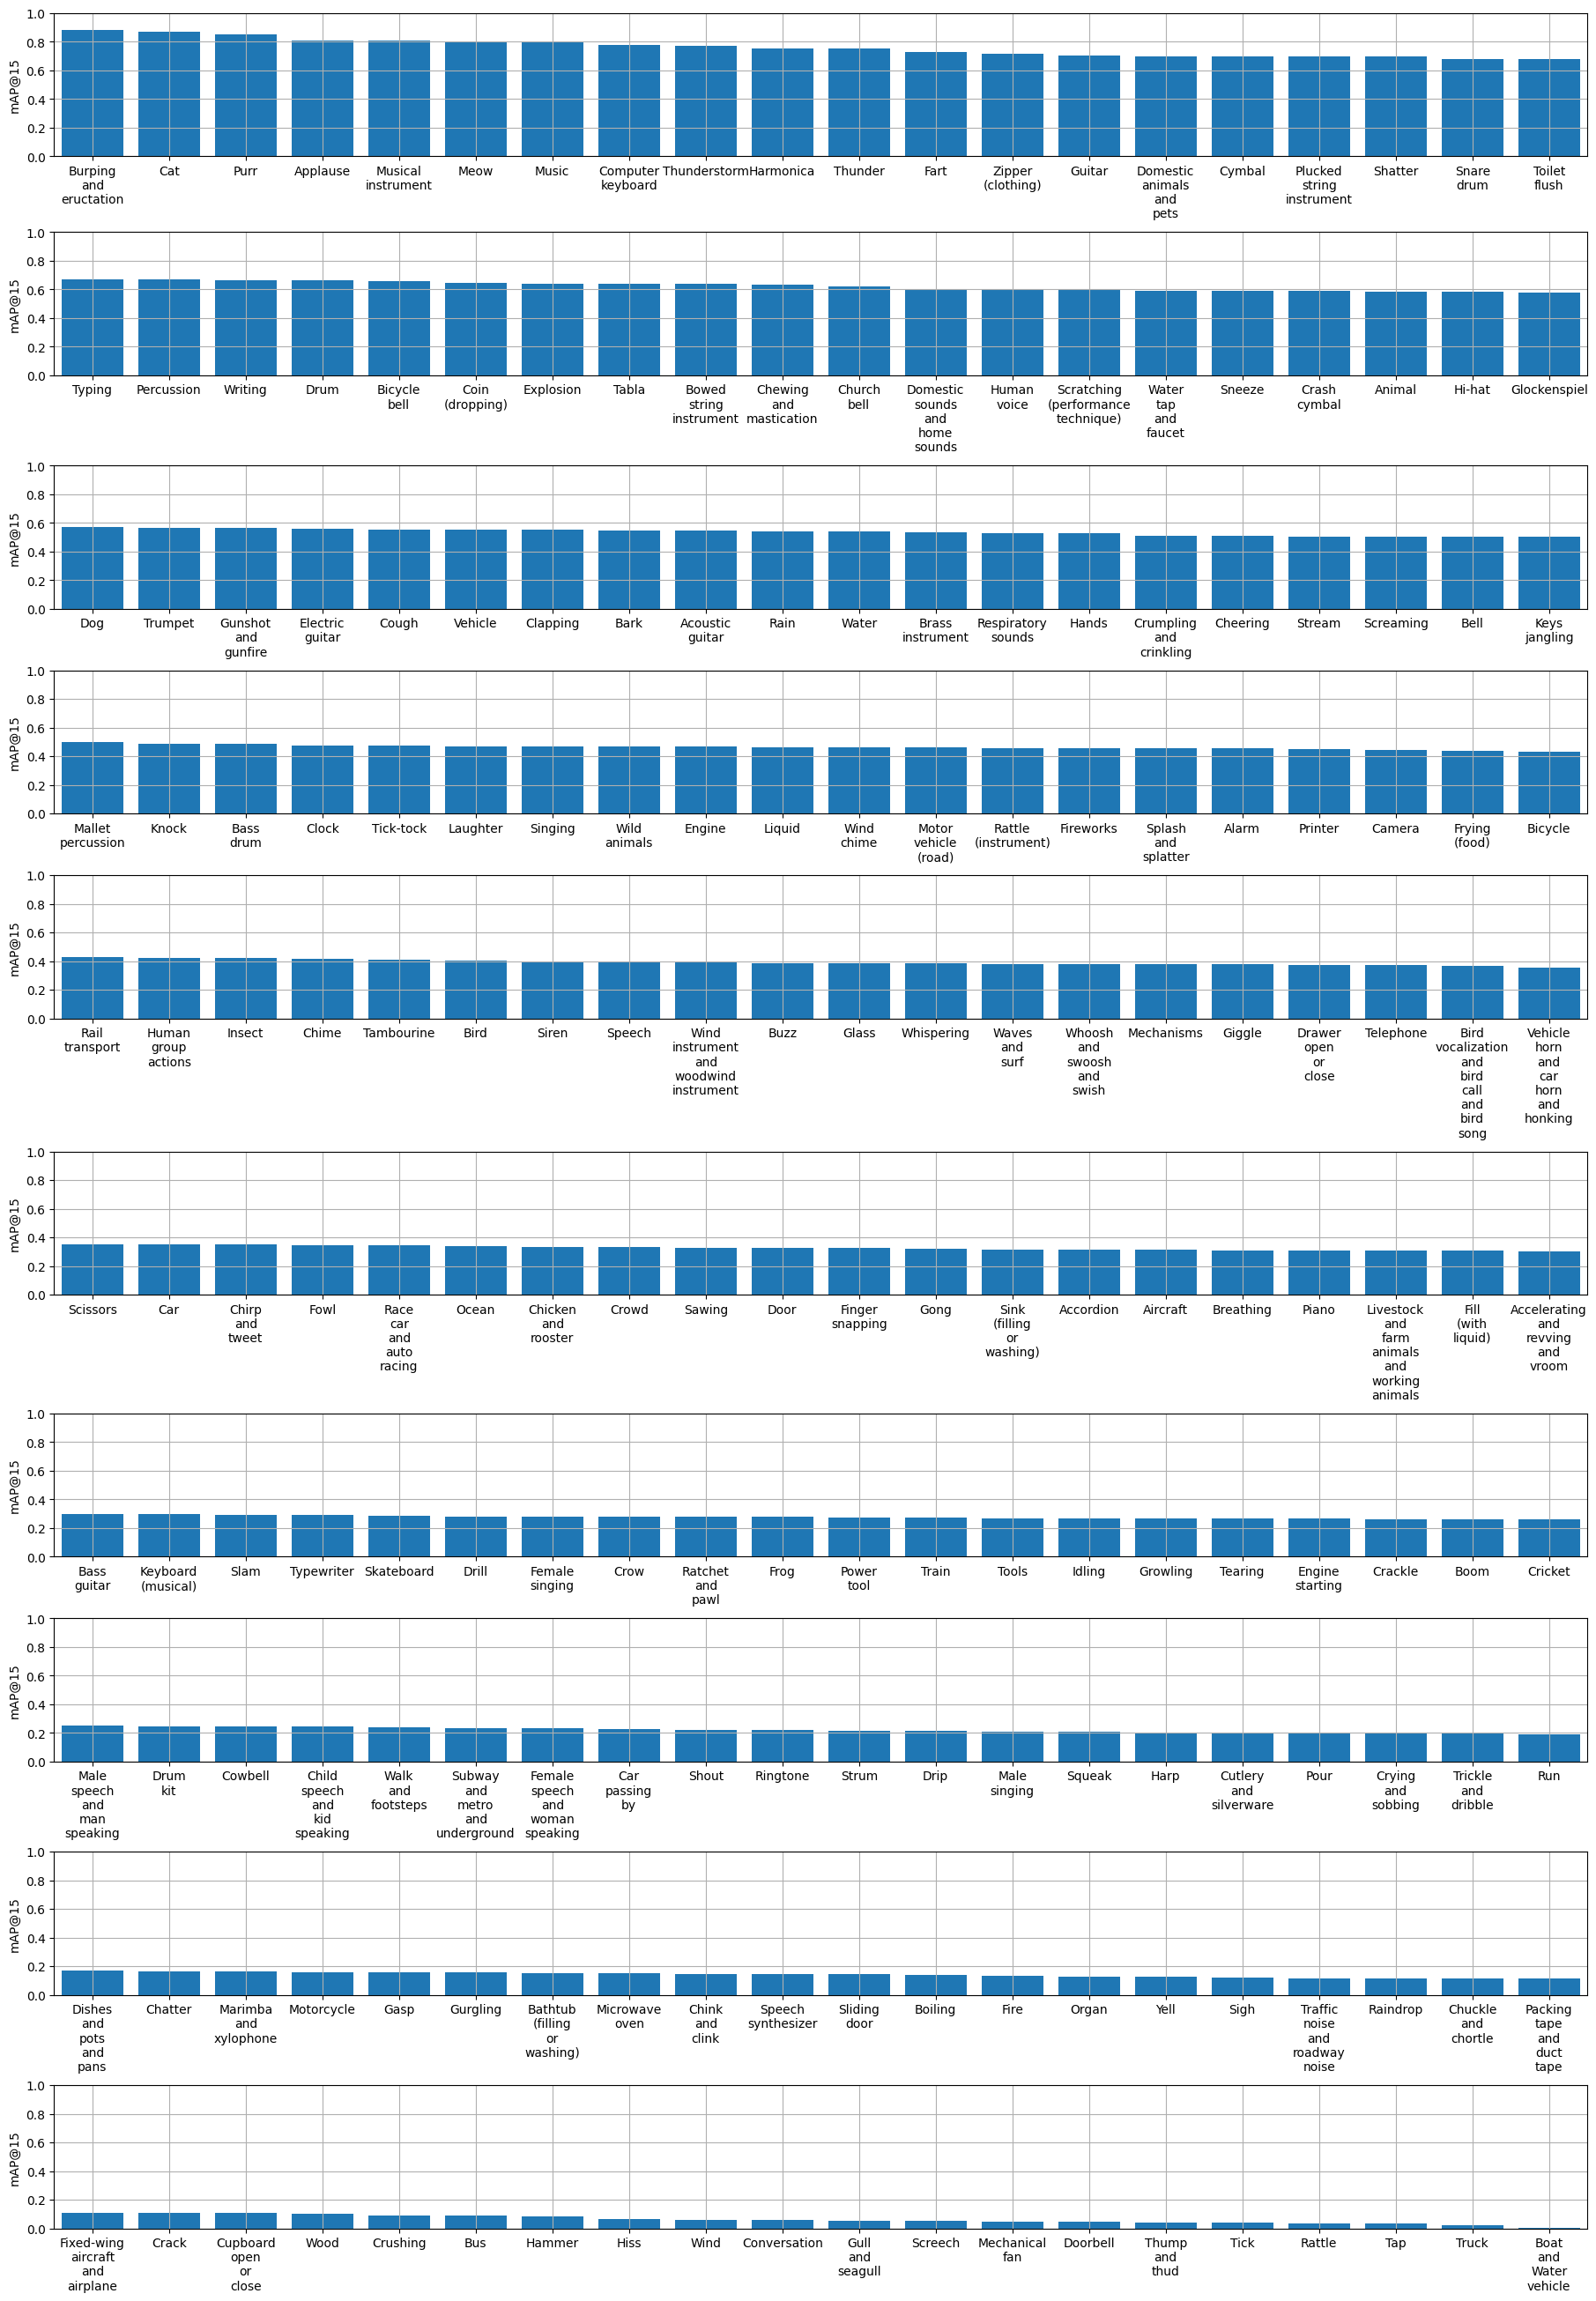

('clap-630k-fusion-best', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/clap-630k-fusion-best/label_based_mAP@15.png


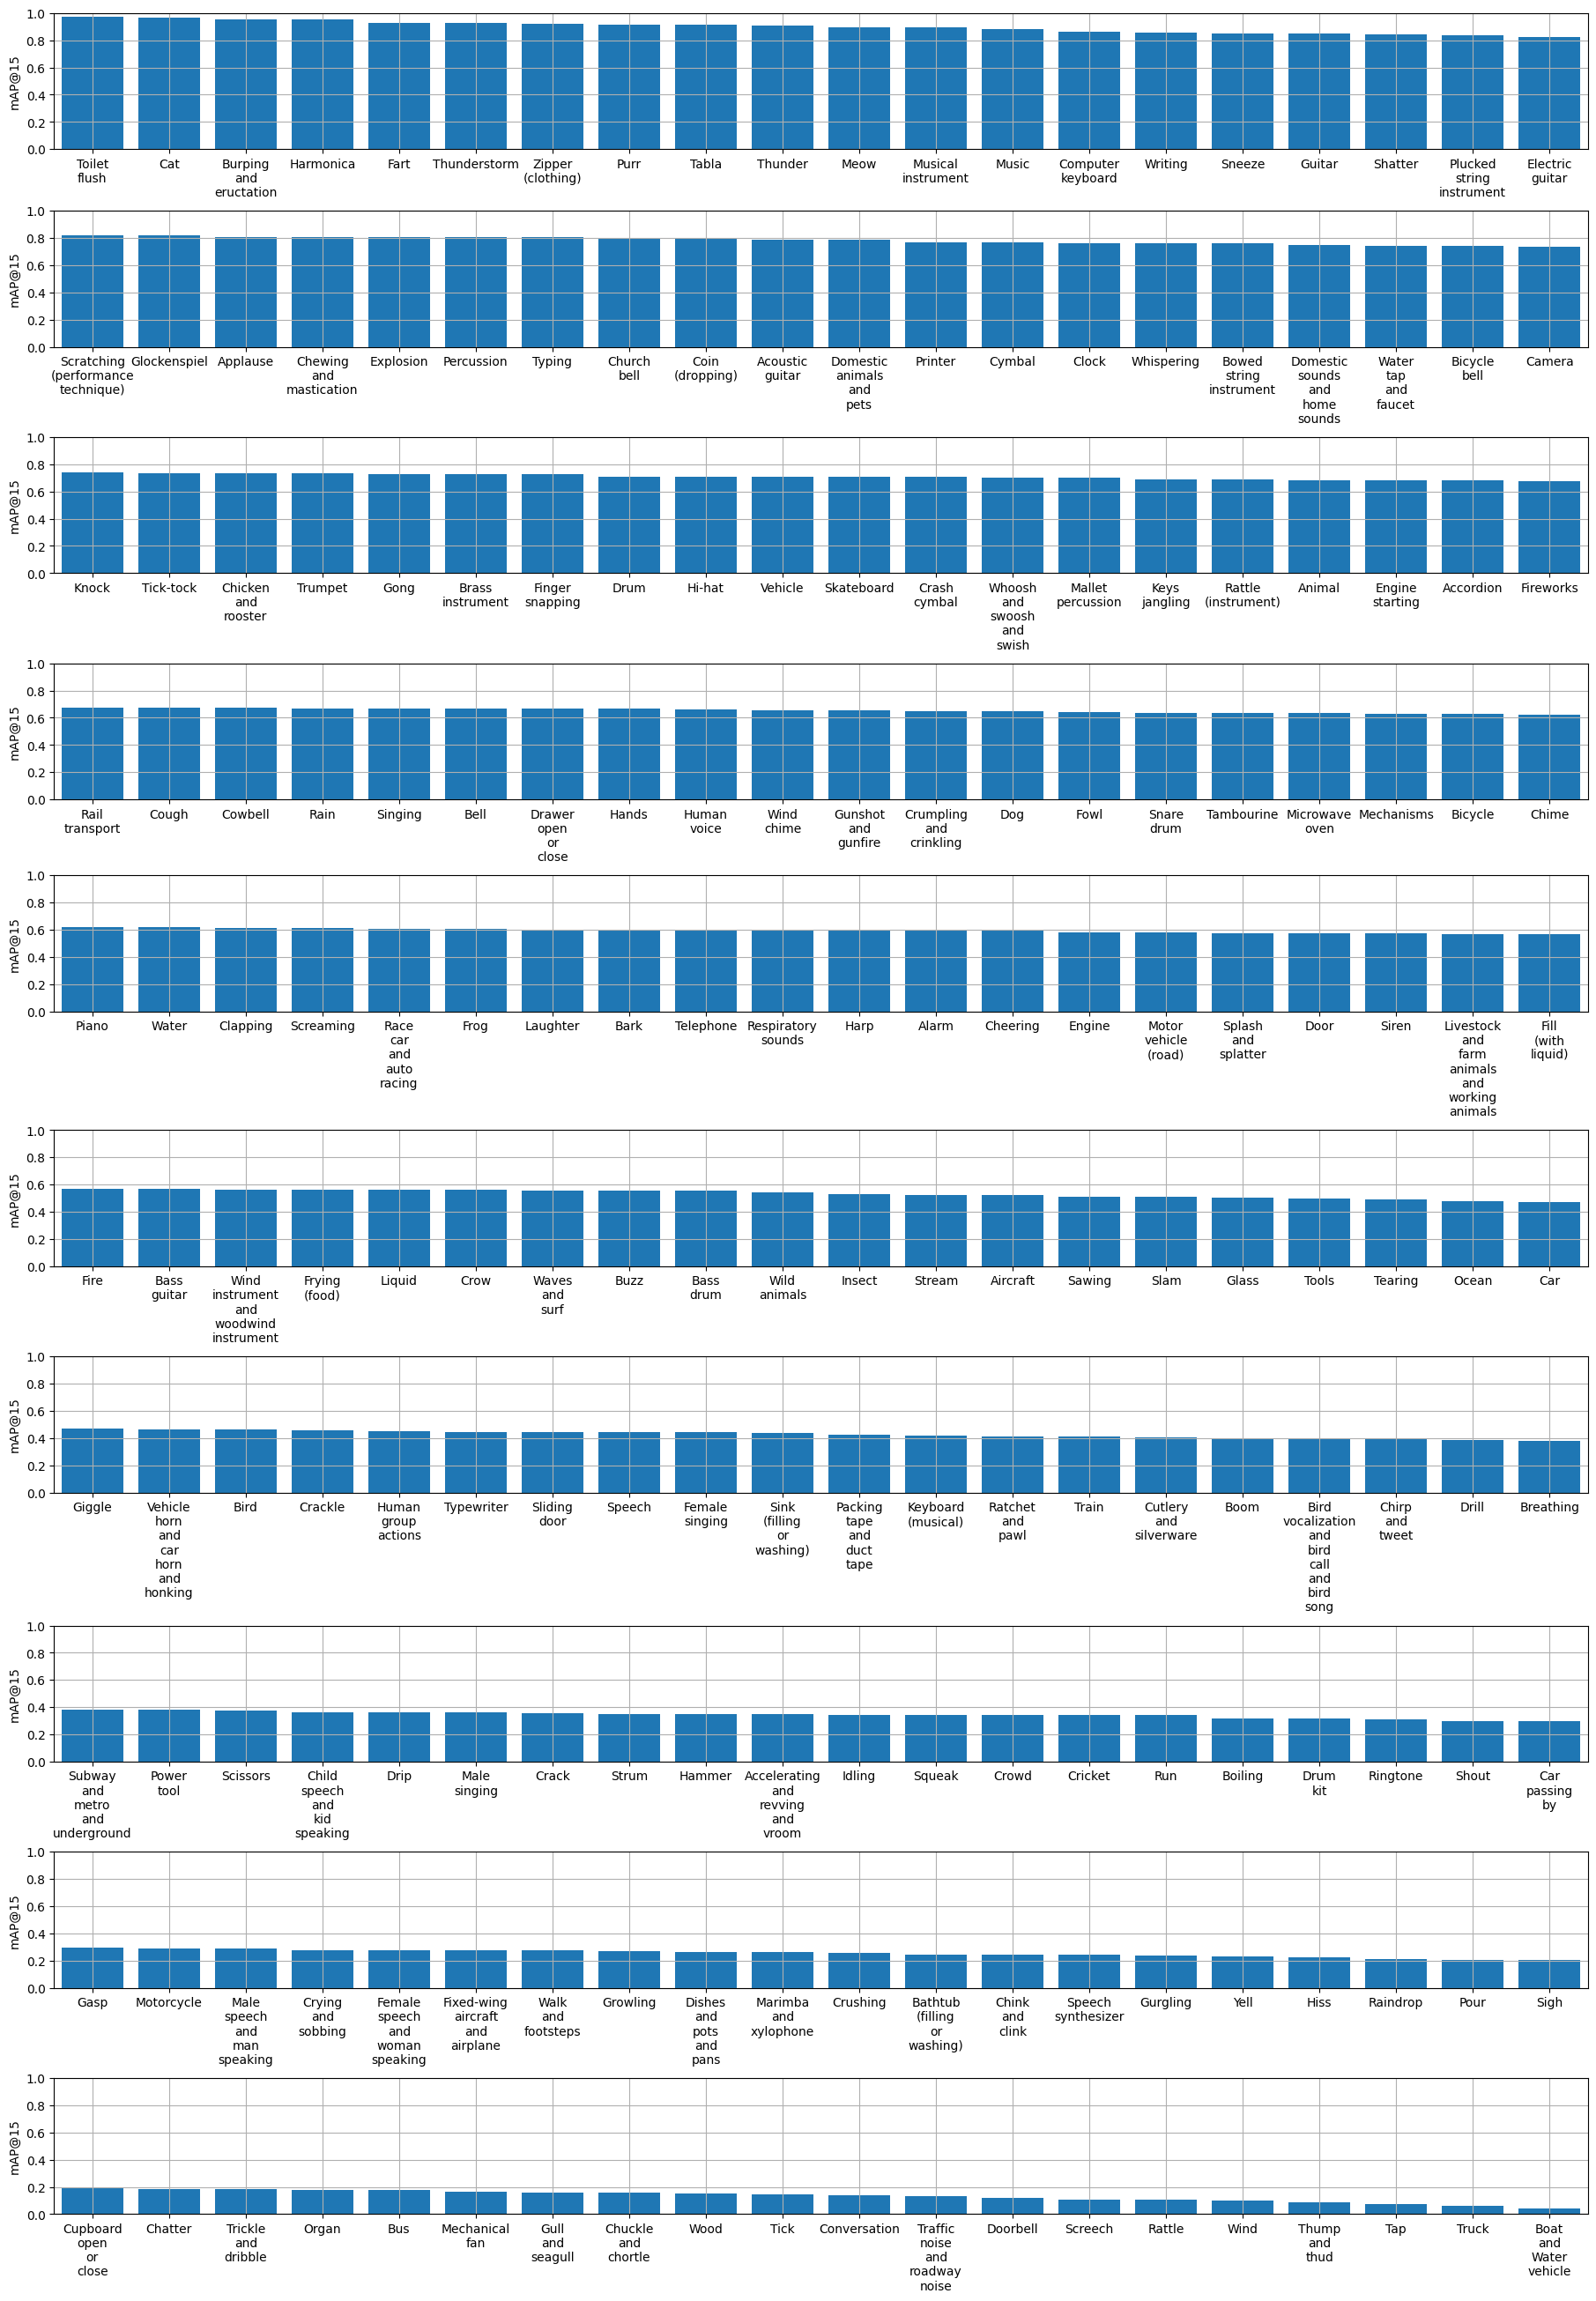

('CLAP_2023', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CLAP_2023/label_based_mAP@15.png


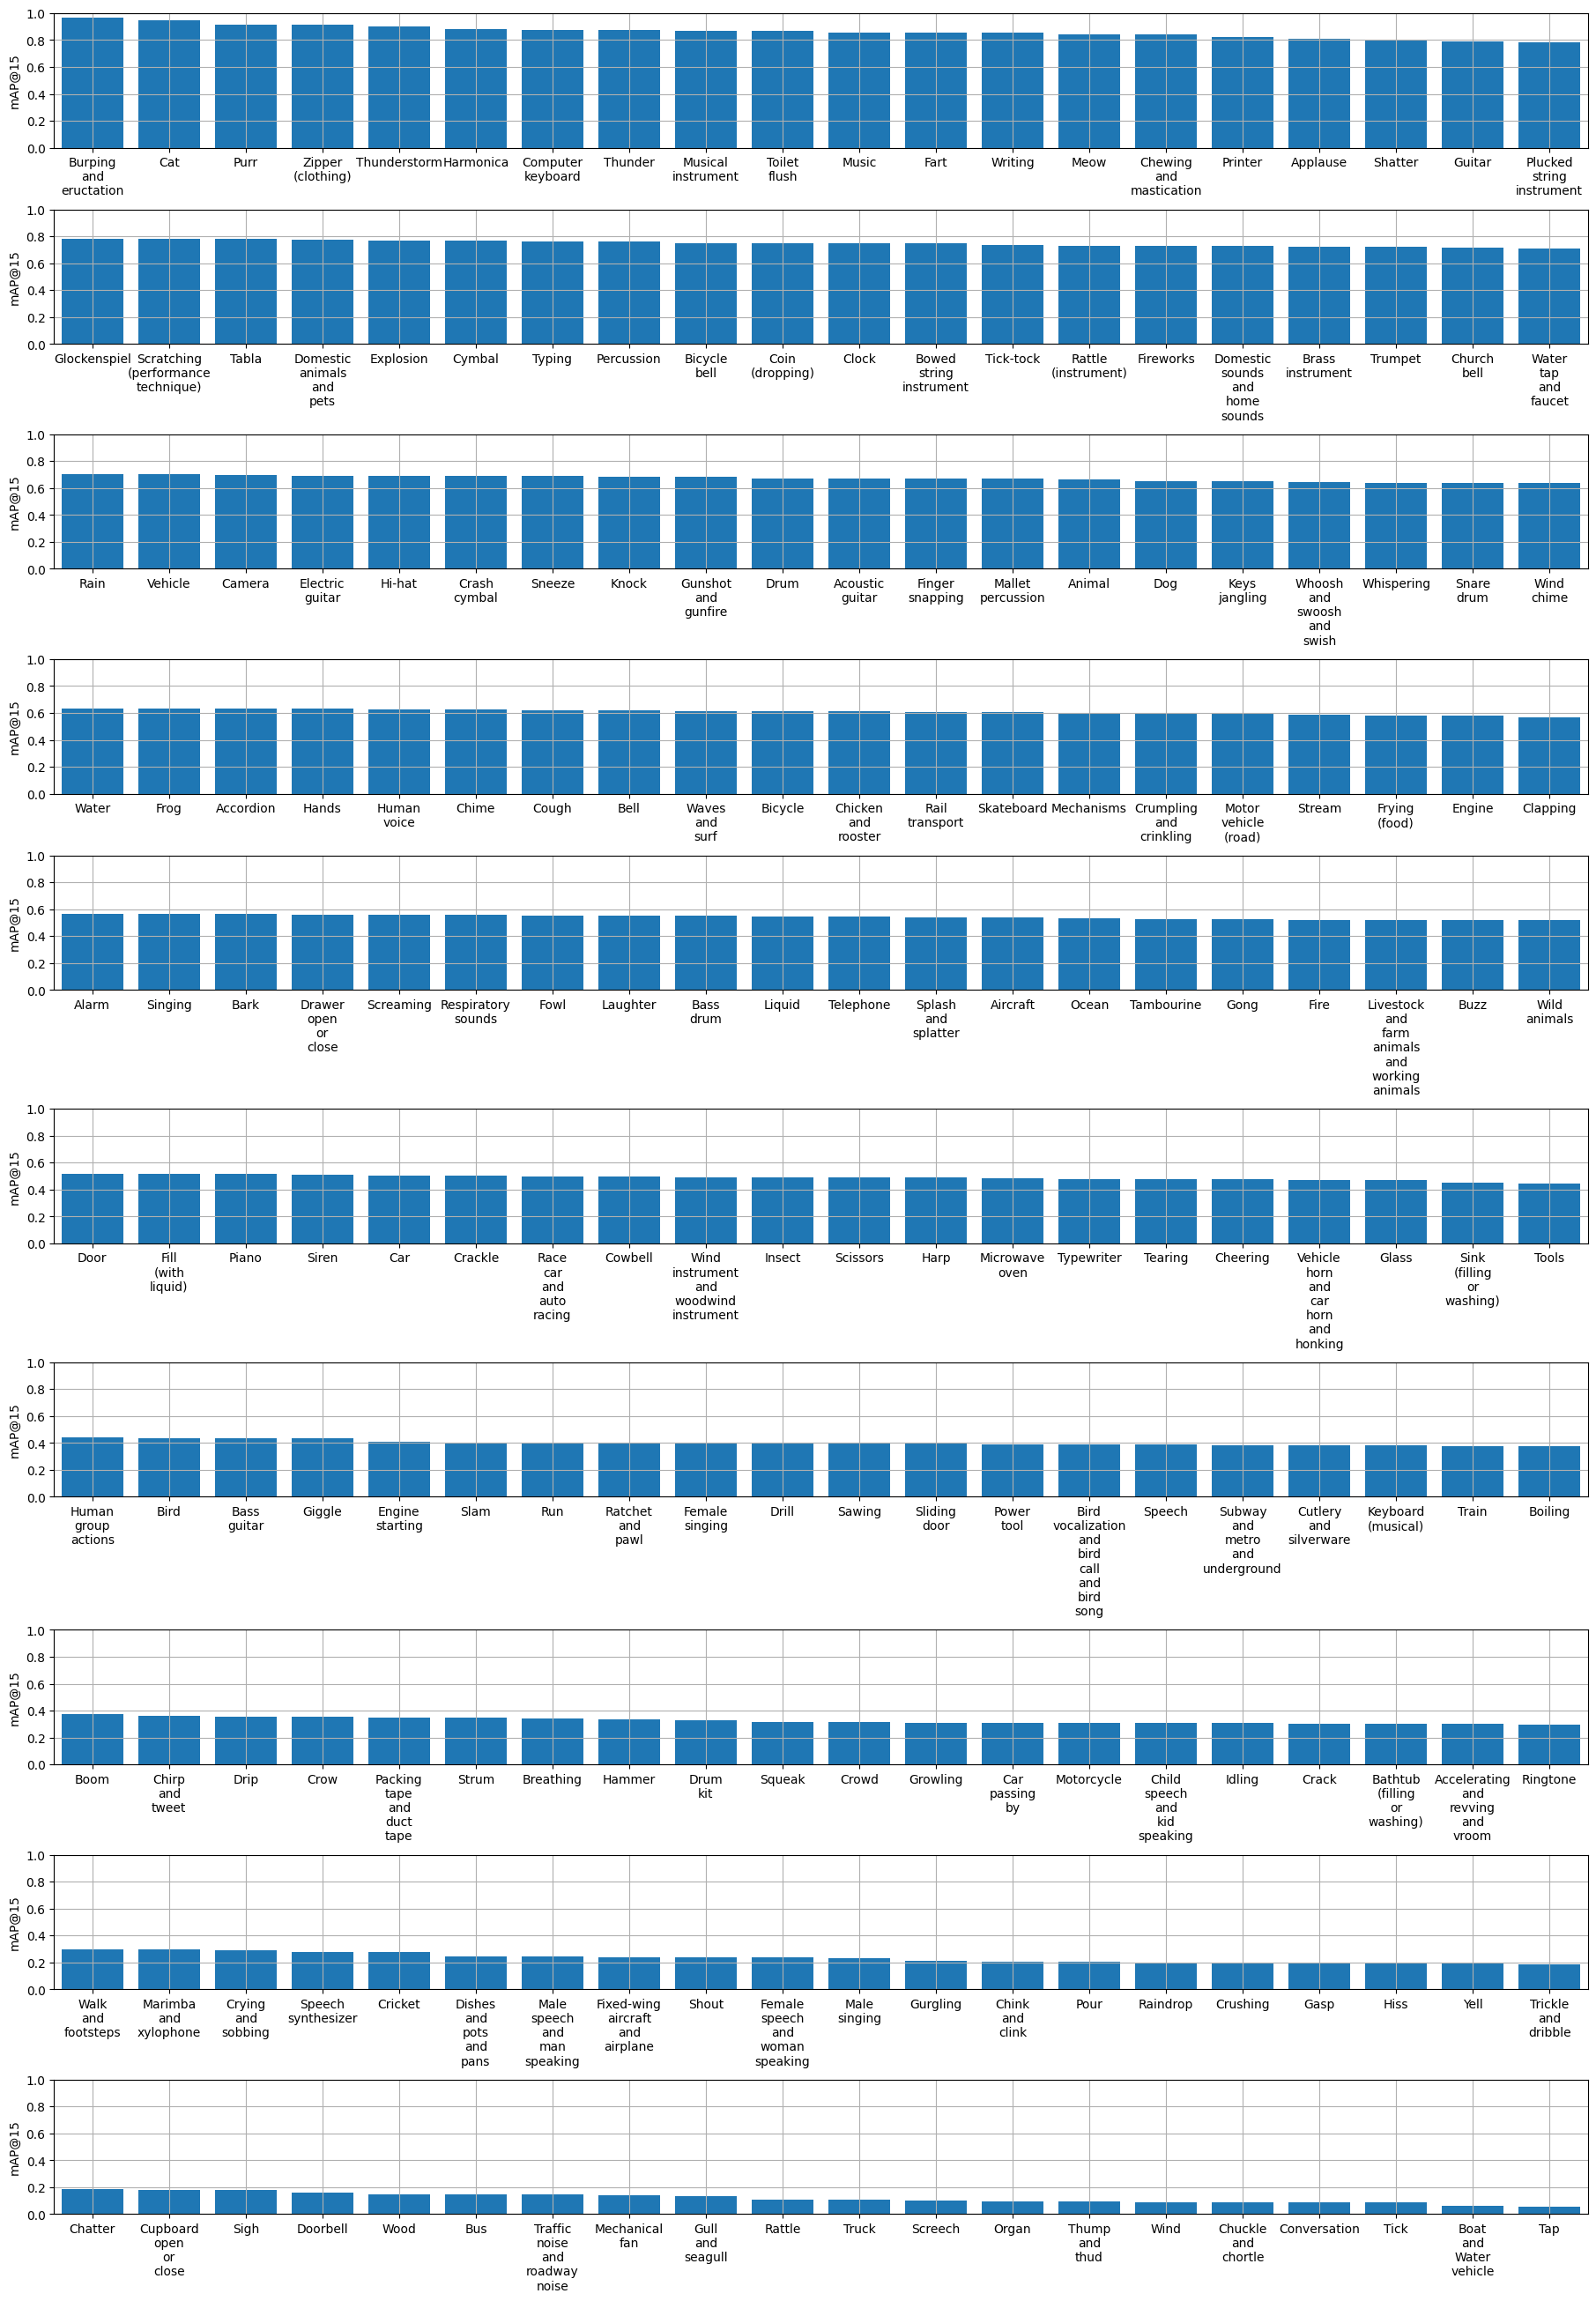

('Pengi', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/Pengi/label_based_mAP@15.png


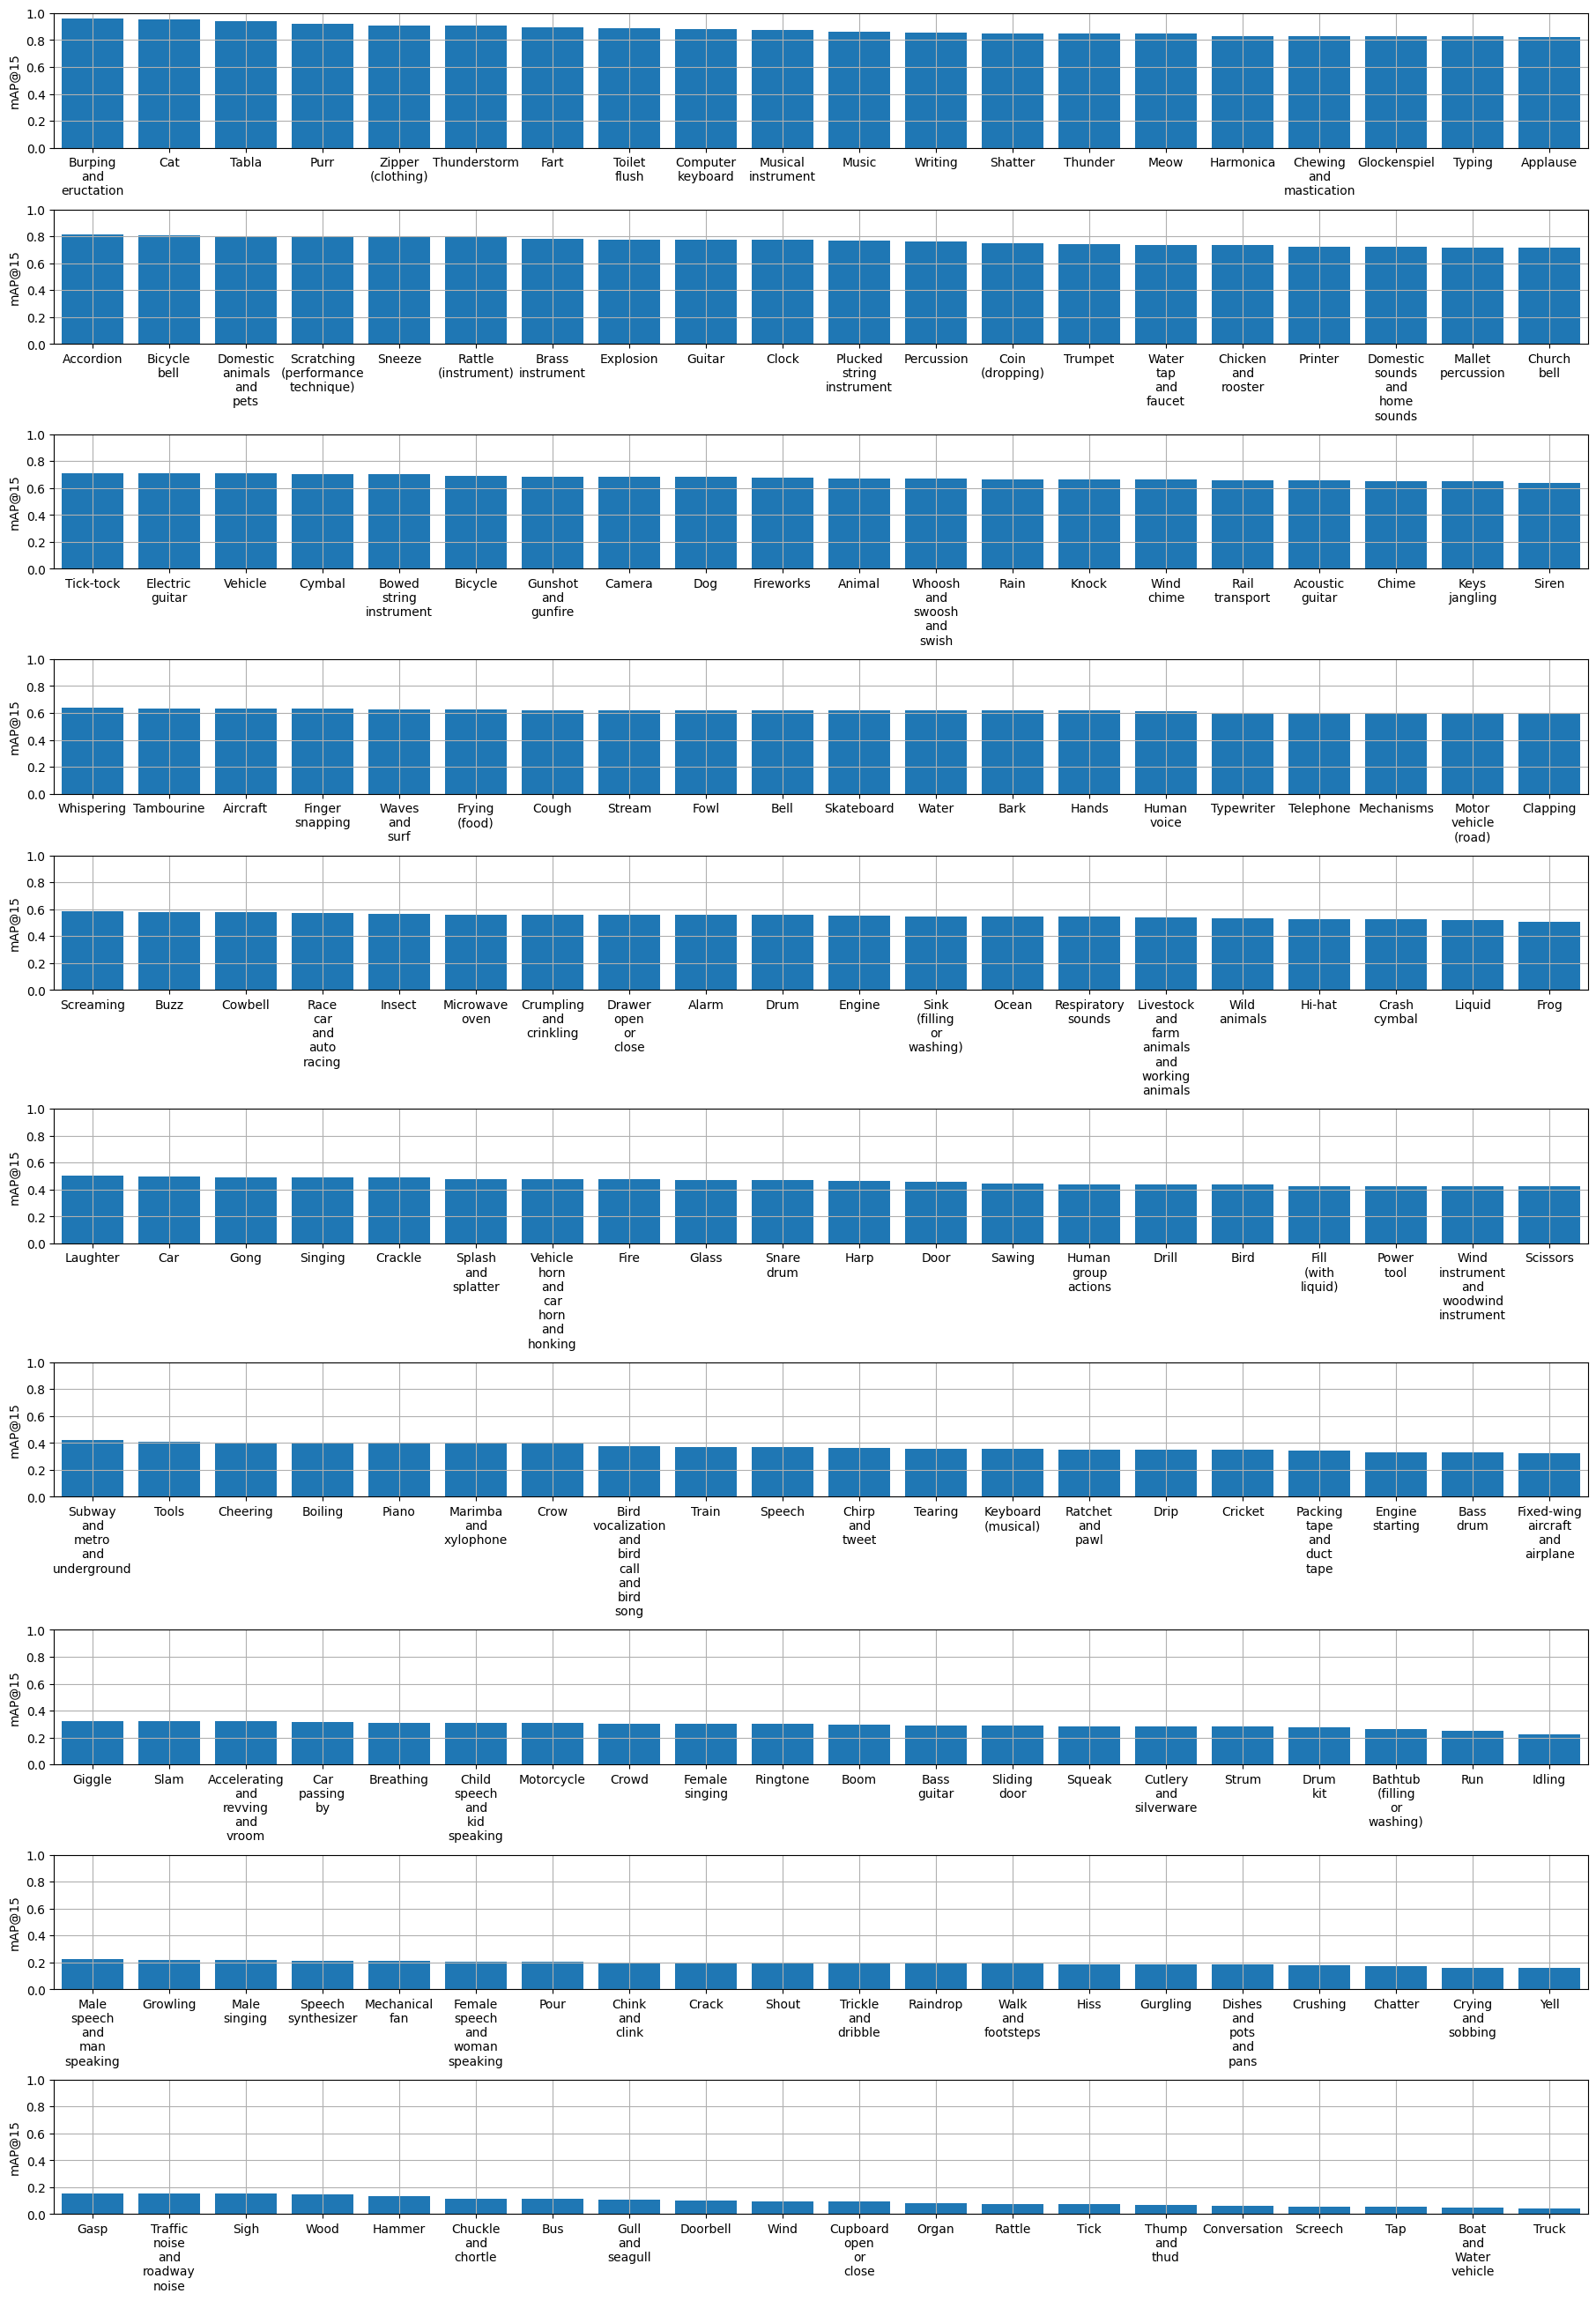

('AudioCLIP-Full-Training', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/AudioCLIP-Full-Training/label_based_mAP@15.png


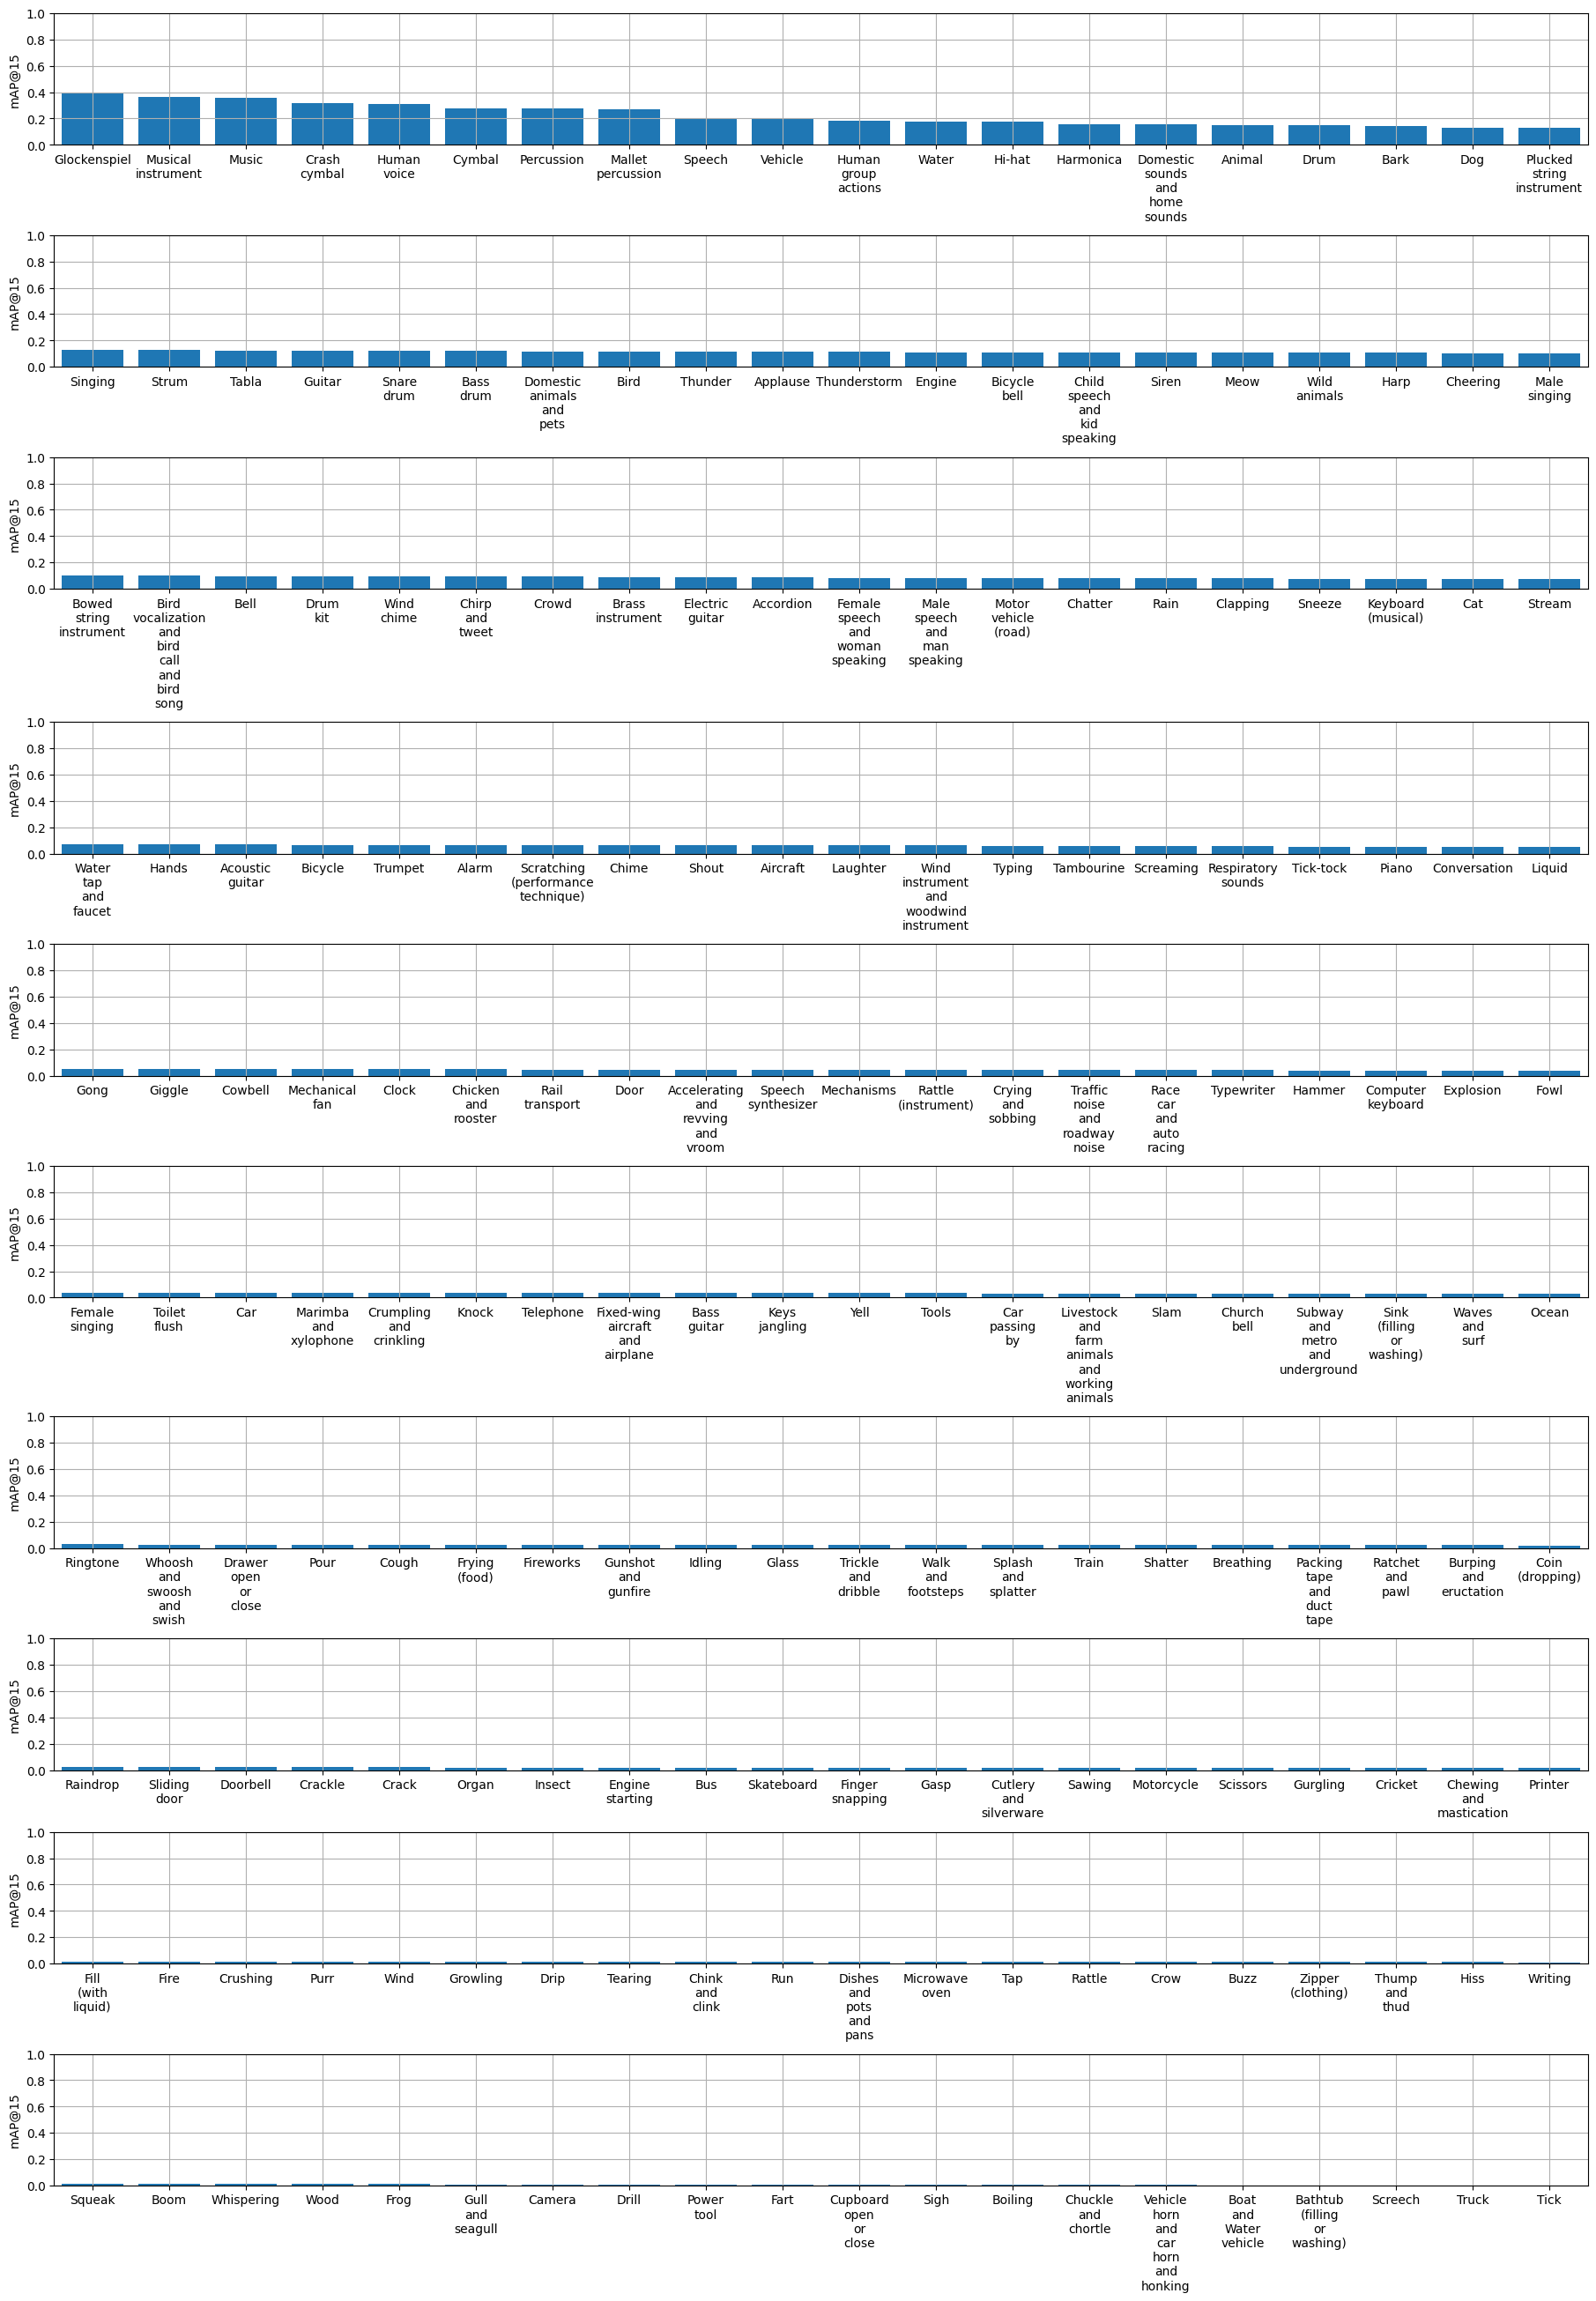

('Wav2CLIP', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/Wav2CLIP/label_based_mAP@15.png


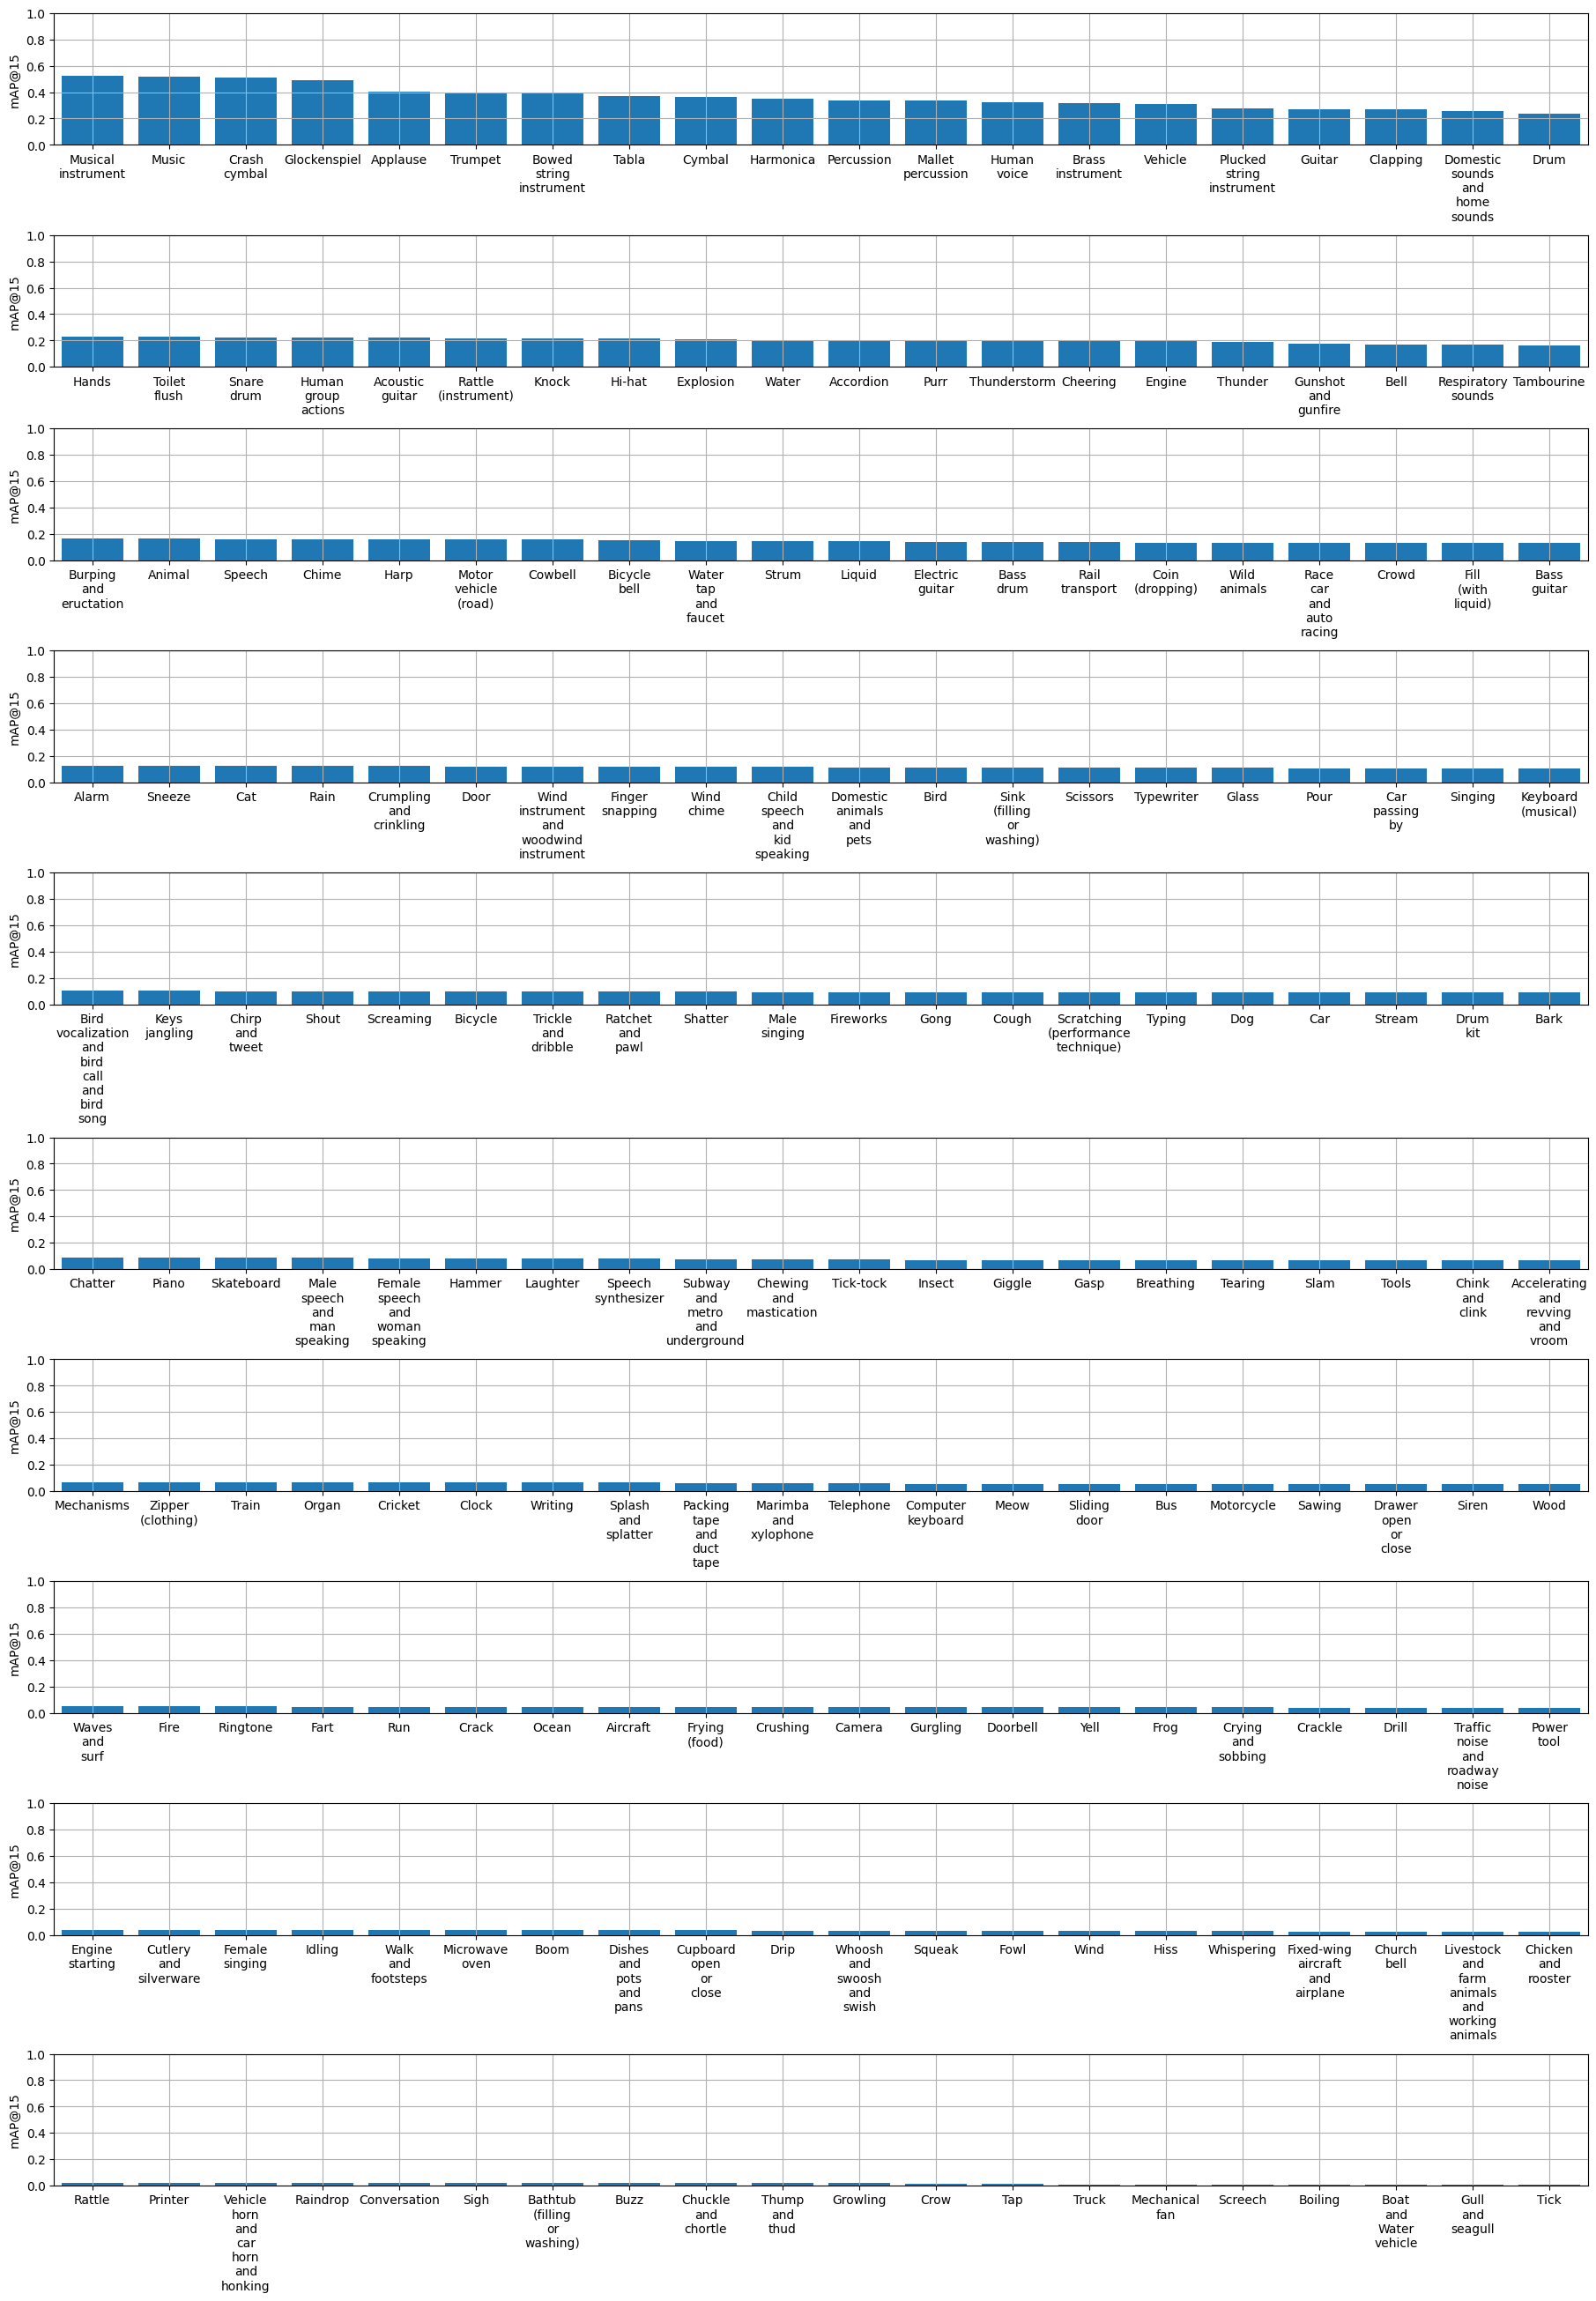

('imagebind_huge', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/imagebind_huge/label_based_mAP@15.png


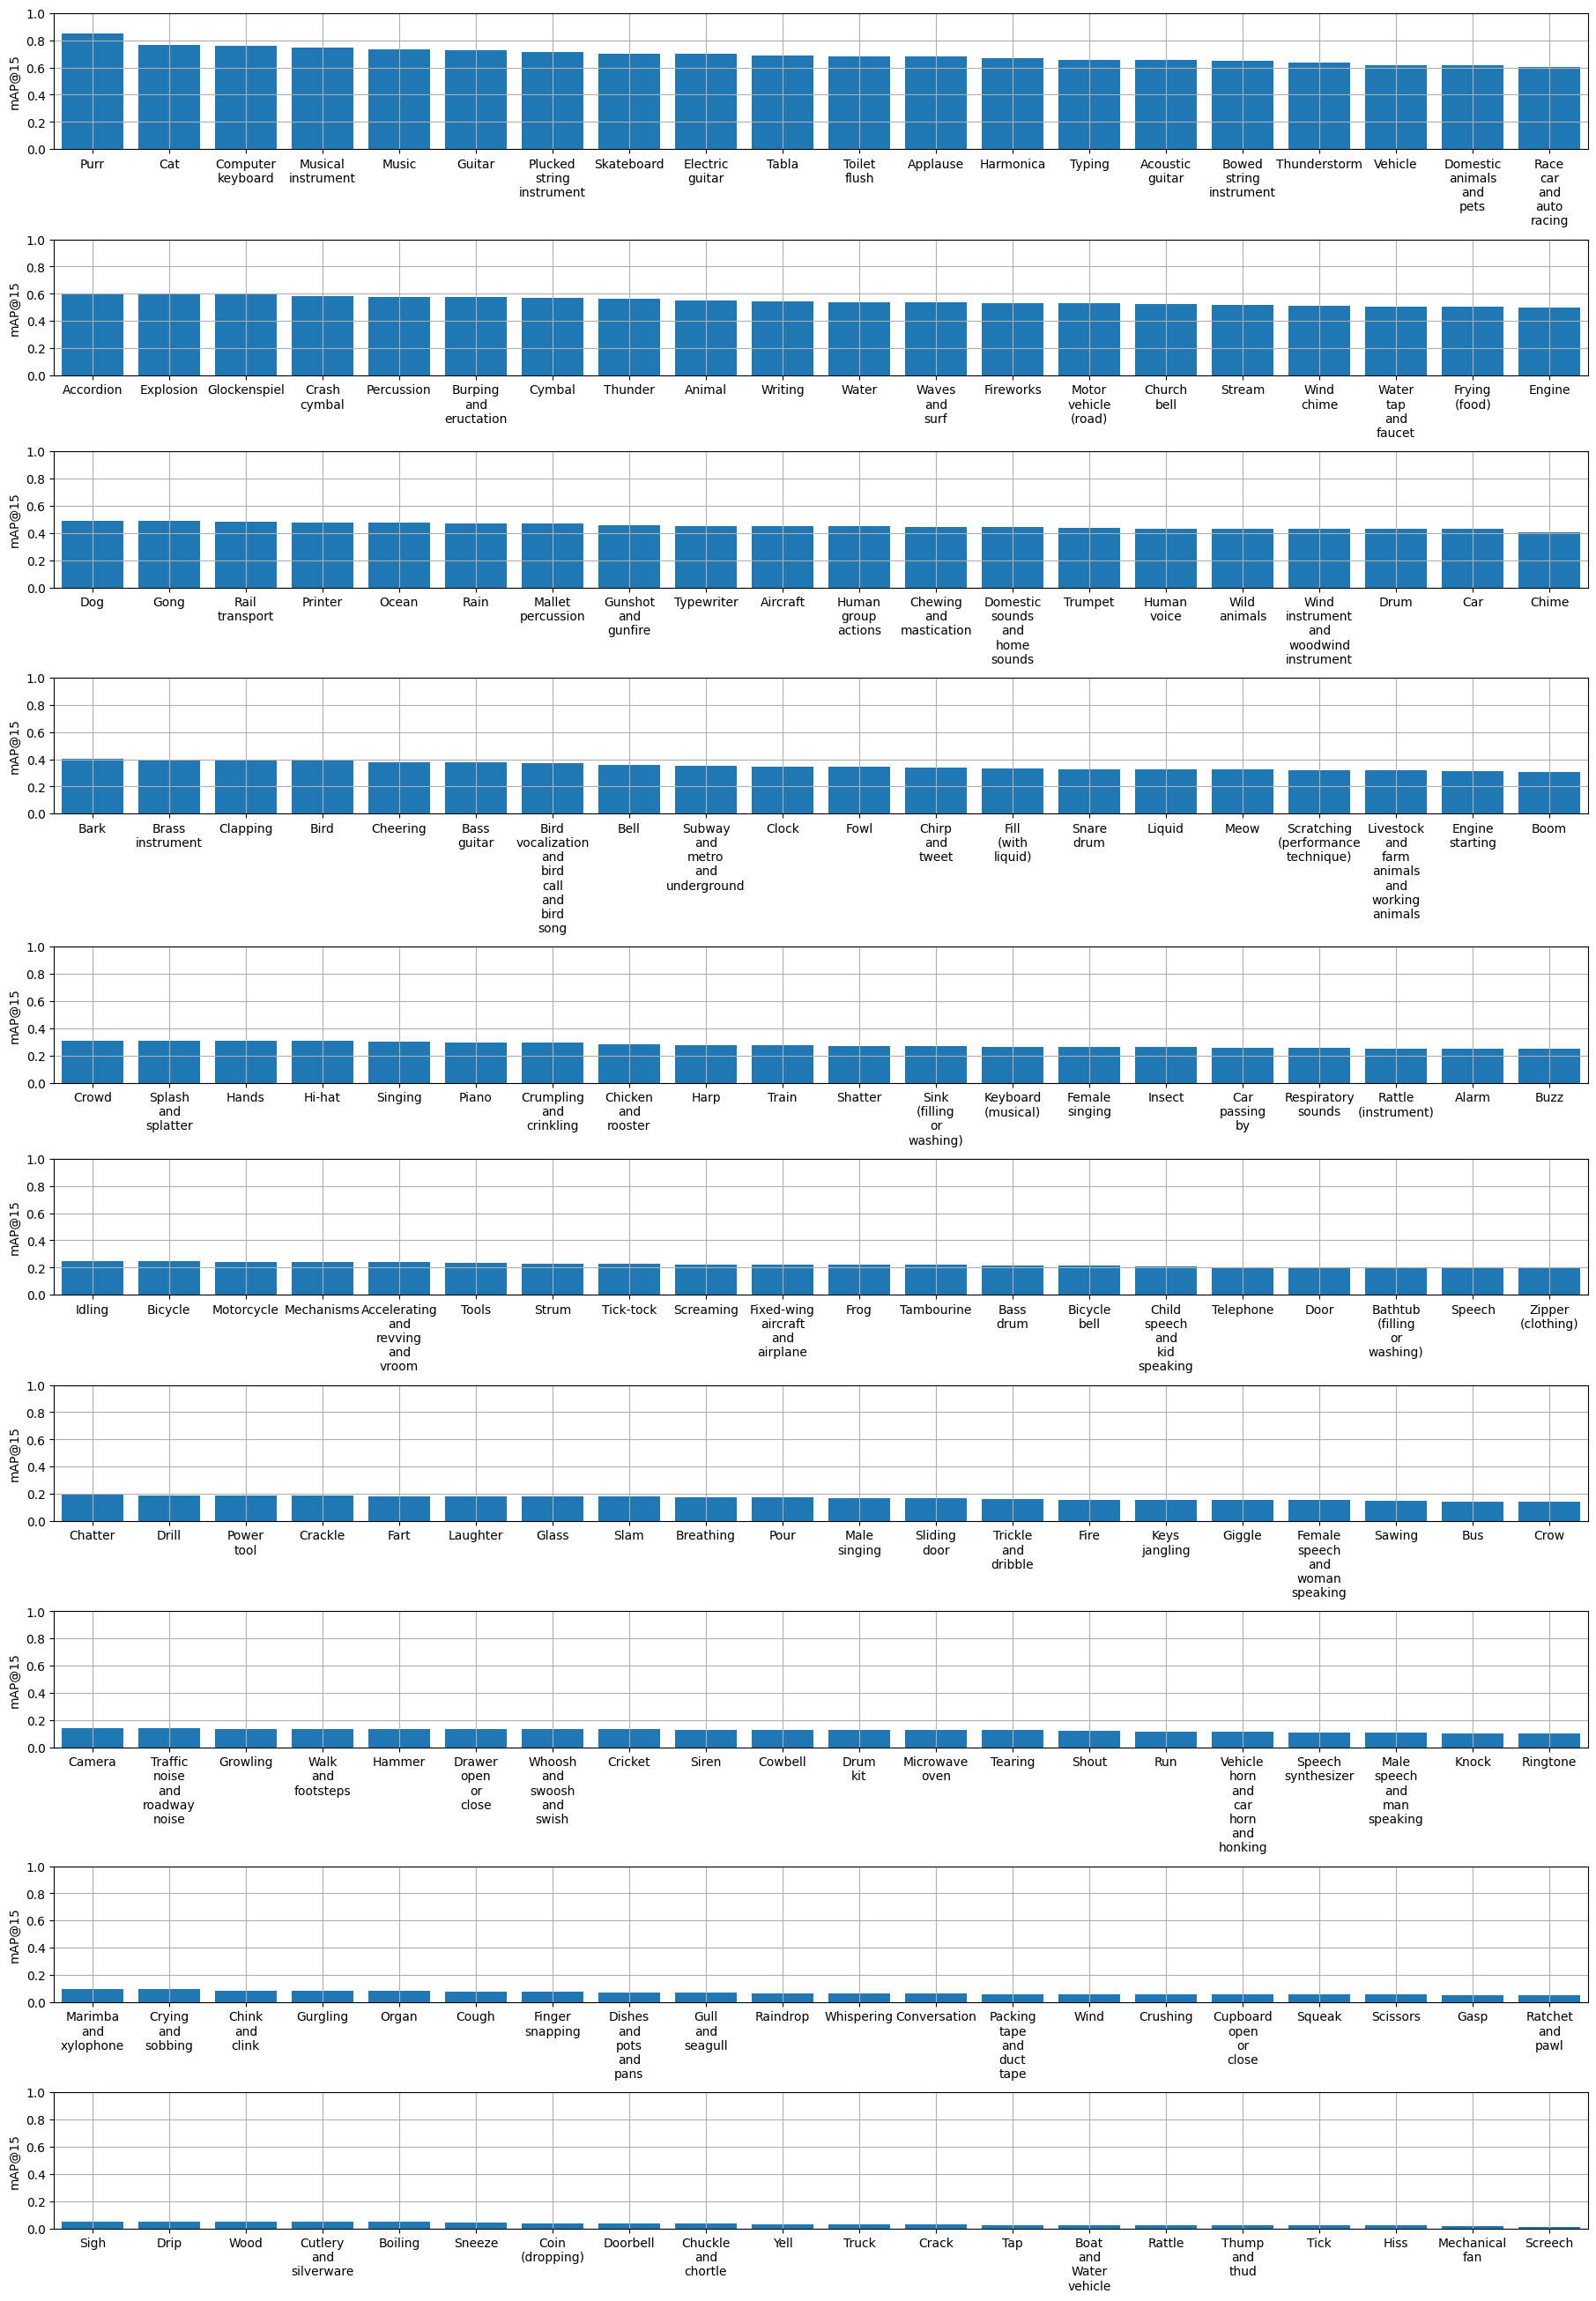

In [11]:
save_fig = True
for model in models:
    print(model)
    plot_map_at_15_for_all_labels(model, use_fig_name=False, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

### Total-composite for All variations

('fs-essentia-extractor_legacy', 'PCA_100', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fs-essentia-extractor_legacy/macro_map@15-comparisons.pdf


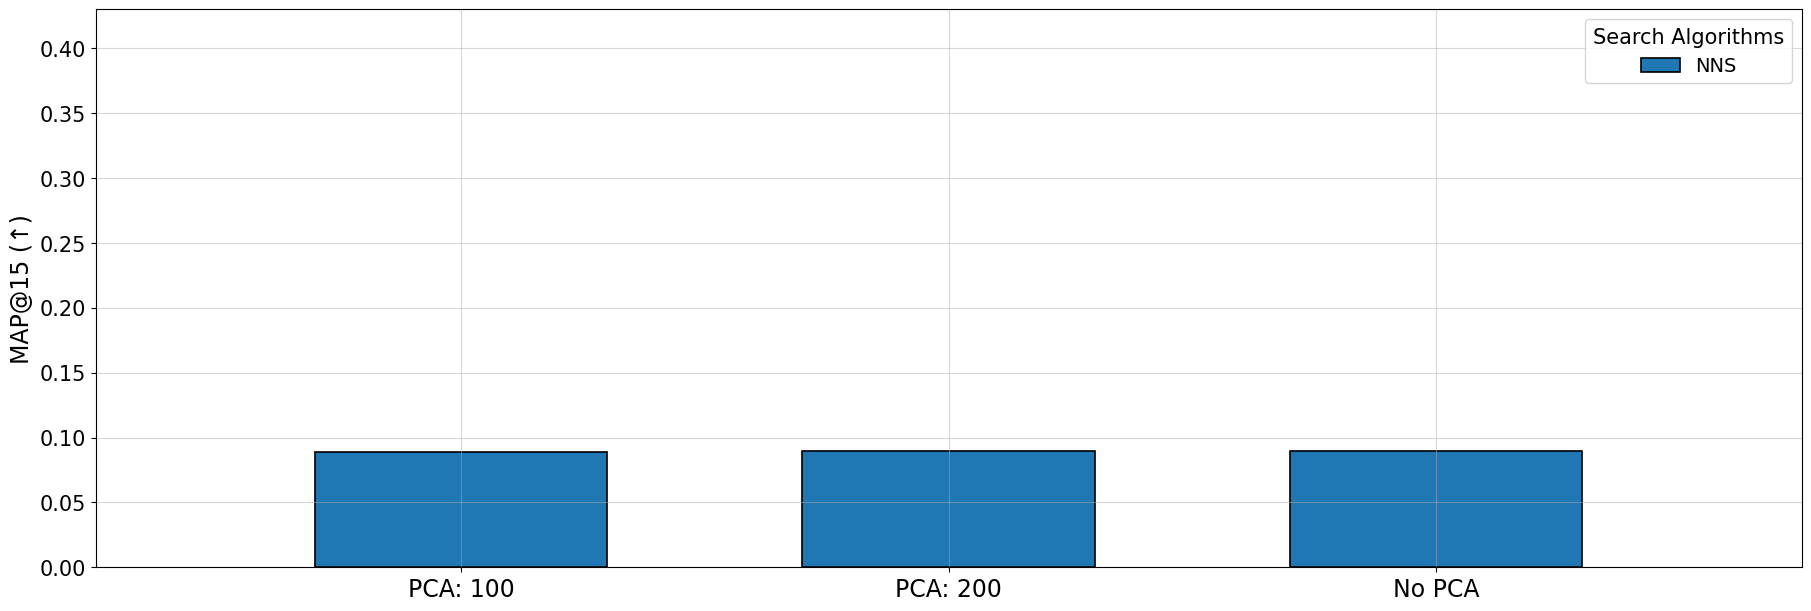

('audioset-vggish-3', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-vggish-3/macro_map@15-comparisons.pdf


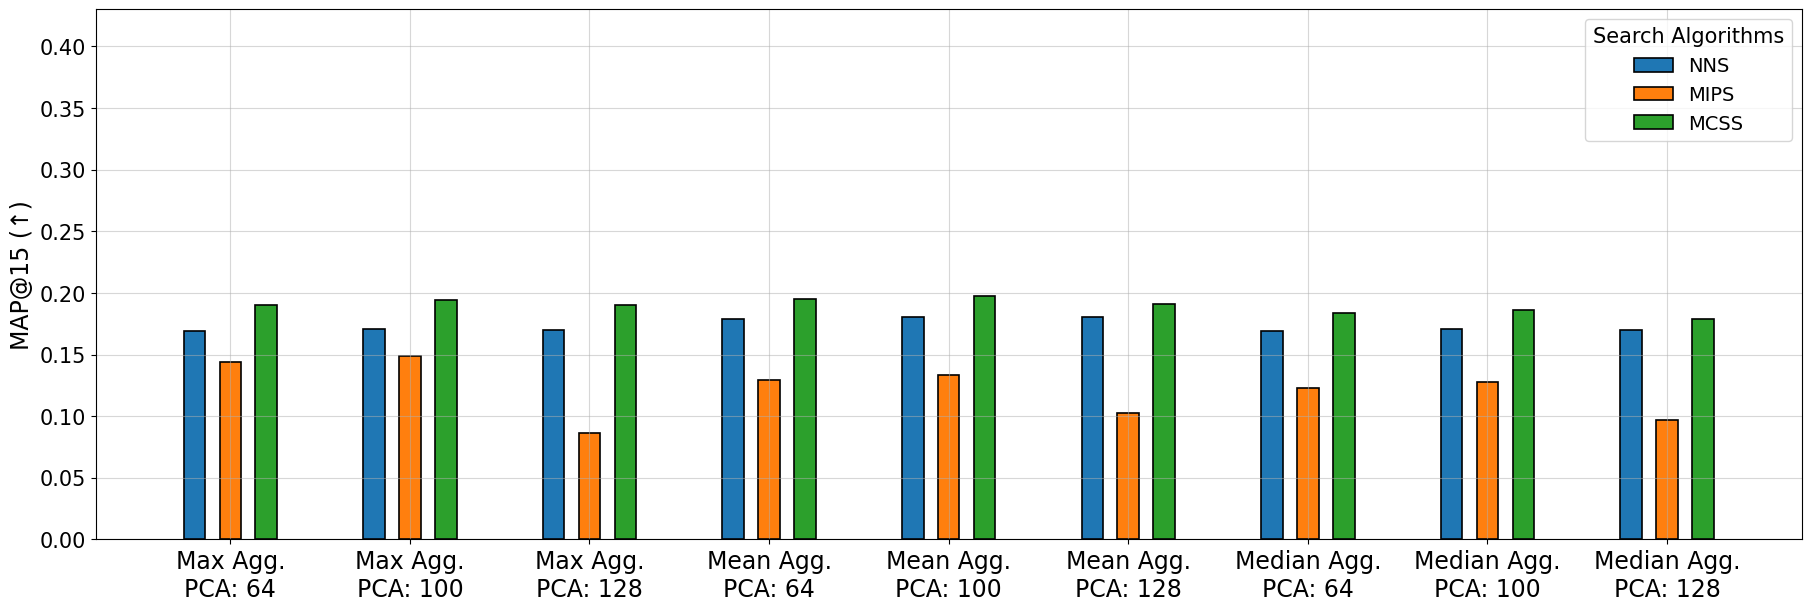

('audioset-yamnet-1', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-yamnet-1/macro_map@15-comparisons.pdf


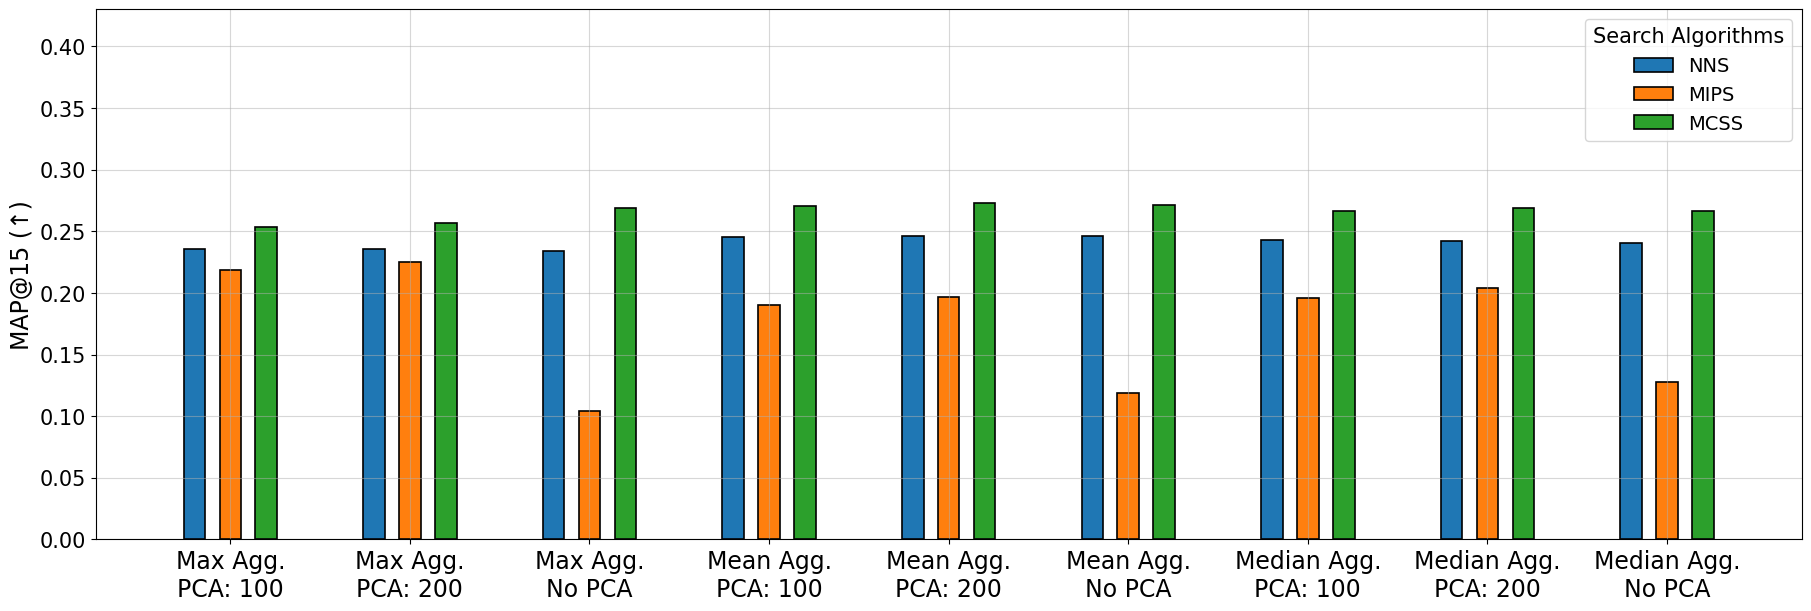

('fsd-sinet-vgg42-tlpf-1', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fsd-sinet-vgg42-tlpf-1/macro_map@15-comparisons.pdf


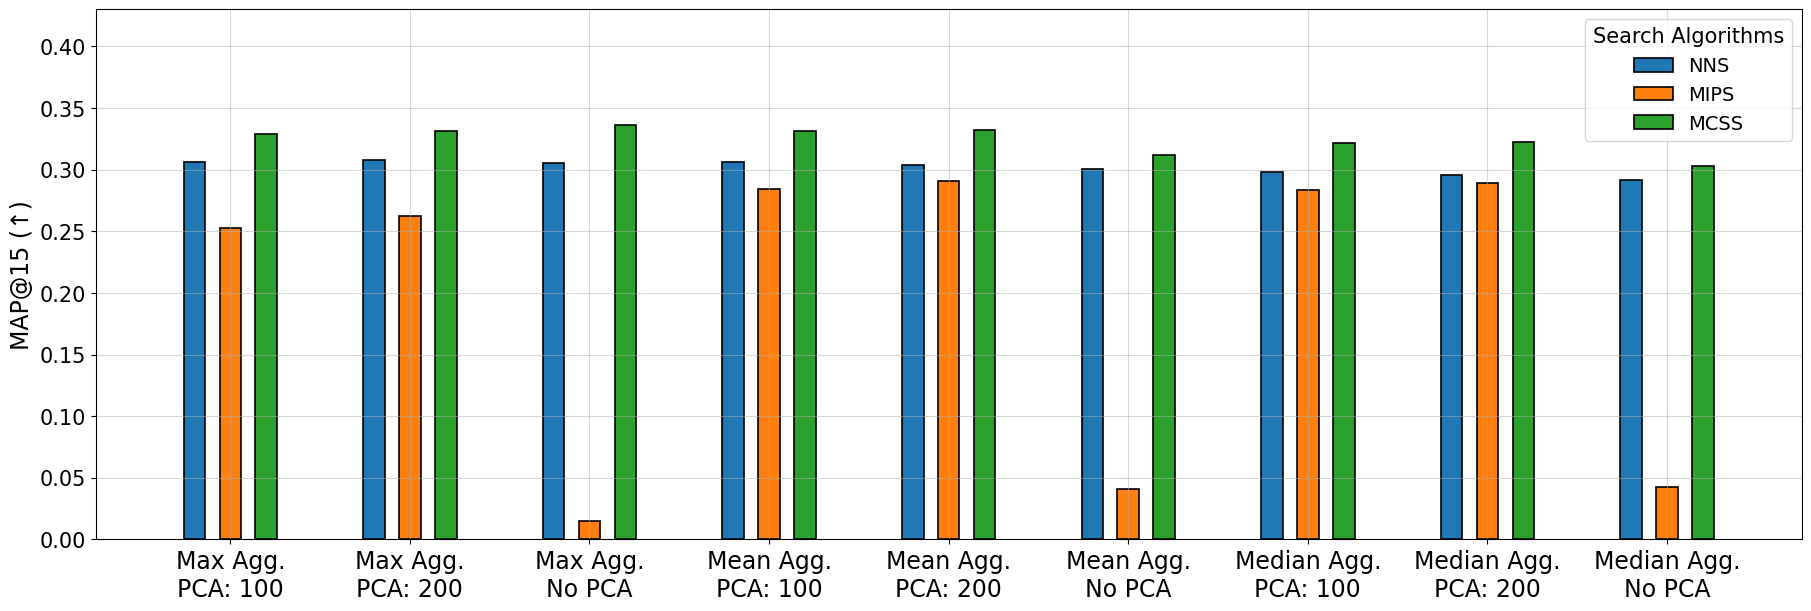

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


('BEATs_iter3_plus_AS2M', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/BEATs_iter3_plus_AS2M/macro_map@15-comparisons.pdf


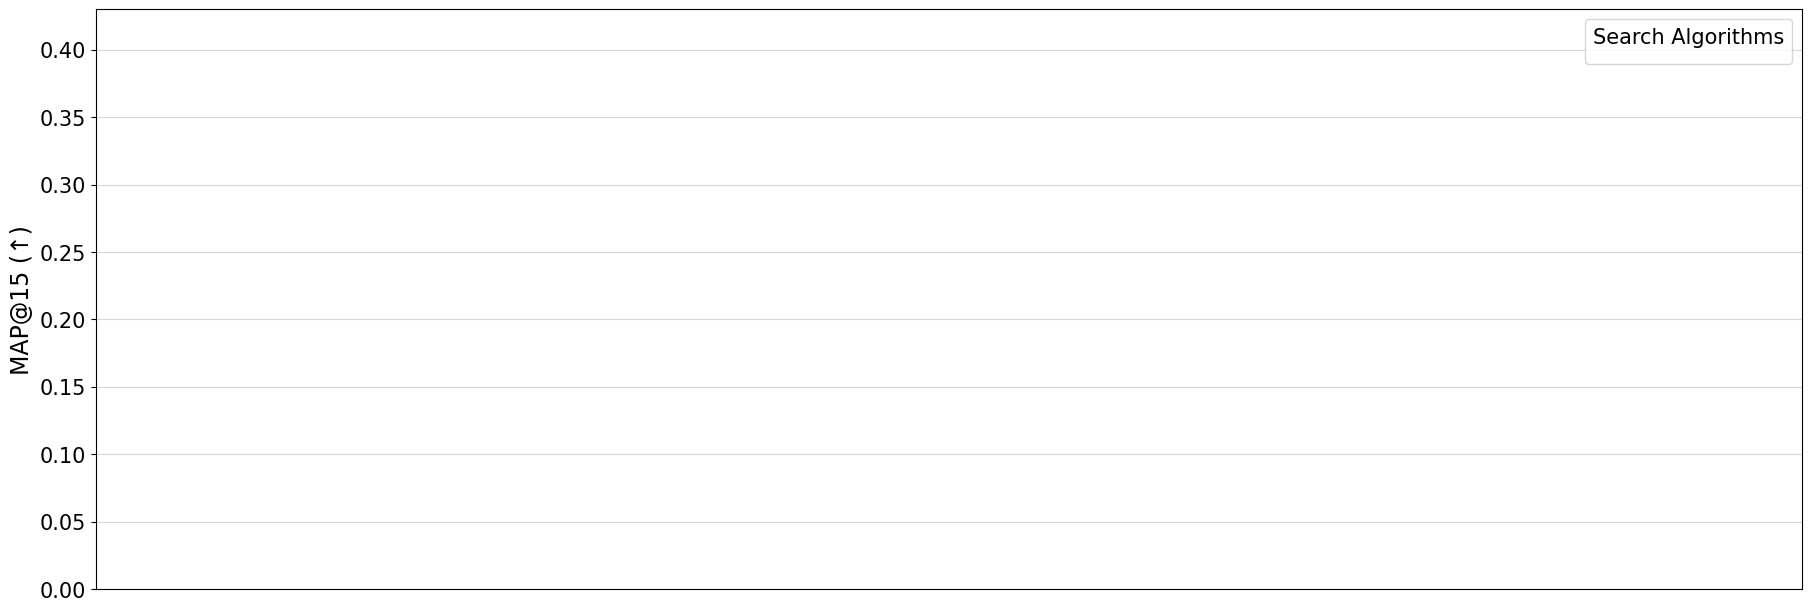

('openl3-env-mel256-emb512-3', 'Agg_mean-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/openl3-env-mel256-emb512-3/macro_map@15-comparisons.pdf


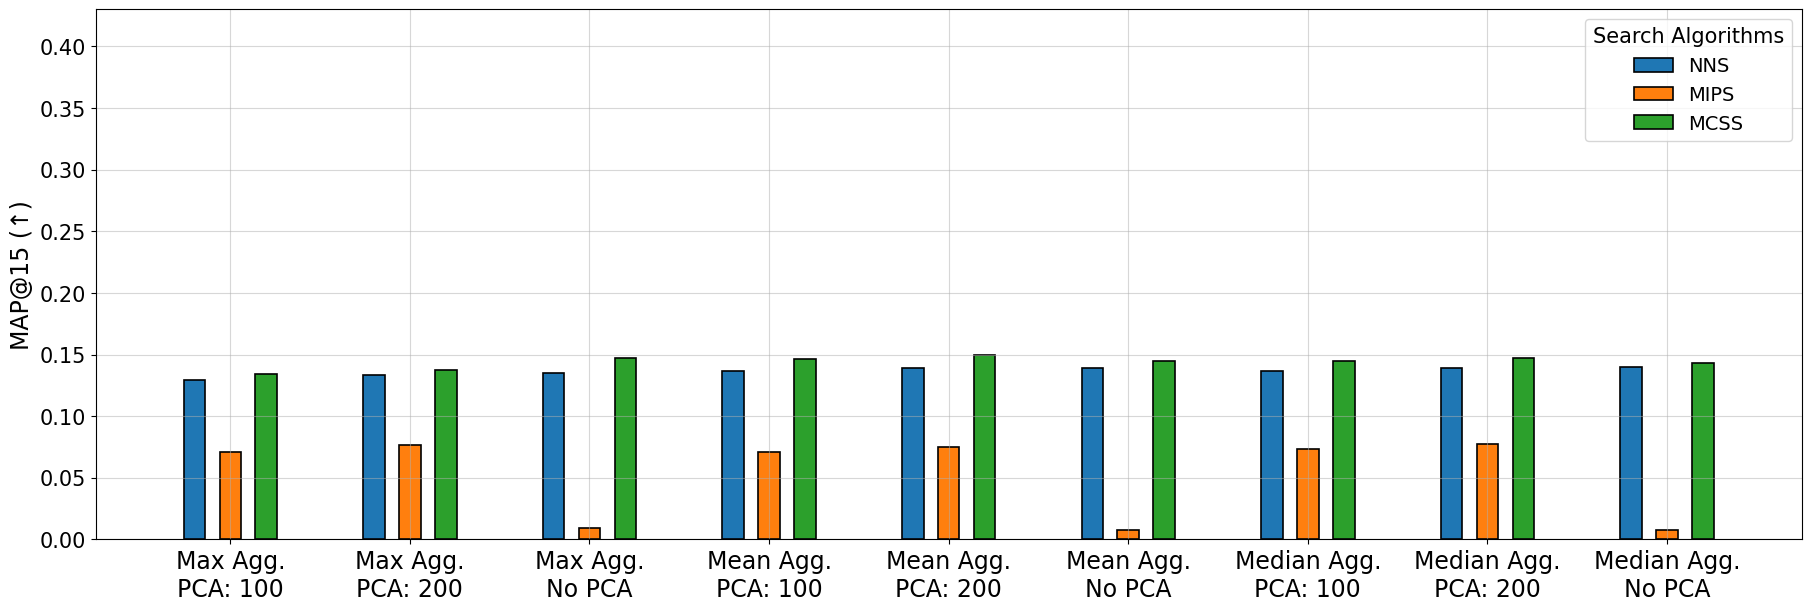

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


('CAVMAE-as_46.6', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CAVMAE-as_46.6/macro_map@15-comparisons.pdf


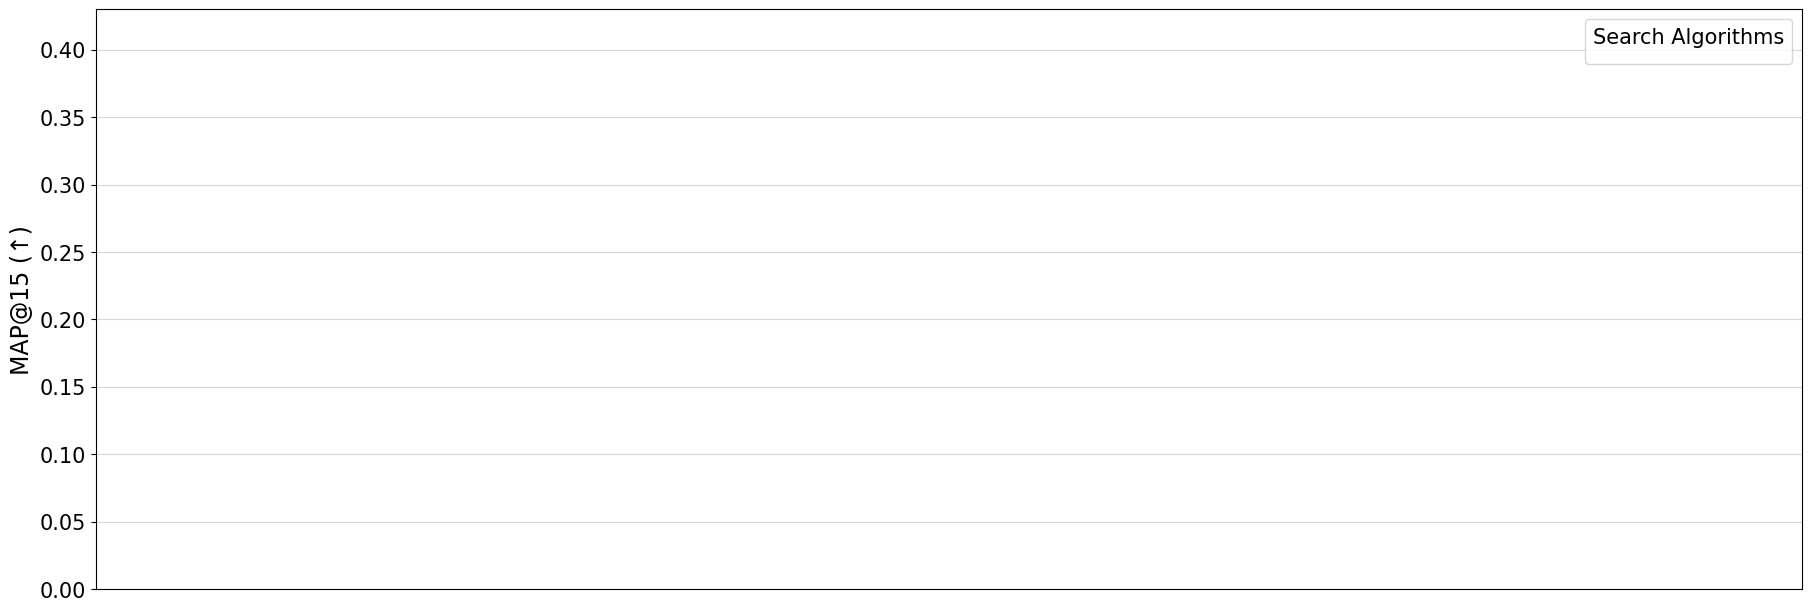

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


('CLAP_2022', 'Agg_none-PCA_100-Norm_True', 'nn')
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CLAP_2022/macro_map@15-comparisons.pdf


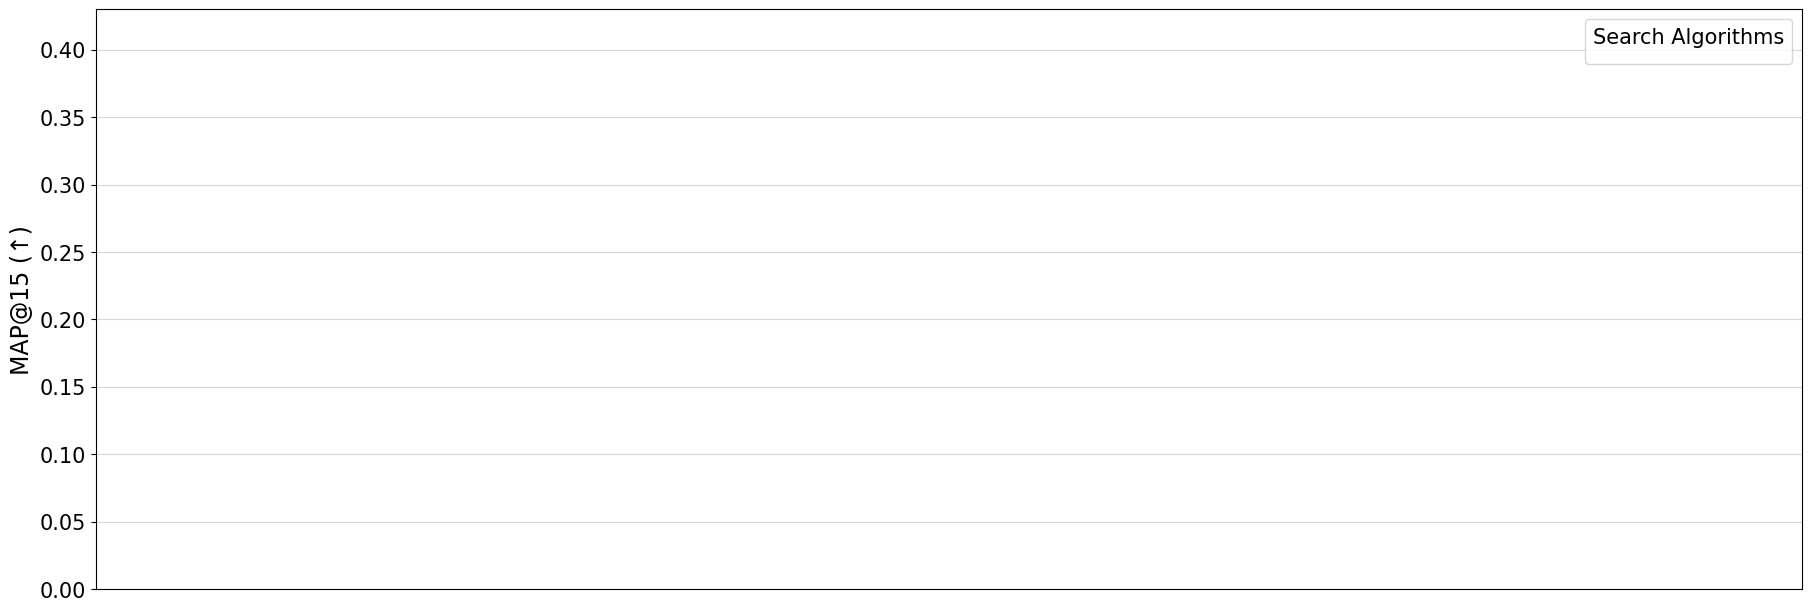

('clap-630k-fusion-best', 'Agg_none-PCA_100-Norm_True', 'nn')


ValueError: invalid literal for int() with base 10: 'none'

In [14]:
model = (
    "fsd-sinet-vgg42-tlpf-1", 
    suffix_agg,
    search
    )

save_fig = True

for model in models:
    print(model)
    plot_map_at_15_comparisons(model[0], "macro", map_precision=3, use_fig_name=False, presentation_mode=True, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

audioset-vggish-3
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-vggish-3/macro_map@15-comparisons.pdf


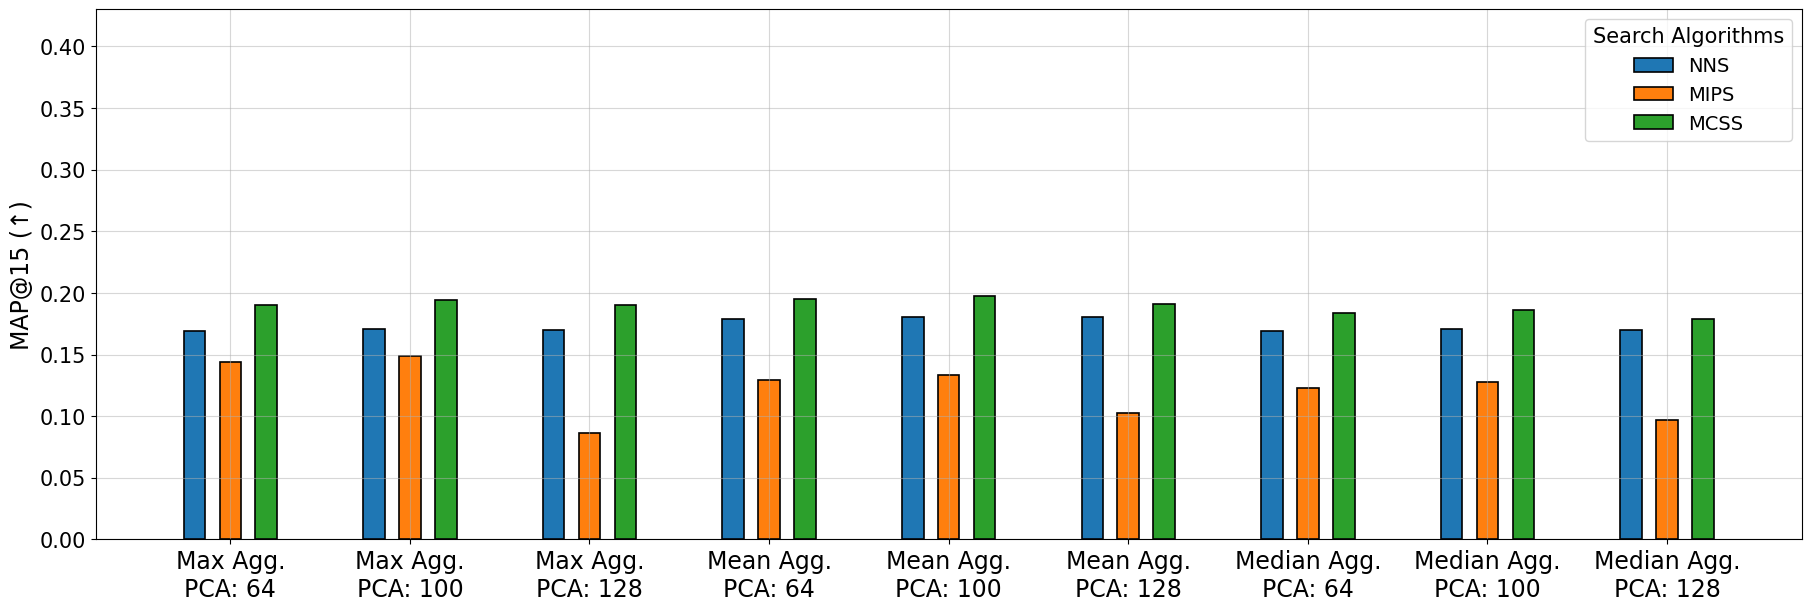

audioset-yamnet-1
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/audioset-yamnet-1/macro_map@15-comparisons.pdf


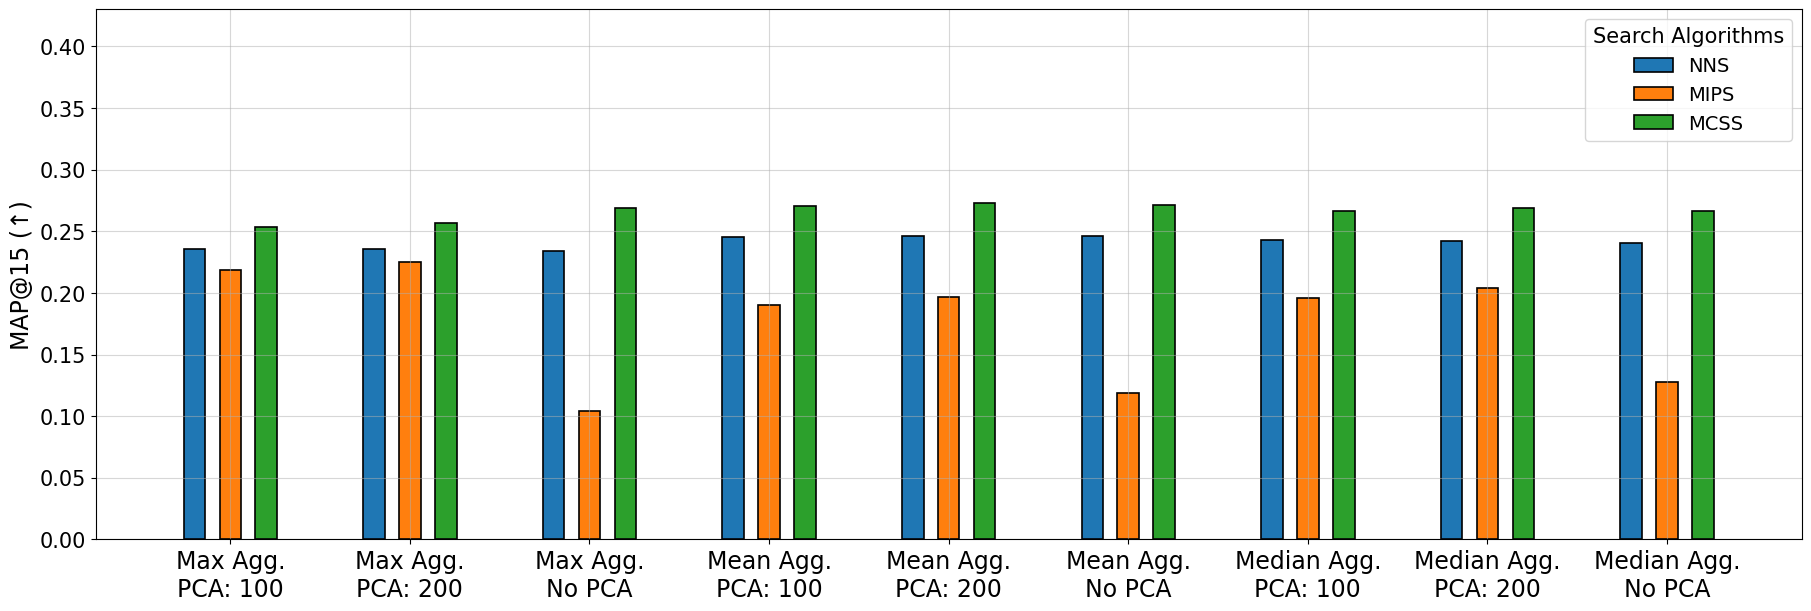

fsd-sinet-vgg42-tlpf-1
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/fsd-sinet-vgg42-tlpf-1/macro_map@15-comparisons.pdf


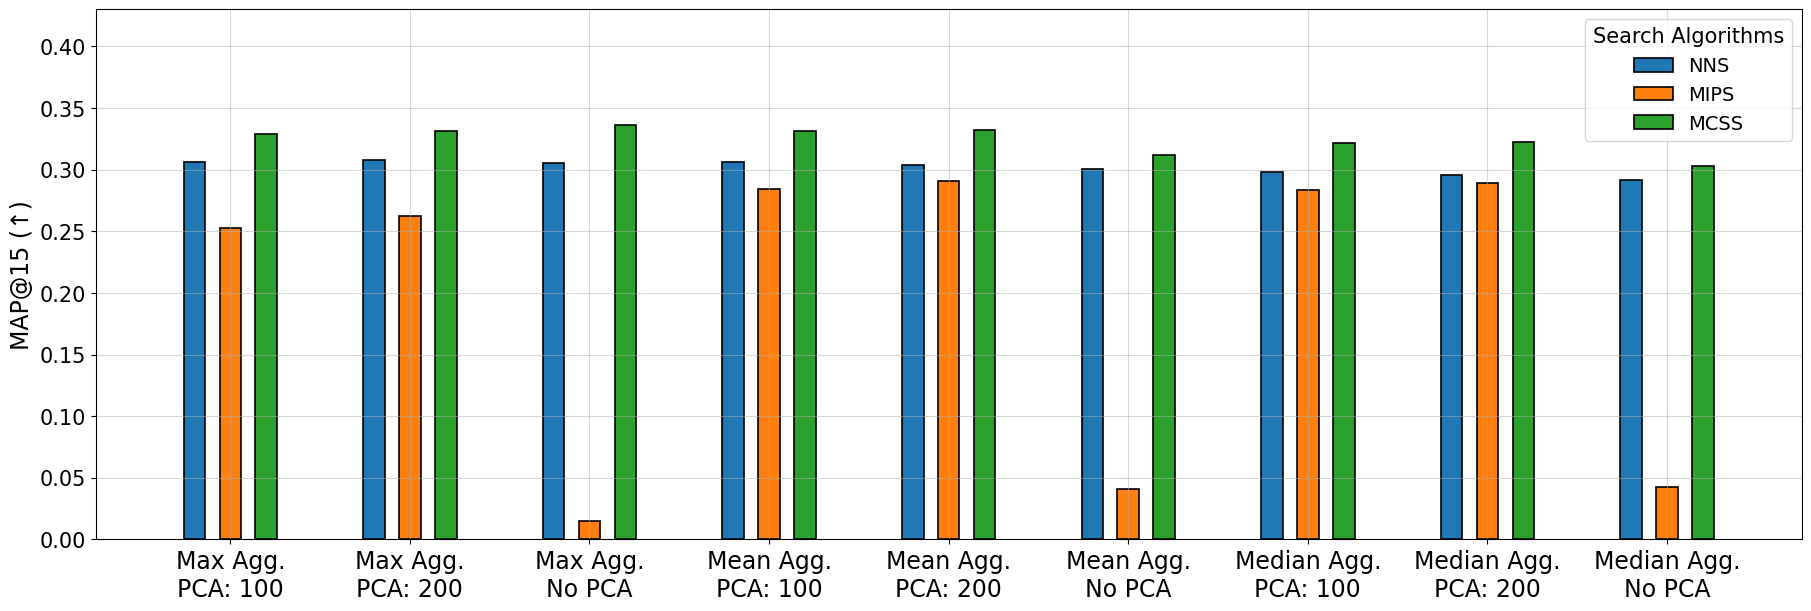

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


BEATs_iter3_plus_AS2M
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/BEATs_iter3_plus_AS2M/macro_map@15-comparisons.pdf


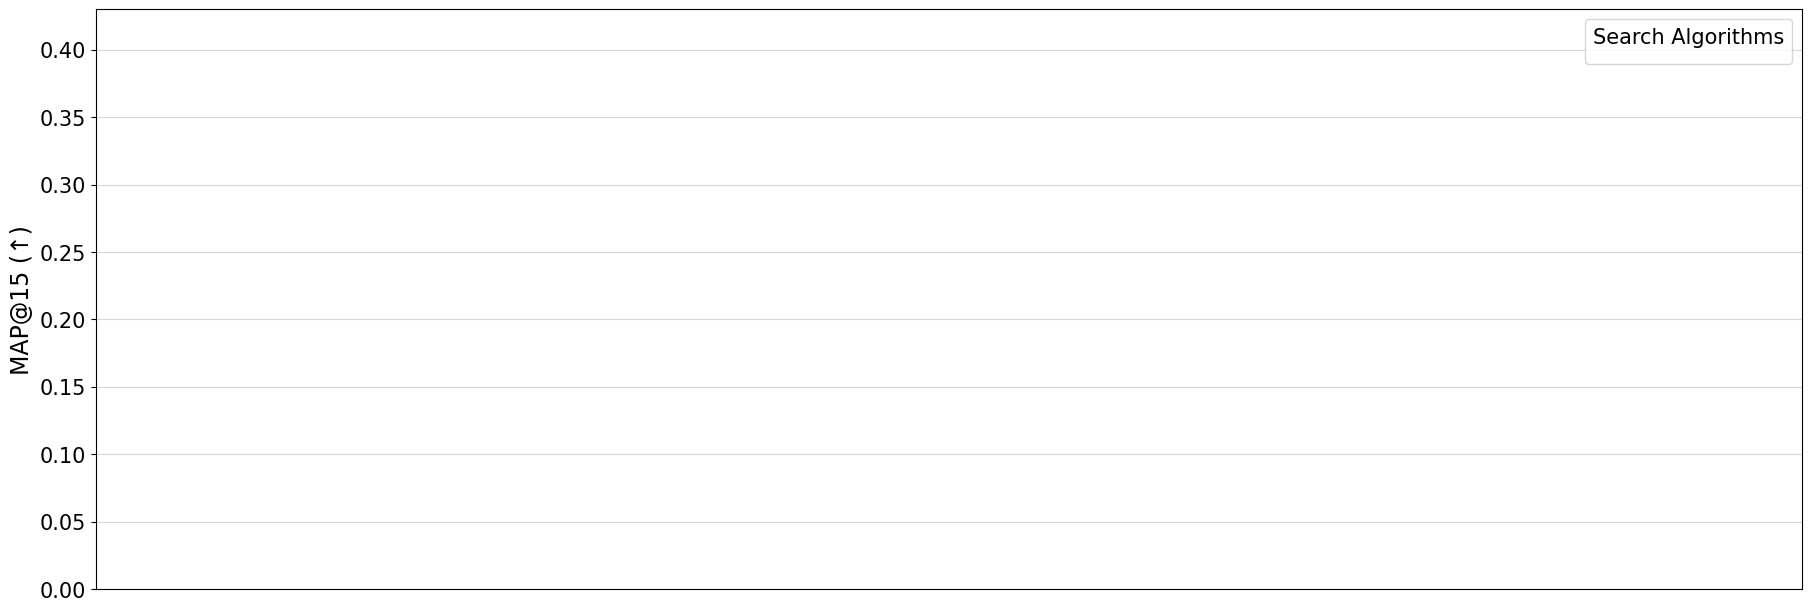

openl3-env-mel256-emb512-3
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/openl3-env-mel256-emb512-3/macro_map@15-comparisons.pdf


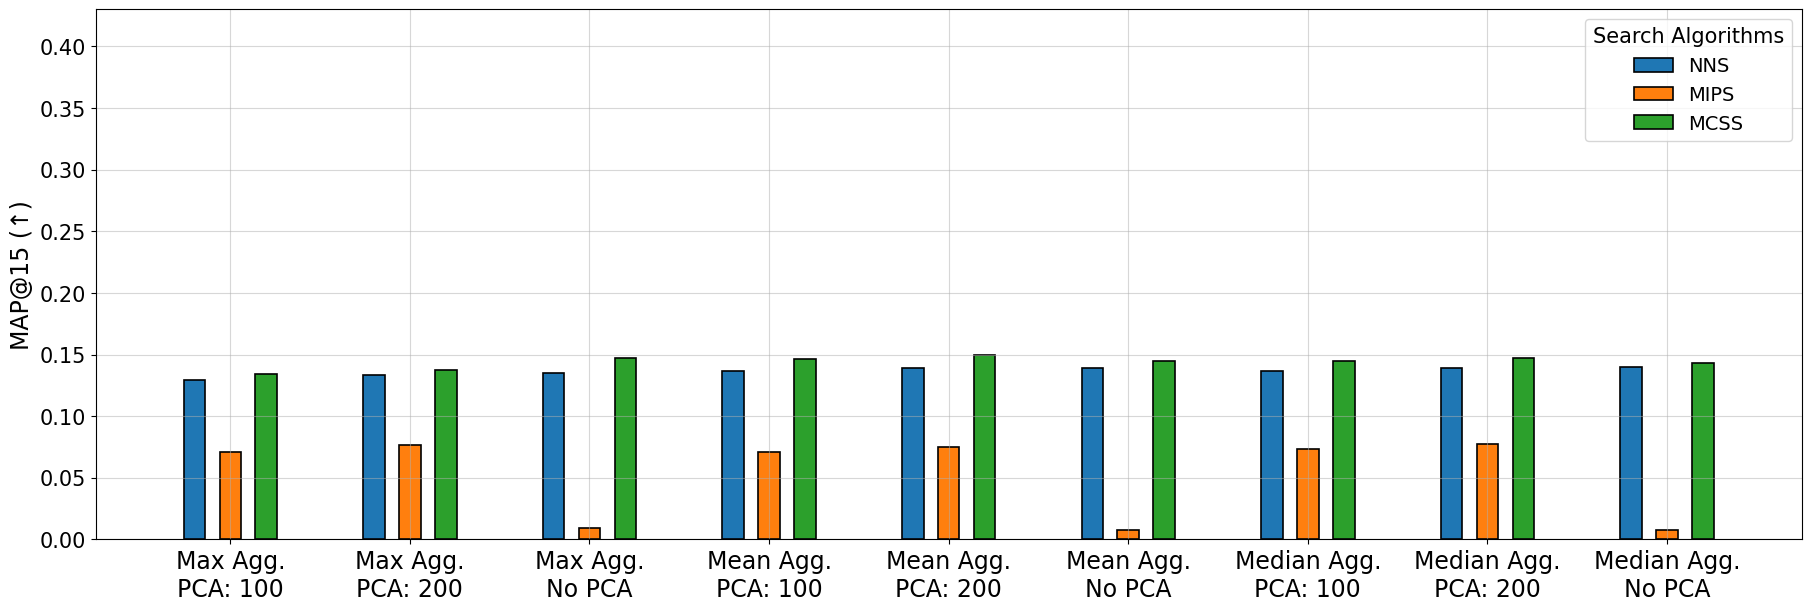

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CAVMAE-as_46.6
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CAVMAE-as_46.6/macro_map@15-comparisons.pdf


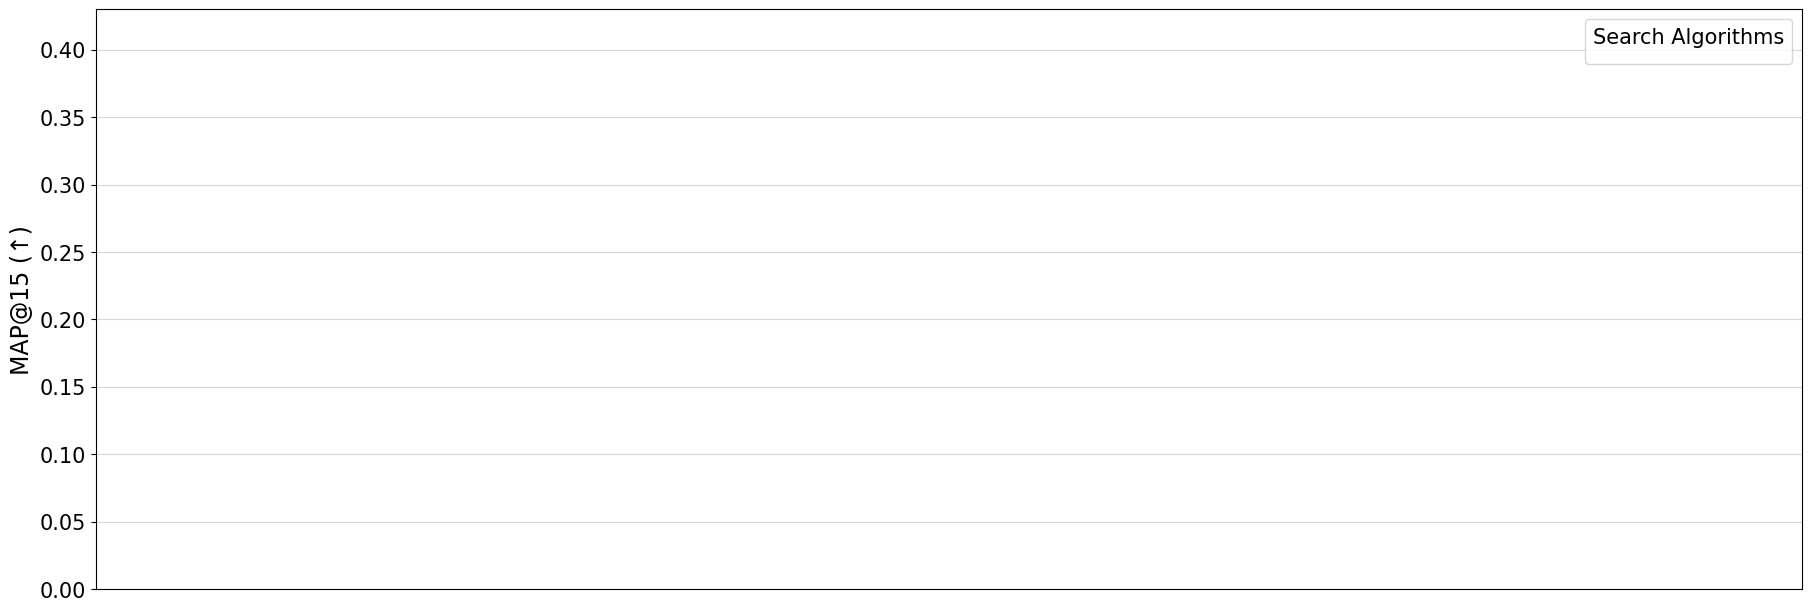

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


CLAP_2022
Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/CLAP_2022/macro_map@15-comparisons.pdf


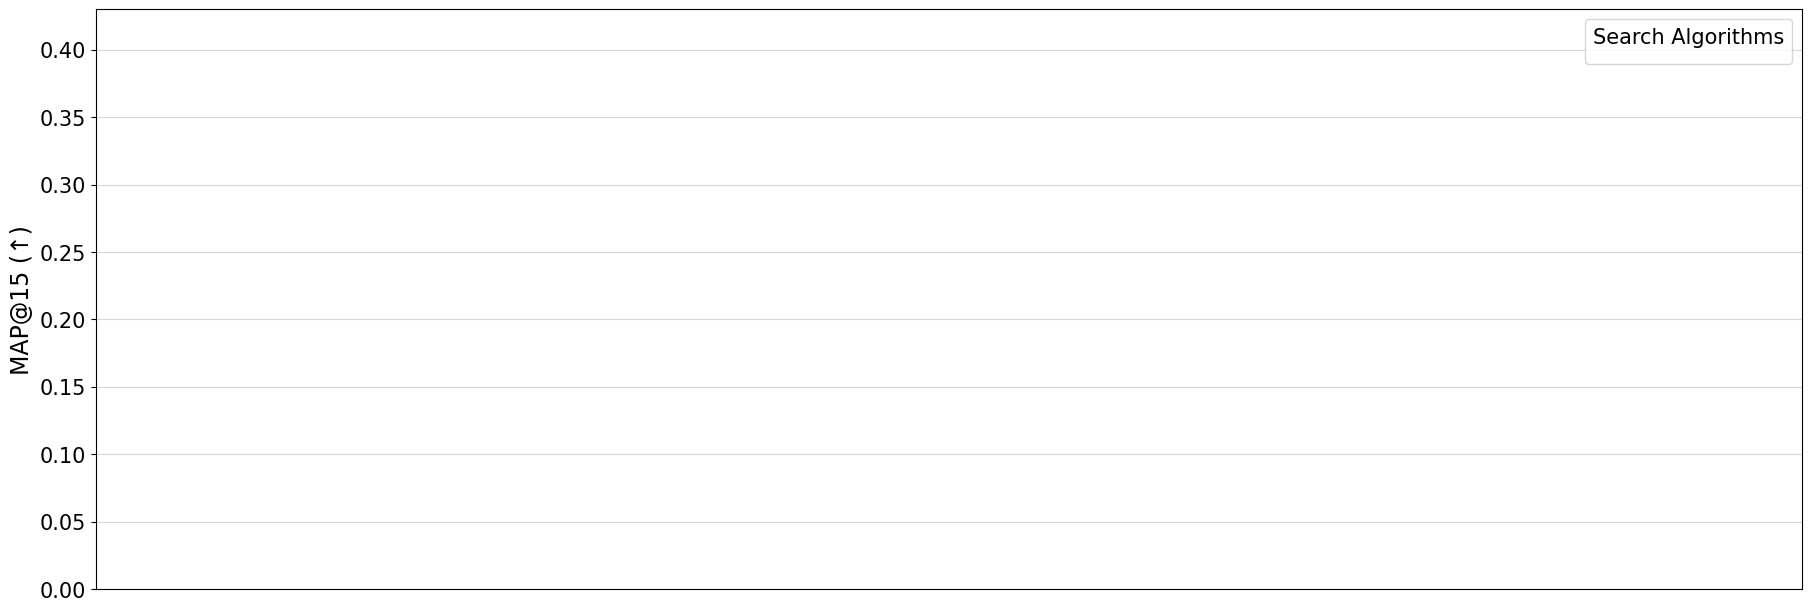

clap-630k-fusion-best


ValueError: invalid literal for int() with base 10: 'none'

In [15]:
save_fig = True
for model in models:

    if model[0] in ["fs-essentia-extractor_legacy"]:
        continue
        map_precision = 5
    elif model[0] in ["audioset-yamnet-1", "audioset-vggish-3", "fsd-sinet-vgg42-tlpf-1", "BEATs_iter3_plus_AS2M", "CLAP_2023", "Pengi", "Wav2CLIP"]:
        map_precision = 3
    elif model[0] == "clap-630k-fusion-best":
        map_precision = 4
    elif model[0] in ["imagebind_huge", "openl3-env-mel256-emb512-3", "AudioCLIP-Full-Training"]:
        map_precision = 3
    else:
        map_precision = 2
    print(model[0])
    plot_map_at_15_comparisons(model[0], "macro", map_precision=map_precision, use_fig_name=False, presentation_mode=True, save_fig=save_fig, save_dir=os.path.join(save_dir_single, model[0]))

### PCA Comparisons

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/PCA/fs-essentia-extractor_legacy/macro_map@15-PCA_comparisons.png


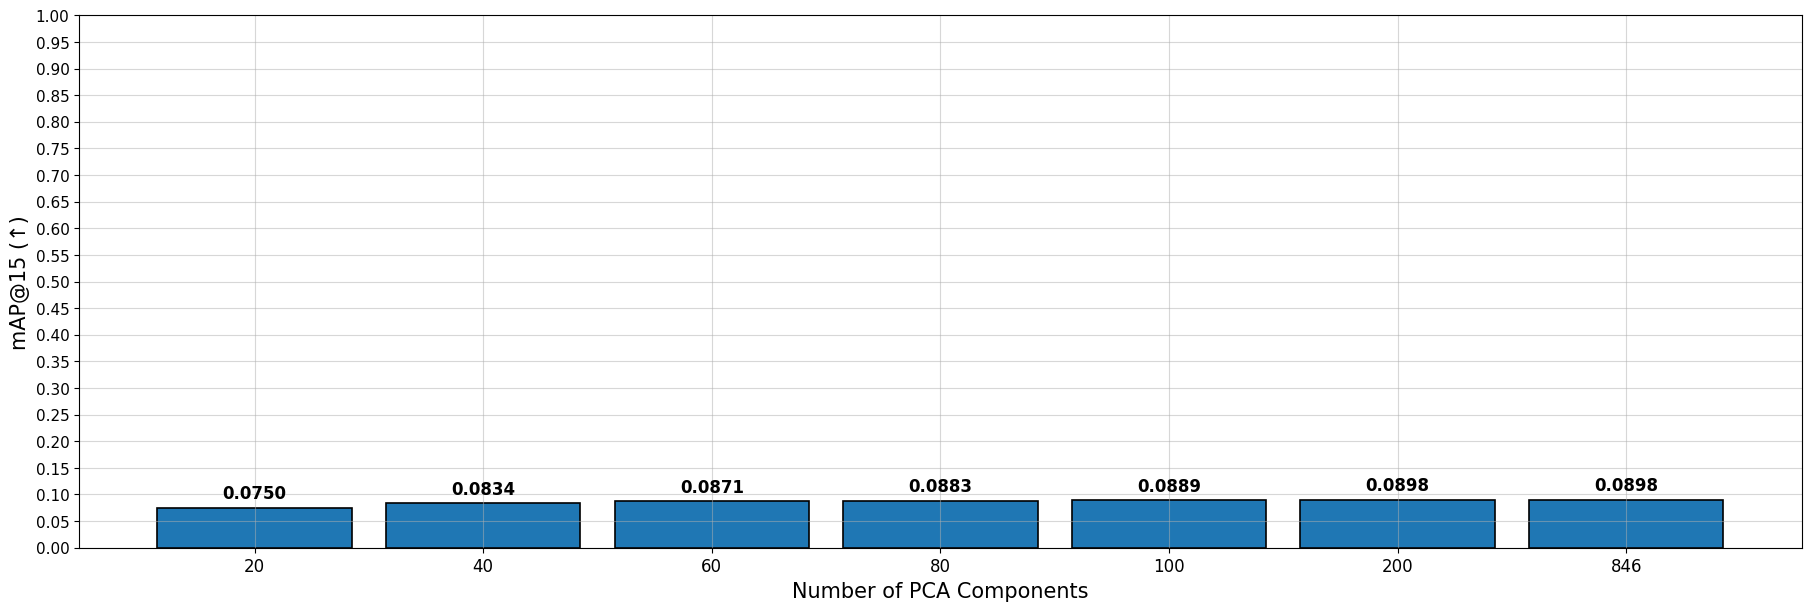

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/PCA/fsd-sinet-vgg42-tlpf-1/macro_map@15-PCA_comparisons.png


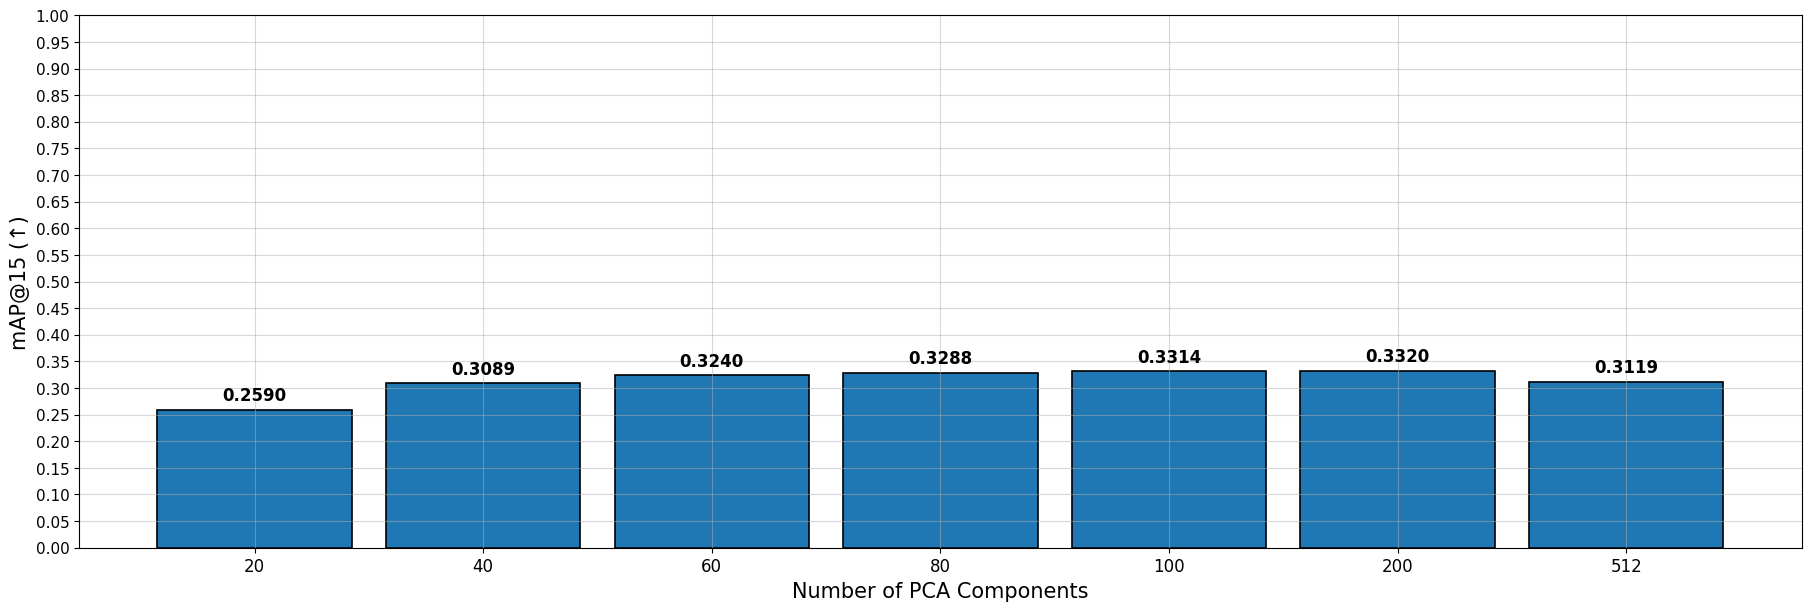

Saving figure to /home/roguz/freesound/freesound-perceptual_similarity/data/figures/paper-final/single_models/PCA/clap-630k-fusion-best/macro_map@15-PCA_comparisons.png


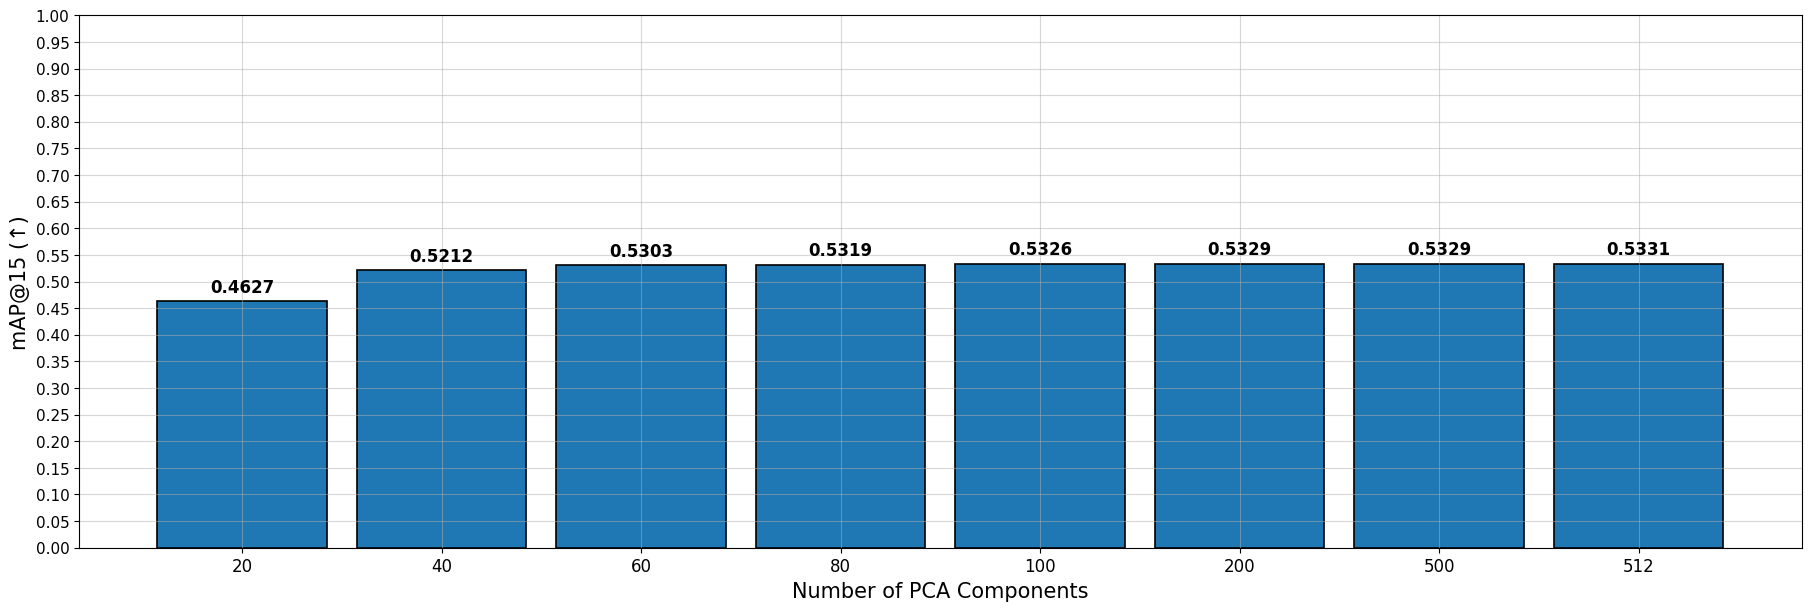

In [9]:
save = True
pca_models = [
    ("fs-essentia-extractor_legacy", "", "", "nn"),
    ("fsd-sinet-vgg42-tlpf-1", "mean", "True", "nn"),
    ("clap-630k-fusion-best", "none", "True", "nn")
    #("audioset-yamnet-1", "mean", "True", "nn"),
]
for model in pca_models:
    plot_macro_map_at_15_PCA_comparisons(model, 
                                        use_fig_name=False,
                                        save_fig=save, 
                                        save_dir=os.path.join(save_dir_single_PCA, model[0]),
                                        )

In [ ]:
Missing

Pengi-Agg_none-PCA_100-Norm_False
Pengi-Agg_none-PCA_1024-Norm_False
Pengi-Agg_none-PCA_512-Norm_False


CLAP_2022-Agg_none-PCA_100-Norm_False